In [ ]:
# !pip install dataframe_image

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']= (12,12)
import warnings
warnings.filterwarnings('ignore')

In [157]:
df = pd.read_csv('data/Cleaned.csv')

In [158]:
df.columns

Index(['Profession', 'Country', 'Region', 'Education', 'Sex', 'Age', 'AgeBin',
       'Maritial', '1.1_HeardCovid', '1.2_Television/Radio',
       '1.2_Newspaper/Magazines', '1.2_SocialMedia',
       '1.2_Colleagues/Workplace', '1.2_Neighbors', '1.3_CovidKnowledgeLevel',
       '1.4_ContactRespiratoryDrop', '1.4_Touching', '1.4_UseSameObject',
       '1.4_Sex', '1.4_PersonToPerson', '1.4_CloseContact', '1.4_TouchingCoin',
       '1.4_CovidFloatOnAir', '1.5_Fever', '1.5_Tiredness', '1.5_Cough',
       '1.5_ShortnessBreath', '1.5_AchesPain', '1.5_NasalCongestion',
       '1.5_RunningNose', '1.5_SoreThroat', '1.5_Diarrhea', '1.6_Mask',
       '1.7_IncubationPeriod', '1.8_Vaccine', '1.9_LockDown', '1.9_Isolation',
       '1.9_Quarantine', '1.10_Over60Yr', '1.10_PrexistingCond',
       '1.10_WorkEnvo', '1.10_RiskZone', '2.1_LockDown', '2.2_HomeQuarantine',
       '2.3_Isolation', '2.4_PersonalHygiene', '2.5_MediaRole', '2.6_Over60Yr',
       '2.6_PreExisting', '2.6_Working', '2.6_RiskZone',

In [42]:
df['3.10_TimeSpentOnCovidNews'].value_counts()


1    1372
2     631
3     504
4     303
5     221
Name: 3.10_TimeSpentOnCovidNews, dtype: int64

In [35]:
df.AgeBin.value_counts().sum()

3031

In [41]:
#Ref  https://www.cdc.gov/coronavirus/2019-ncov/need-extra-precautions/older-adults.html
bins = pd.IntervalIndex.from_tuples([(0,30),(30,40),(40,50),(50,64),(64,np.inf)])
df['AgeBin'] = pd.cut(df.Age,bins)
df.AgeBin.value_counts()

(0.0, 30.0]     1820
(30.0, 40.0]     588
(40.0, 50.0]     312
(50.0, 64.0]     277
(64.0, inf]       34
Name: AgeBin, dtype: int64

In [73]:
countries = df.Country.value_counts().index[:8].tolist()
countries

['China',
 'Mexico',
 'Bangladesh',
 'United States',
 'Pakistan',
 'Malaysia',
 'Japan',
 'Zambia']

<h1> RAW Stuffs </h1>

In [166]:
#Create Necessary Dirs
import os
import dataframe_image as dfi
criterion = ['Access_Of_Information', 'KnowledgeScore', 'OpinionScoring',
       'Susceptiblity', 'BehaveScore', 'PsychologicalHeath', 'LearntCovid']
field = ['Sex','Profession','AgeBin']
for c in criterion:
    for f in field:
        os.makedirs(os.path.join('Graph',c,f))

FileExistsError: [Errno 17] File exists: 'Graph/Access_Of_Information/Sex'

In [167]:
from scipy import stats
def chi_squared_test(df,country,column1,column2,prob=0.95):
#     print(column2,df[column2])
    contingency_table = pd.crosstab(df[column1],df[column2])
#     print(column1,column2,contingency_table)
    stat,p,dof,expected = stats.chi2_contingency(contingency_table)
    critical = stats.chi2.ppf(prob,dof)
    contingency_table.plot.bar(stacked=False)
    plt.title(country)
    plt.savefig(f'Graph/{column2}/{column1}/{column2}_{column1}_{country}.png',dpi=80)
    return country, stat,critical

Access_Of_Information 0       0.0
12      2.0
13      2.0
25      2.0
40      1.0
       ... 
3026    2.0
3027    2.0
3028    3.0
3029    2.0
3030    4.0
Name: Access_Of_Information, Length: 595, dtype: float64
Sex Access_Of_Information Access_Of_Information  0.0  1.0  2.0  3.0  4.0
Sex                                           
Female                   3   18   56   76   32
Male                     3   32  128  189   58
Access_Of_Information 10      4.0
11      3.0
17      4.0
20      2.0
22      2.0
       ... 
2160    4.0
2171    3.0
2192    4.0
2194    4.0
2201    4.0
Name: Access_Of_Information, Length: 493, dtype: float64
Sex Access_Of_Information Access_Of_Information  1.0  2.0  3.0  4.0
Sex                                      
Female                   4   47   79   99
Male                    11   62   97   94
Access_Of_Information 4       1.0
8       4.0
9       2.0
16      4.0
19      4.0
       ... 
2130    1.0
2133    3.0
2134    3.0
2139    4.0
2170    0.0
Name: Access_Of_

Access_Of_Information 127     3.0
171     2.0
191     4.0
193     3.0
194     3.0
       ... 
2088    4.0
2107    3.0
2116    3.0
2117    3.0
2172    0.0
Name: Access_Of_Information, Length: 148, dtype: float64
AgeBin Access_Of_Information Access_Of_Information  0.0  1.0  2.0  3.0  4.0
AgeBin                                        
(21.0, 24.0]             0    0    0    1    6
(24.0, 30.0]             0    2    1    7    4
(30.0, 41.0]             1    2   15   29   31
(41.0, 76.0]             0    0    6   15   27
(8.999, 21.0]            0    0    0    0    1
Access_Of_Information 3       3.0
18      1.0
28      2.0
29      1.0
30      2.0
       ... 
1822    4.0
1862    2.0
1928    2.0
2099    3.0
2123    3.0
Name: Access_Of_Information, Length: 87, dtype: float64
AgeBin Access_Of_Information Access_Of_Information  1.0  2.0  3.0  4.0
AgeBin                                   
(21.0, 24.0]             1    3    2    0
(24.0, 30.0]             5   12    8    4
(30.0, 41.0]            

KnowledgeScore 173     16
174     17
175     20
256     13
261     19
        ..
2178    16
2184    19
2188    11
2197    21
2200    20
Name: KnowledgeScore, Length: 284, dtype: int64
Profession KnowledgeScore KnowledgeScore            7   9   10  11  12  13  14  15  16  17  18  19  20  \
Profession                                                                     
Academian/Administration   1   1   0   0   1   5   5   3   5  12  11  11   3   
Medical Professionals      0   1   1   2   2   5  11  24  34  21  31  39  23   
Others                     0   0   0   0   0   0   0   0   0   1   0   0   1   

KnowledgeScore            21  22  
Profession                        
Academian/Administration   1   2  
Medical Professionals     15  12  
Others                     0   0  
KnowledgeScore 127     13
171     12
191     12
193     12
194     12
        ..
2088    14
2107    19
2116    15
2117    15
2172    11
Name: KnowledgeScore, Length: 148, dtype: int64
Profession KnowledgeScore Know

OpinionScoring 2207    13
2208     9
2209     8
2210     6
2211    10
        ..
3015     3
3016     3
3017     3
3018     3
3019     3
Name: OpinionScoring, Length: 712, dtype: int64
Sex OpinionScoring OpinionScoring  3   4   5   6   7   8   9   10  11  12  13  14   15
Sex                                                                
Female          12   1   4   3  13  13  33  19  28  31  23  16  128
Male             2   2   3  12  14  23  24  20  18  45  35  31  159
OpinionScoring 0        6
12      23
13      23
25      24
40      23
        ..
3026    24
3027    17
3028    25
3029    20
3030    20
Name: OpinionScoring, Length: 595, dtype: int64
Sex OpinionScoring OpinionScoring  6   12  13  14  15  16  17  18  19  20  21  22  23  24   25
Sex                                                                        
Female           1   1   0   0   1   2   1   1  11  11  19  25  31  34   47
Male             0   2   1   1   3   2   5   6  15  36  41  50  62  83  103
OpinionScoring 10 

OpinionScoring 0        6
12      23
13      23
25      24
40      23
        ..
3026    24
3027    17
3028    25
3029    20
3030    20
Name: OpinionScoring, Length: 595, dtype: int64
AgeBin OpinionScoring OpinionScoring  6   12  13  14  15  16  17  18  19  20  21  22  23  24  25
AgeBin                                                                    
(21.0, 24.0]     0   0   0   1   1   0   0   2   3   7  17  17  21  31  38
(24.0, 30.0]     0   0   0   0   0   1   0   1   7   8   7  18   9  15  27
(30.0, 41.0]     0   3   0   0   1   1   1   2   1   7  12   5  12  12  11
(41.0, 76.0]     0   0   0   0   0   1   4   1  10   9  11  17  24  40  43
(8.999, 21.0]    1   0   1   0   2   1   1   1   5  16  13  18  27  19  31
OpinionScoring 10      19
11      24
17      17
20      24
22      23
        ..
2160    25
2171    25
2192    25
2194    22
2201    17
Name: OpinionScoring, Length: 493, dtype: int64
AgeBin OpinionScoring OpinionScoring  17  18  19  20  21  22  23  24  25
AgeBin      

Susceptiblity 173     4
174     0
175     0
256     0
261     4
       ..
2178    1
2184    3
2188    1
2197    0
2200    1
Name: Susceptiblity, Length: 284, dtype: int64
Profession Susceptiblity Susceptiblity              0   1   2   3   4
Profession                                  
Academian/Administration  30  13   2   5  11
Medical Professionals     29  82  41  16  53
Others                     1   0   0   0   1
Susceptiblity 127     4
171     0
191     1
193     1
194     1
       ..
2088    0
2107    1
2116    0
2117    0
2172    2
Name: Susceptiblity, Length: 148, dtype: int64
Profession Susceptiblity Susceptiblity              0   1  2  3   4
Profession                                
Academian/Administration  23  10  2  2  14
Medical Professionals     25  34  5  2  27
Others                     3   1  0  0   0
Susceptiblity 3       4
18      4
28      4
29      3
30      4
       ..
1822    2
1862    3
1928    4
2099    3
2123    4
Name: Susceptiblity, Length: 87, dtype: int6

BehaveScore 10      11
11       8
17       5
20      10
22       8
        ..
2160    11
2171    10
2192    11
2194     9
2201    10
Name: BehaveScore, Length: 493, dtype: int64
Profession BehaveScore BehaveScore               4   5   6   7   8   9    10   11
Profession                                                
Academian/Administration   2   1   5   7  10  23   42   57
Medical Professionals      0   2   4  10  20  46  112  143
Others                     0   0   0   1   0   2    1    5
BehaveScore 4        5
8        7
9        8
16      10
19       9
        ..
2130    10
2133    11
2134    11
2139    11
2170     9
Name: BehaveScore, Length: 335, dtype: int64
Profession BehaveScore BehaveScore               2   3   4   5   6   7   8   9   10  11
Profession                                                      
Academian/Administration   1   4   1   3  10  20  41  62  66  25
Medical Professionals      0   2   0   1   3   3  21  16  35  13
Others                     0   0   0   0   

PsychologicalHeath 173     3
174     0
175     4
256     3
261     5
       ..
2178    1
2184    2
2188    5
2197    3
2200    1
Name: PsychologicalHeath, Length: 284, dtype: int64
Sex PsychologicalHeath PsychologicalHeath   0   1   2   3   4   5
Sex                                       
Female              39  27  25  22  17  29
Male                15  21  35  21  11  22
PsychologicalHeath 127     1
171     1
191     2
193     1
194     1
       ..
2088    0
2107    5
2116    0
2117    0
2172    0
Name: PsychologicalHeath, Length: 148, dtype: int64
Sex PsychologicalHeath PsychologicalHeath   0   1   2  3  4  5
Sex                                    
Female              14  13   5  2  4  8
Male                35  23  22  8  5  9
PsychologicalHeath 3       5
18      1
28      3
29      1
30      2
       ..
1822    3
1862    2
1928    1
2099    3
2123    1
Name: PsychologicalHeath, Length: 87, dtype: int64
Sex PsychologicalHeath PsychologicalHeath  0   1   2   3  4  5
Sex              

LearntCovid 2207    2.0
2208    2.0
2209    2.0
2210    4.0
2211    2.0
       ... 
3015    5.0
3016    5.0
3017    5.0
3018    5.0
3019    5.0
Name: LearntCovid, Length: 712, dtype: float64
Sex LearntCovid LearntCovid  1.0  2.0  3.0  4.0  5.0
Sex                                 
Female        49   80   87   54   54
Male          54  118  123   51   42
LearntCovid 0       1.0
12      5.0
13      5.0
25      1.0
40      1.0
       ... 
3026    5.0
3027    5.0
3028    4.0
3029    5.0
3030    4.0
Name: LearntCovid, Length: 595, dtype: float64
Sex LearntCovid LearntCovid  1.0  2.0  3.0  4.0  5.0
Sex                                 
Female         5   14   38   23   80
Male          21   28  100   74  150
LearntCovid 10      2.0
11      3.0
17      5.0
20      5.0
22      3.0
       ... 
2160    5.0
2171    2.0
2192    4.0
2194    5.0
2201    5.0
Name: LearntCovid, Length: 493, dtype: float64
Sex LearntCovid LearntCovid  0.0  1.0  2.0  3.0  4.0  5.0
Sex                                      

LearntCovid 173     3.0
174     4.0
175     5.0
256     4.0
261     4.0
       ... 
2178    4.0
2184    5.0
2188    5.0
2197    5.0
2200    5.0
Name: LearntCovid, Length: 284, dtype: float64
AgeBin LearntCovid LearntCovid    1.0  2.0  3.0  4.0  5.0
AgeBin                                
(21.0, 24.0]     0    4    4   13   16
(24.0, 30.0]     1    2   12   22   28
(30.0, 41.0]     0    4   24   26   39
(41.0, 76.0]     0    3   15   23   25
(8.999, 21.0]    0    0    4    8   11
LearntCovid 127     4.0
171     4.0
191     4.0
193     4.0
194     4.0
       ... 
2088    5.0
2107    3.0
2116    5.0
2117    5.0
2172    4.0
Name: LearntCovid, Length: 148, dtype: float64
AgeBin LearntCovid LearntCovid    1.0  2.0  3.0  4.0  5.0
AgeBin                                
(21.0, 24.0]     0    0    1    4    2
(24.0, 30.0]     1    0    5    5    3
(30.0, 41.0]     0    3    4   30   41
(41.0, 76.0]     0    1   10    9   28
(8.999, 21.0]    0    0    0    1    0
LearntCovid 3       4.0
18      3.

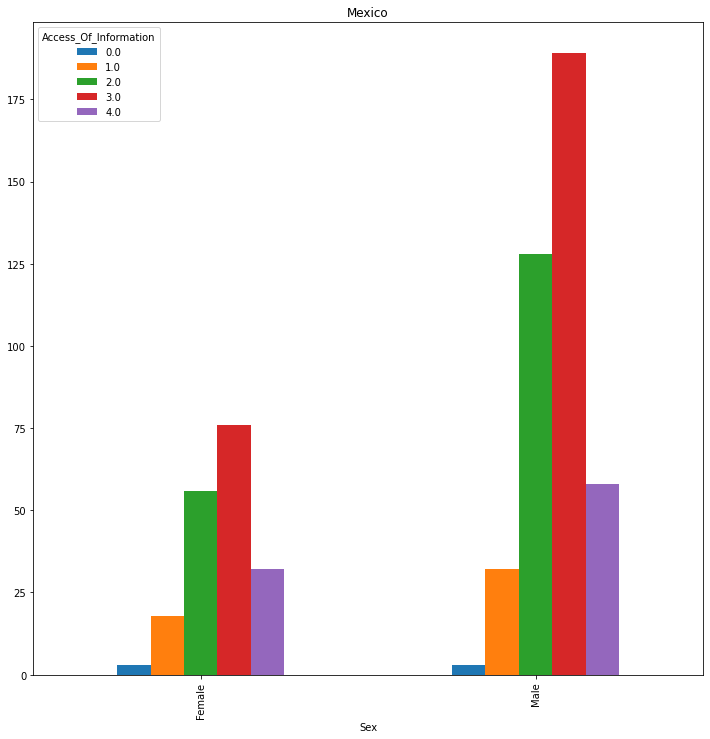

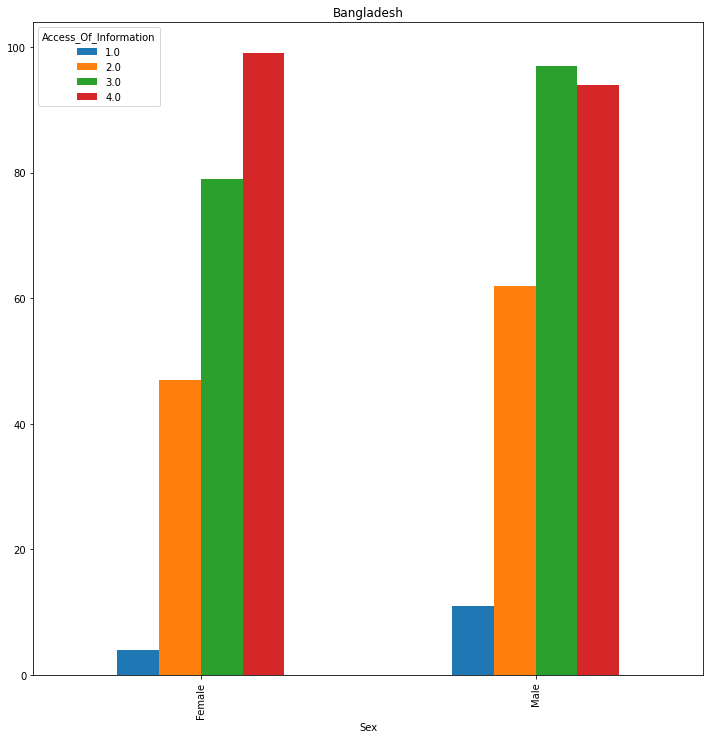

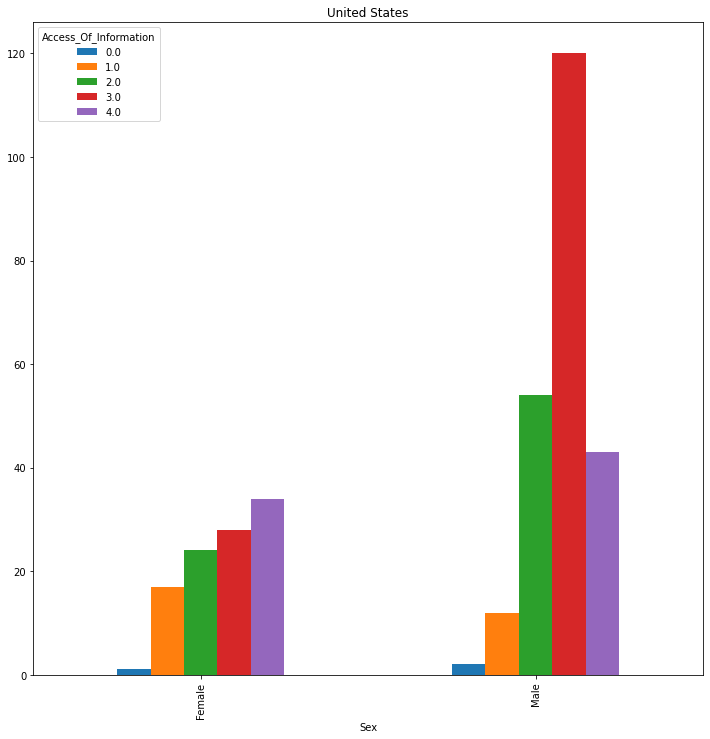

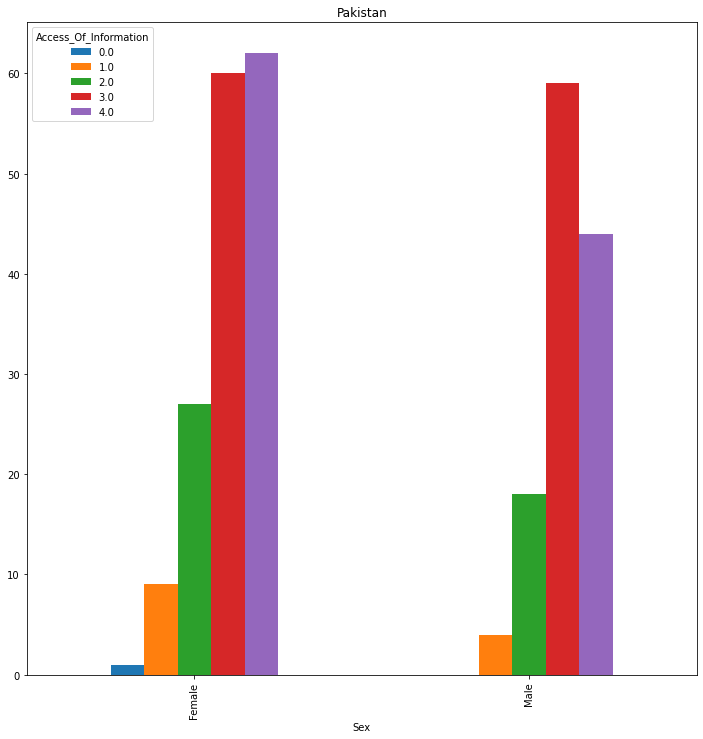

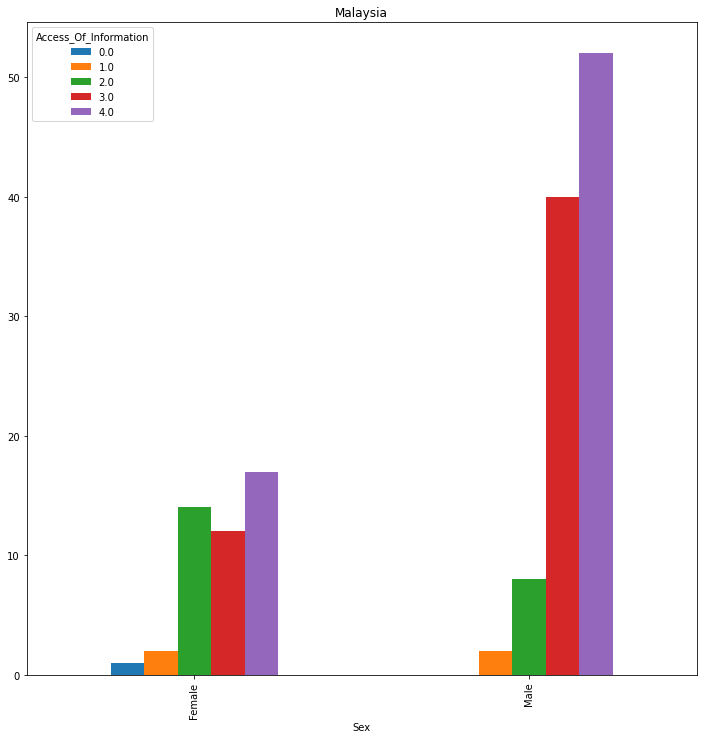

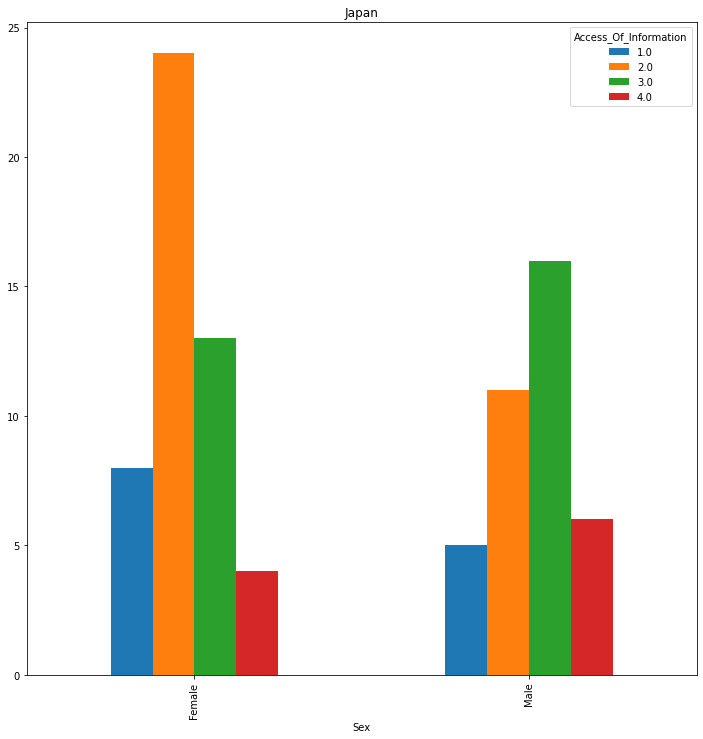

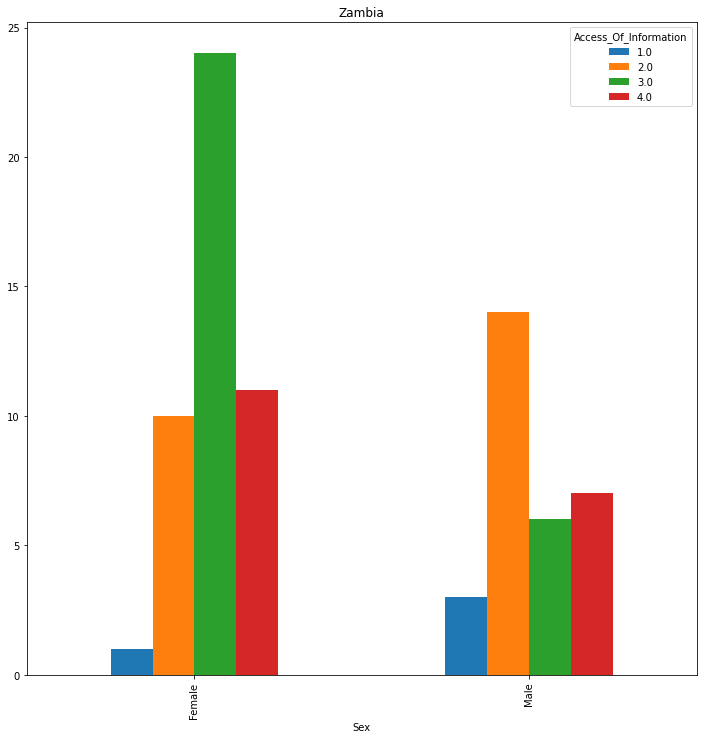

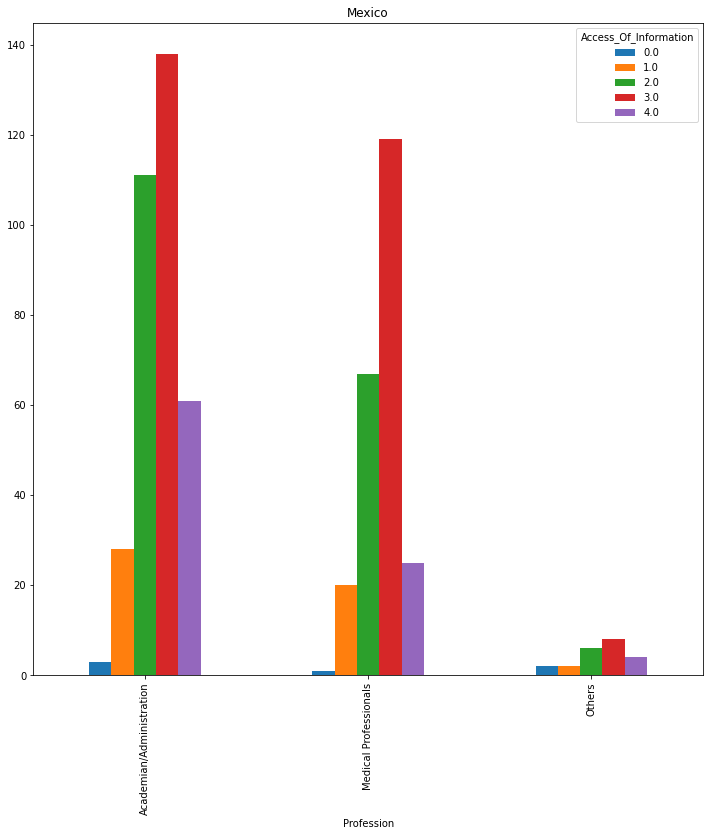

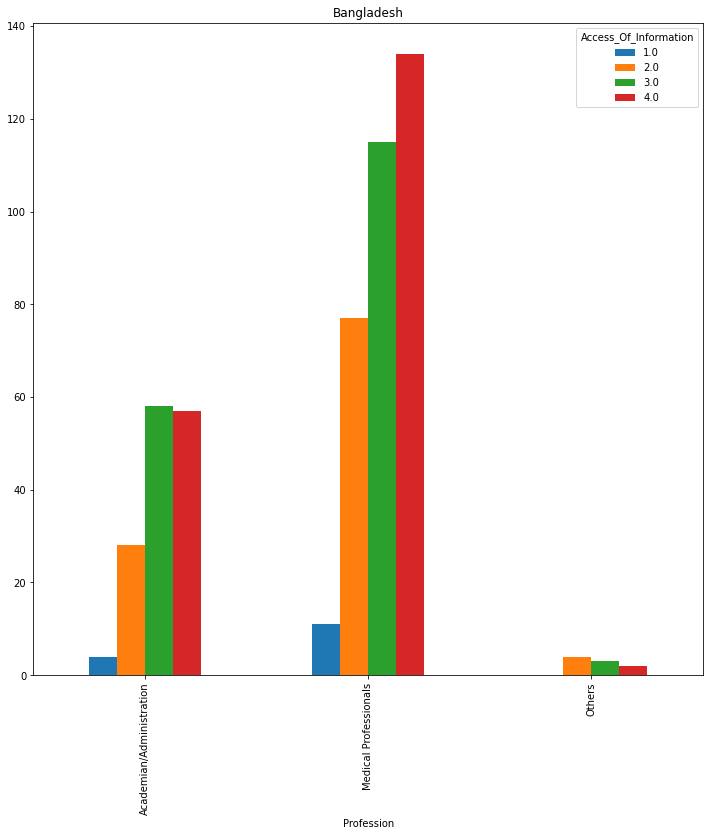

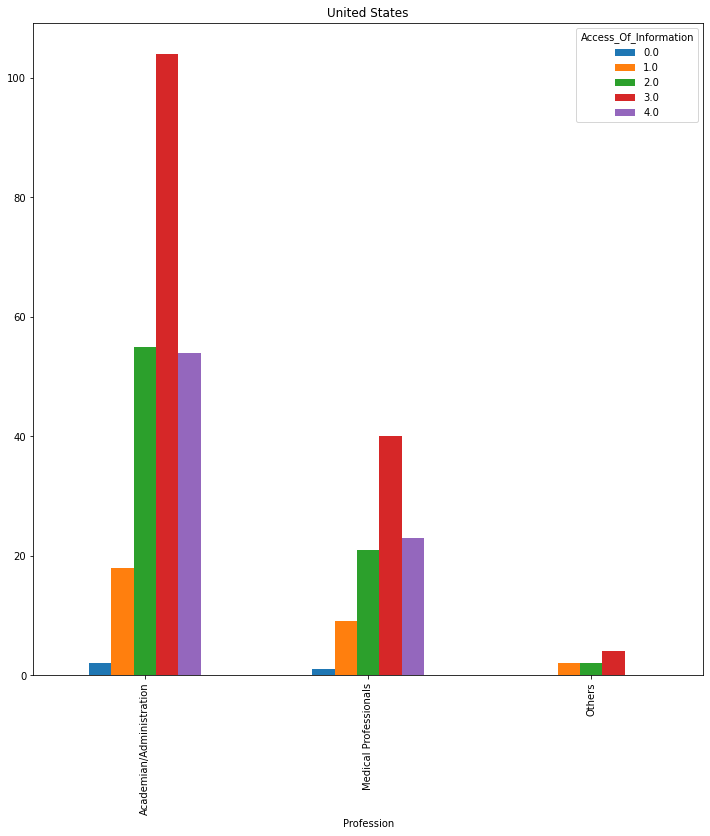

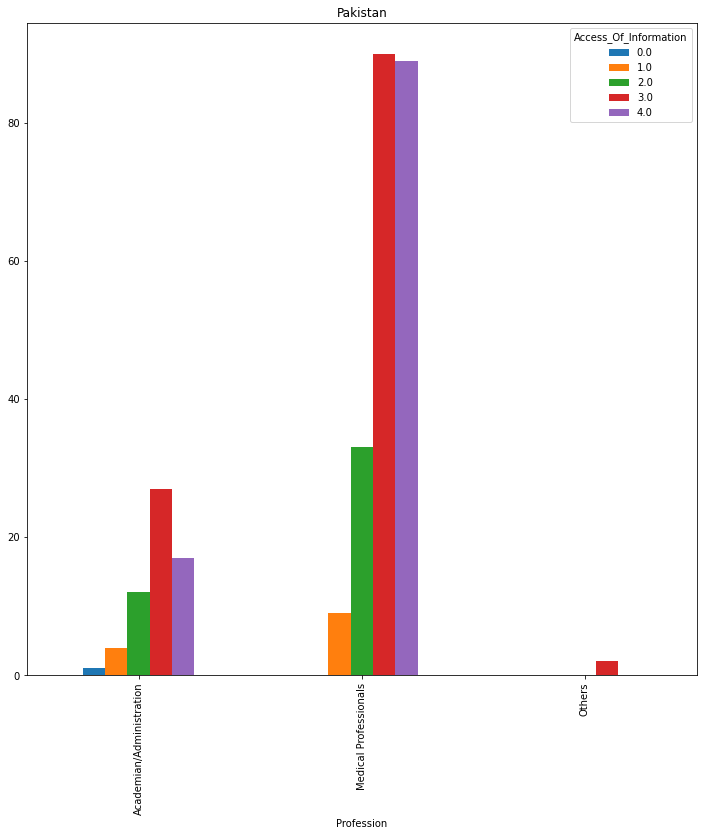

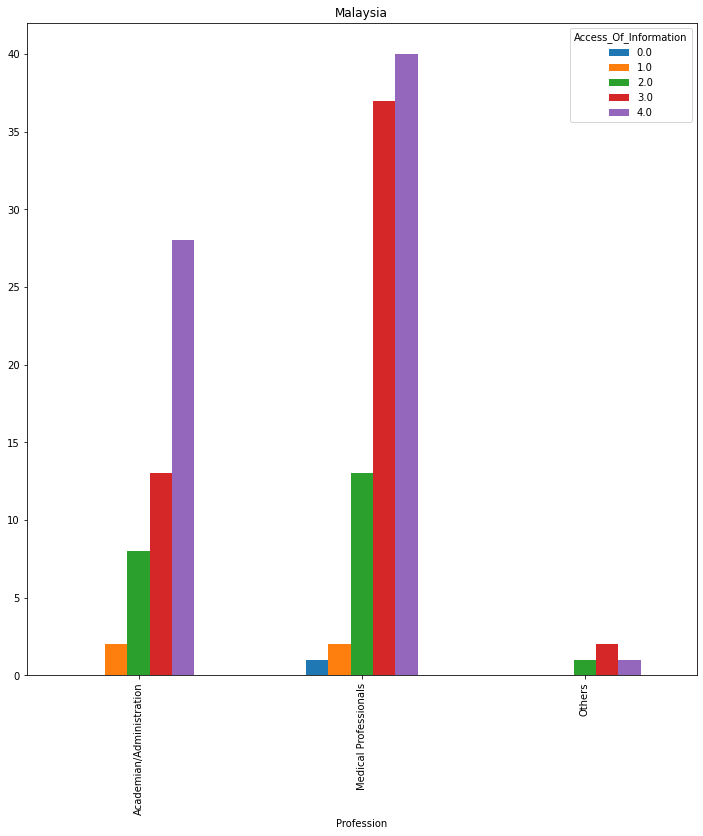

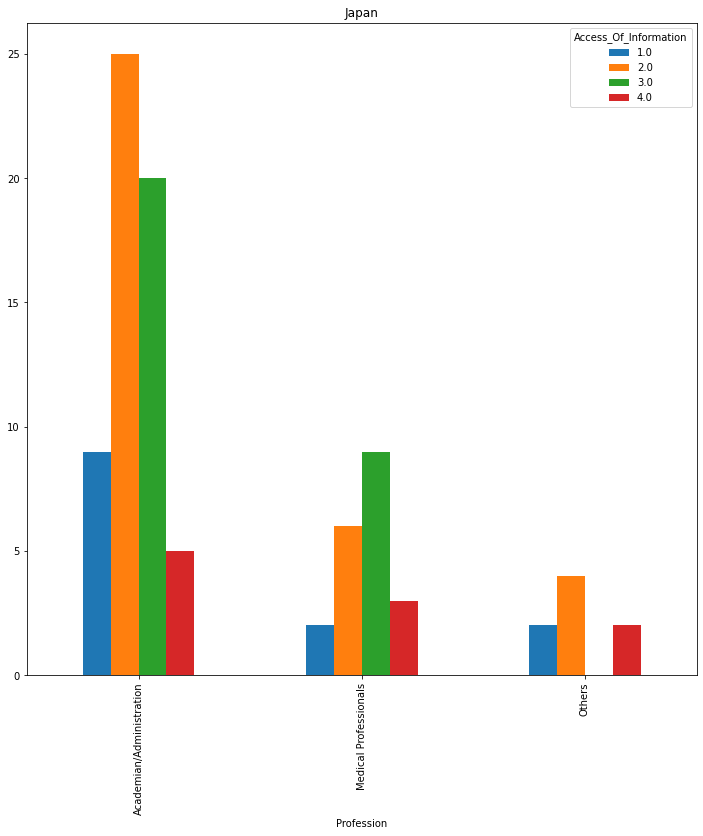

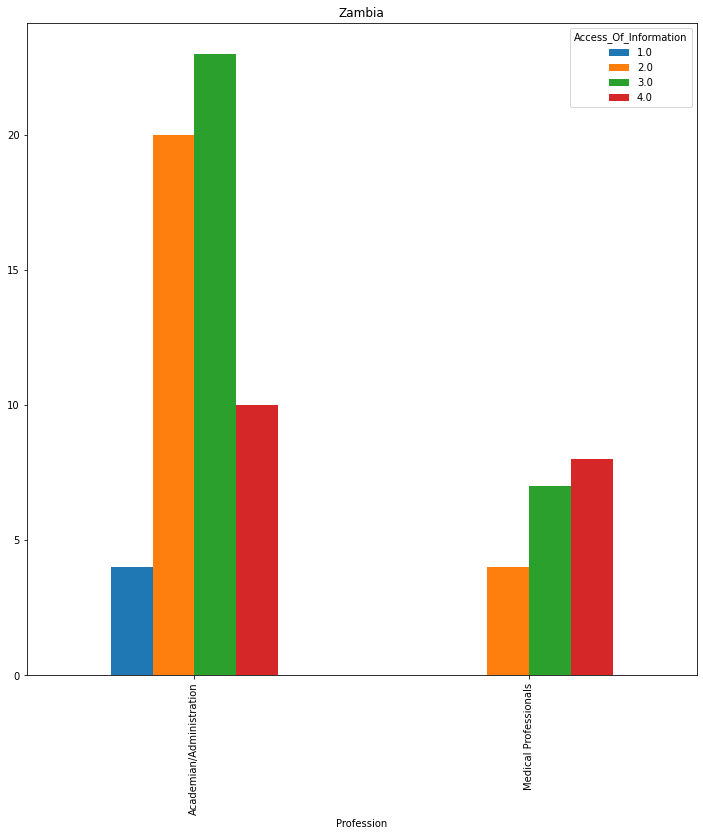

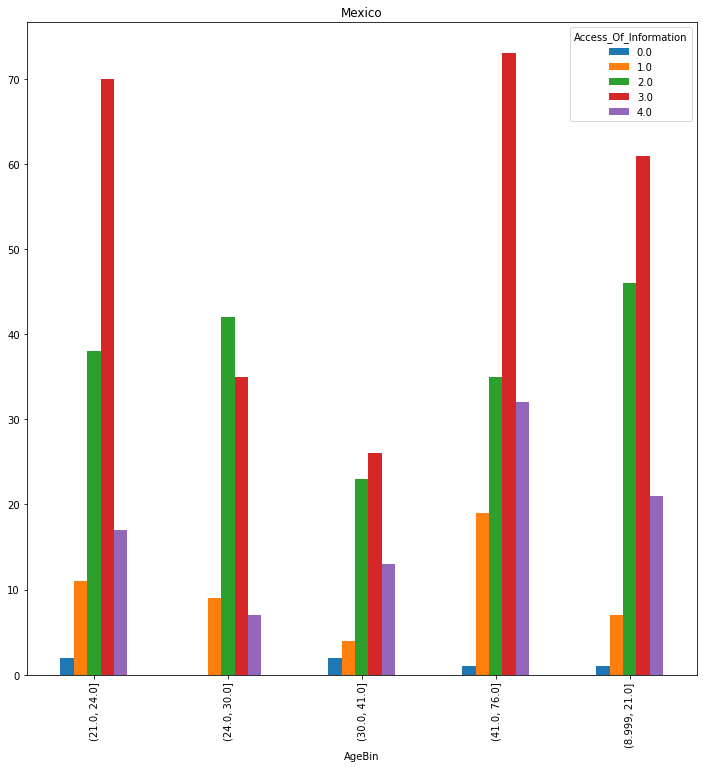

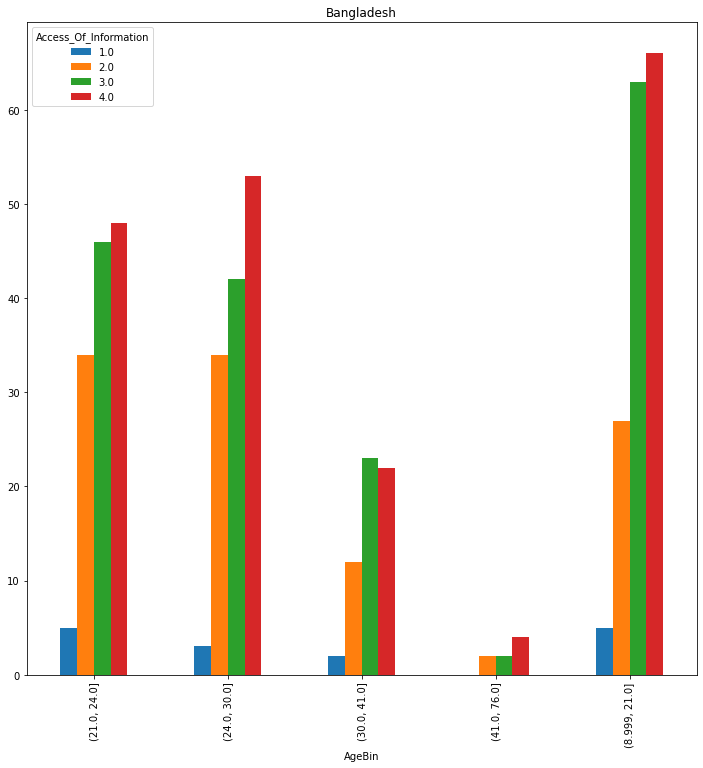

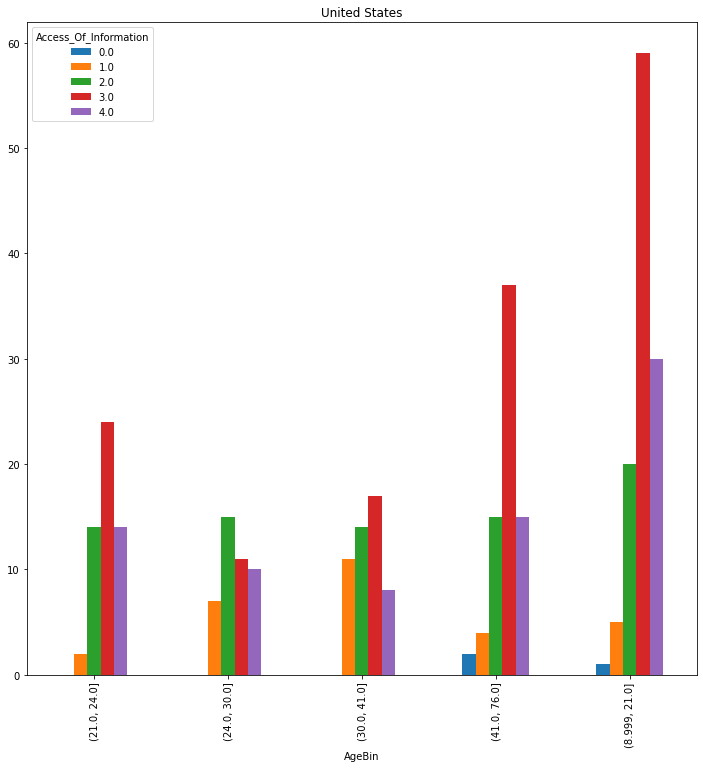

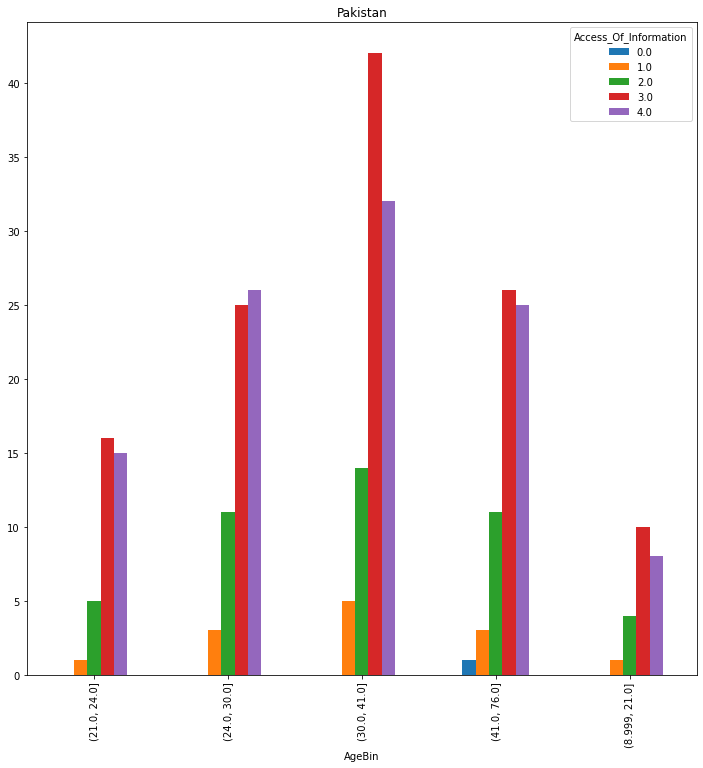

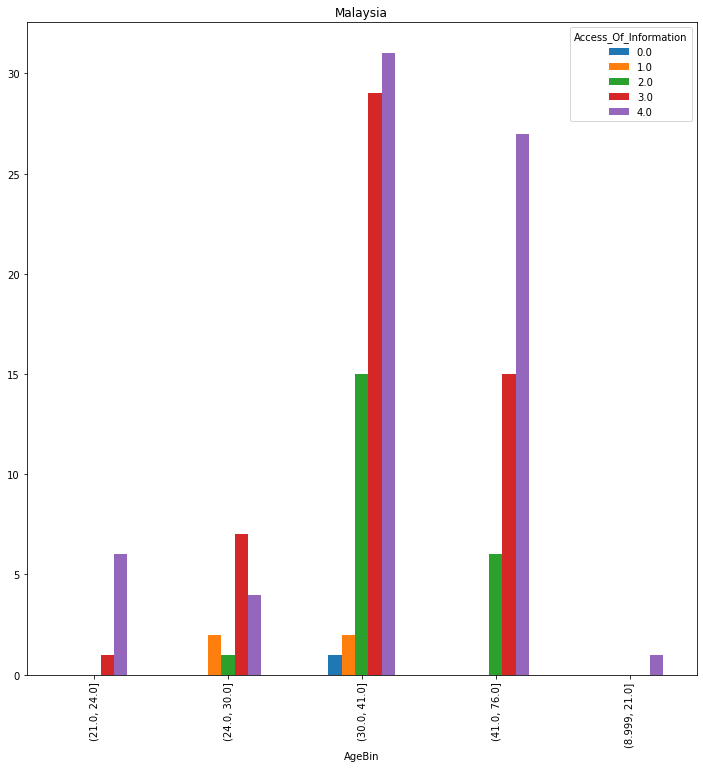

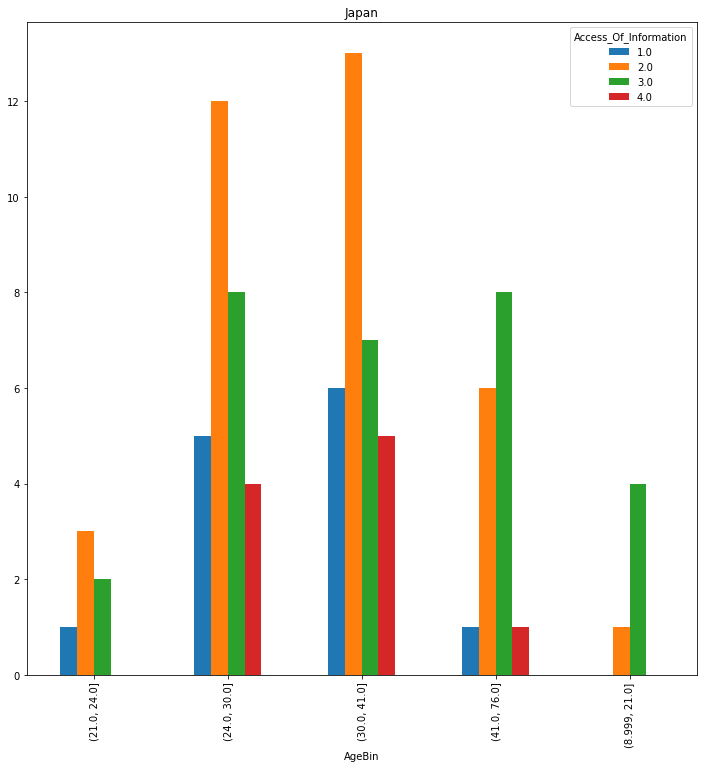

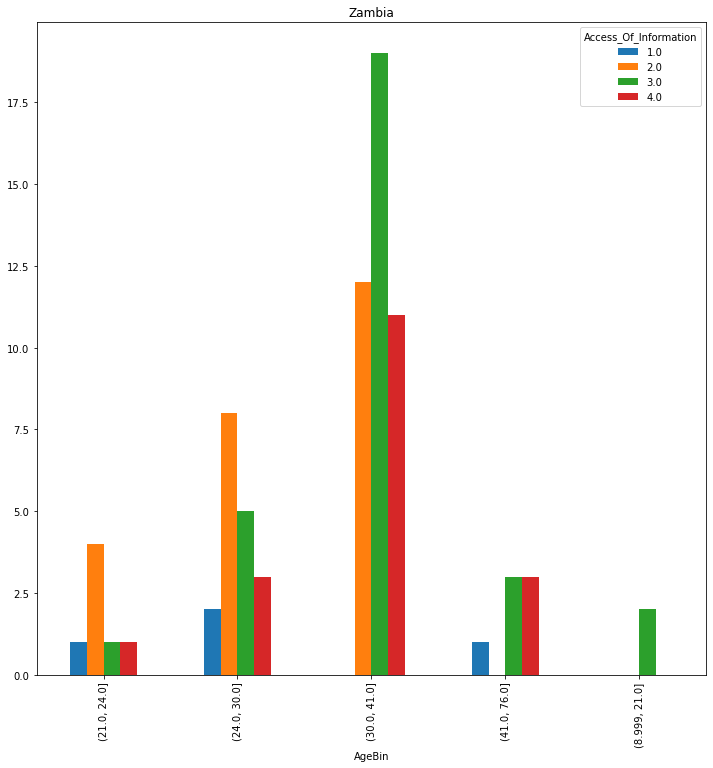

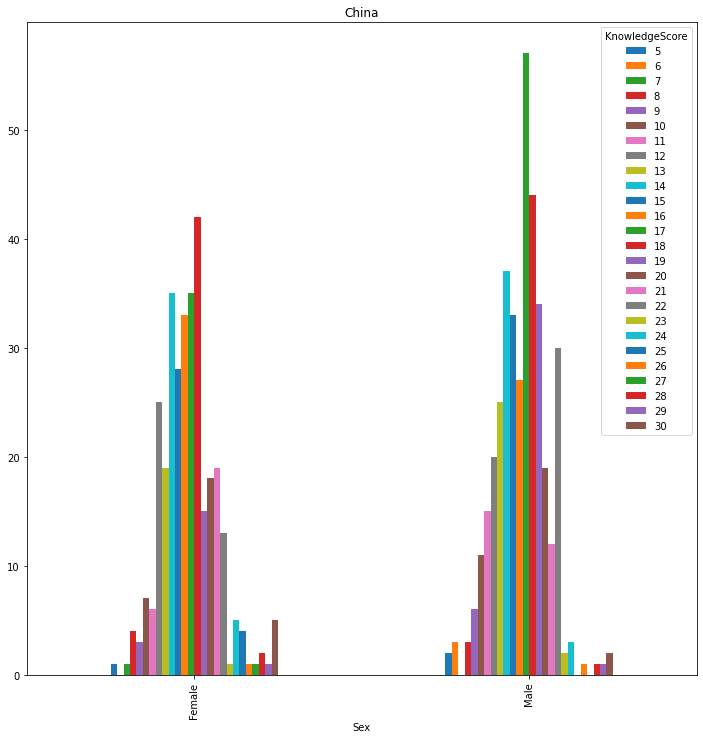

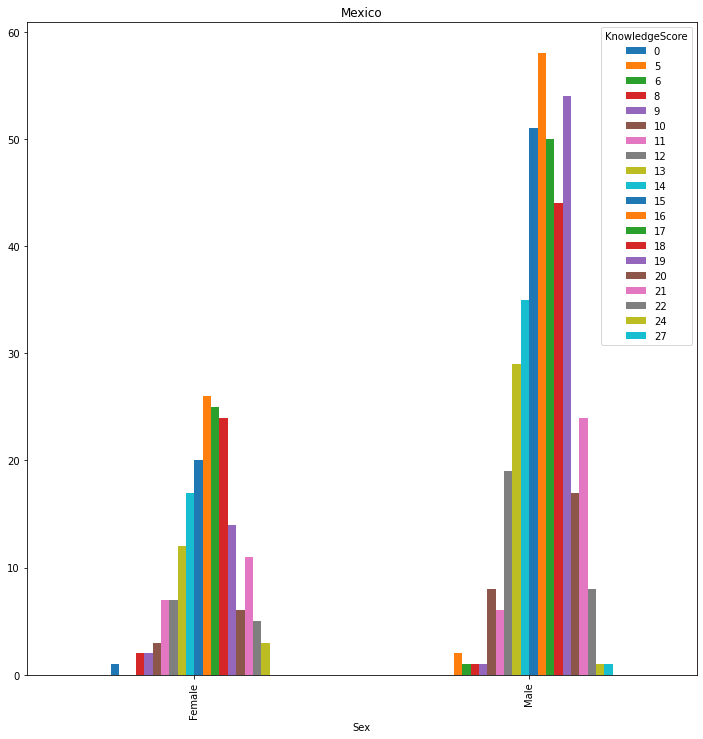

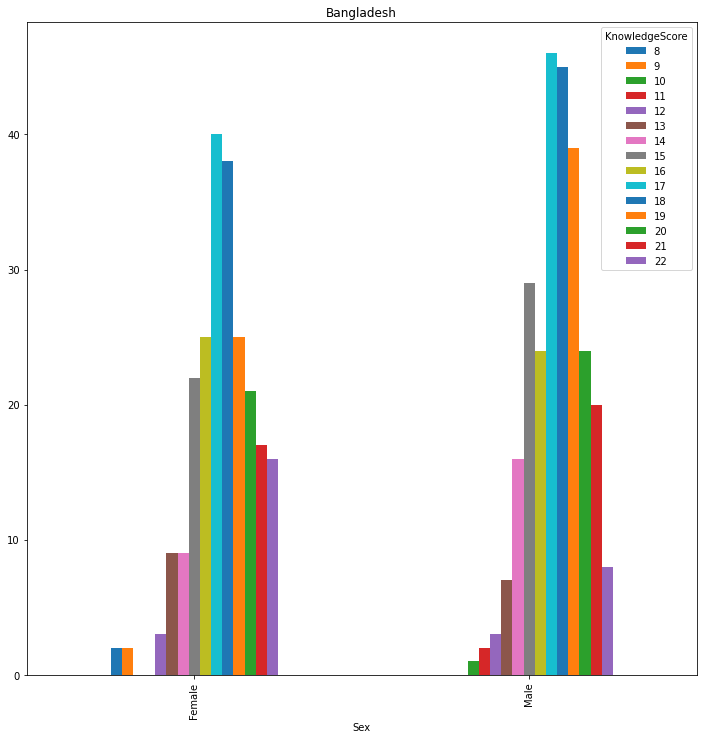

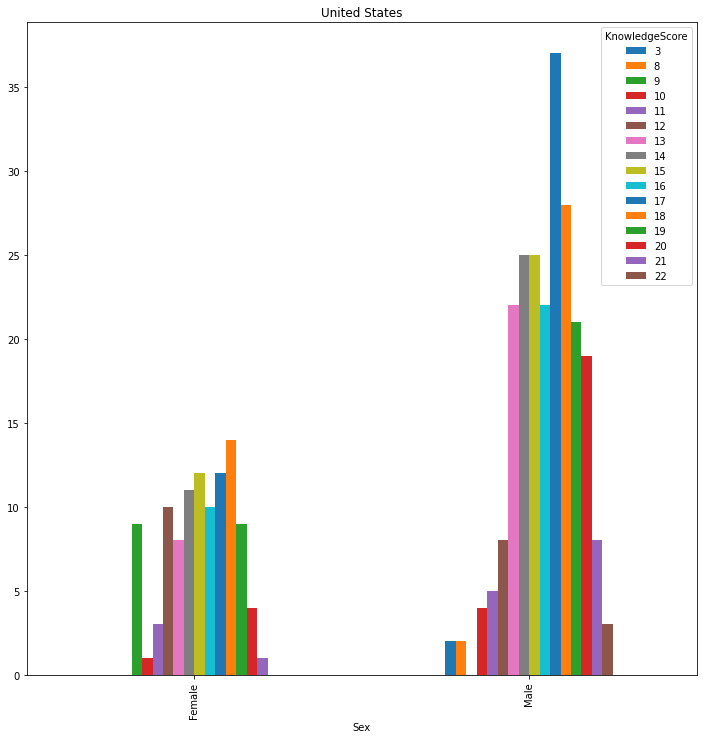

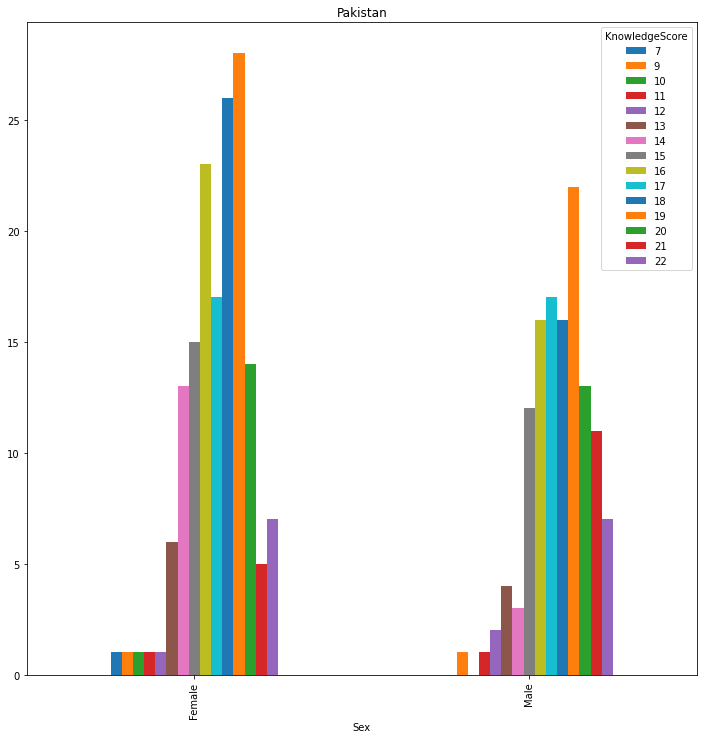

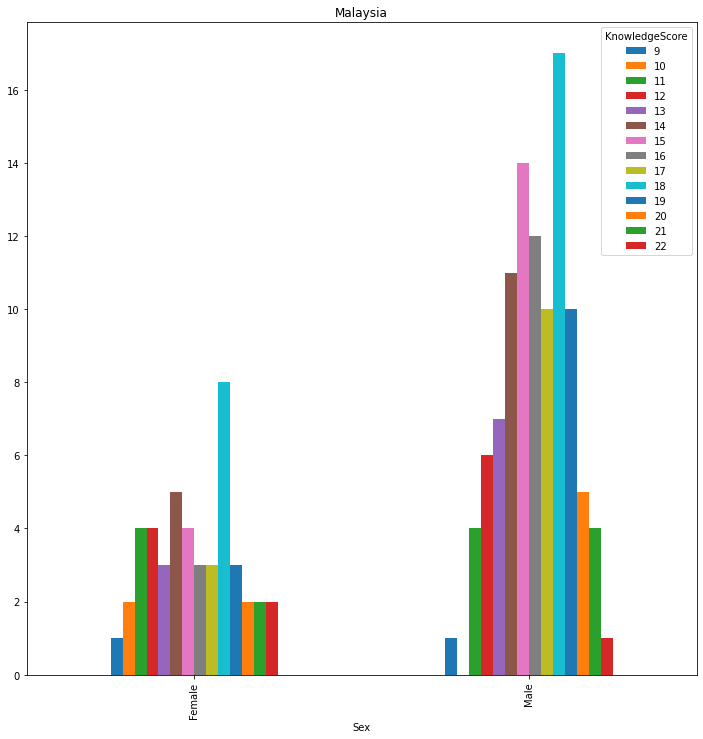

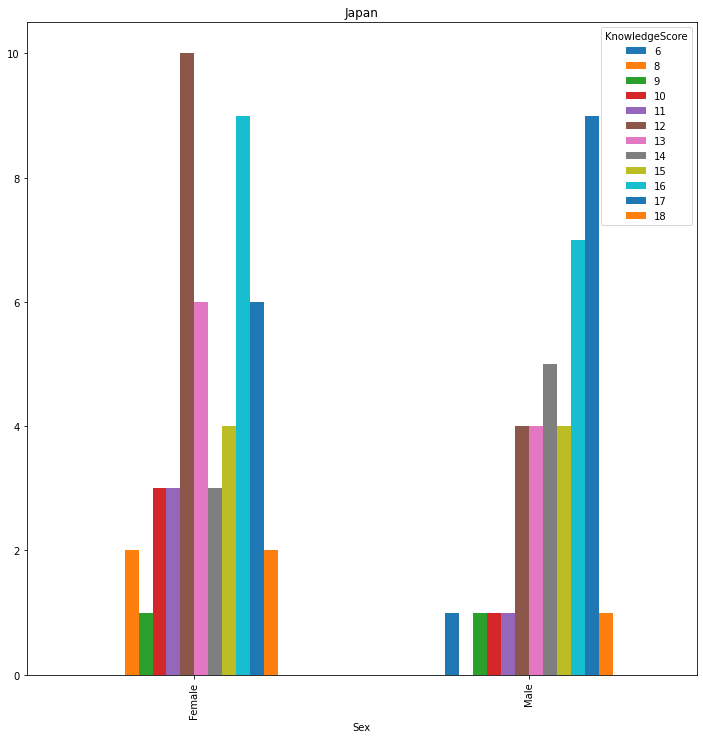

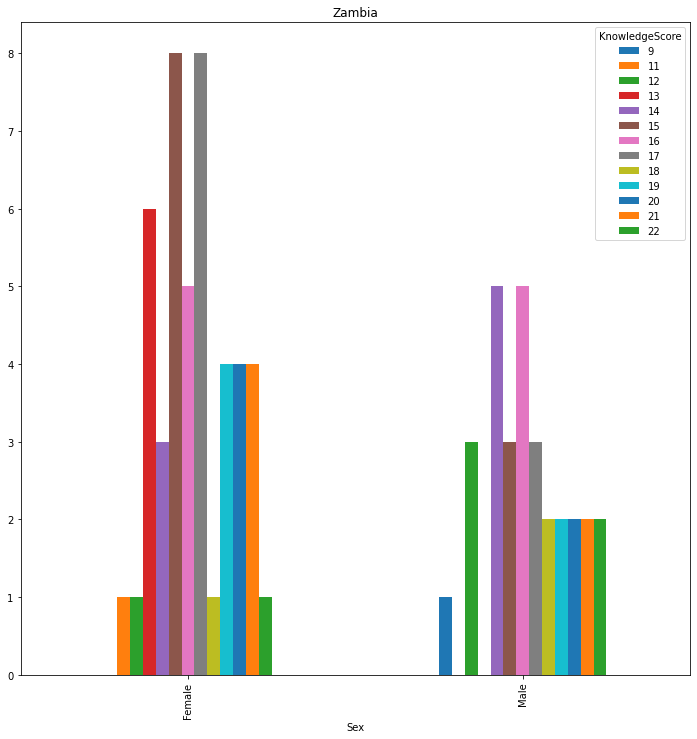

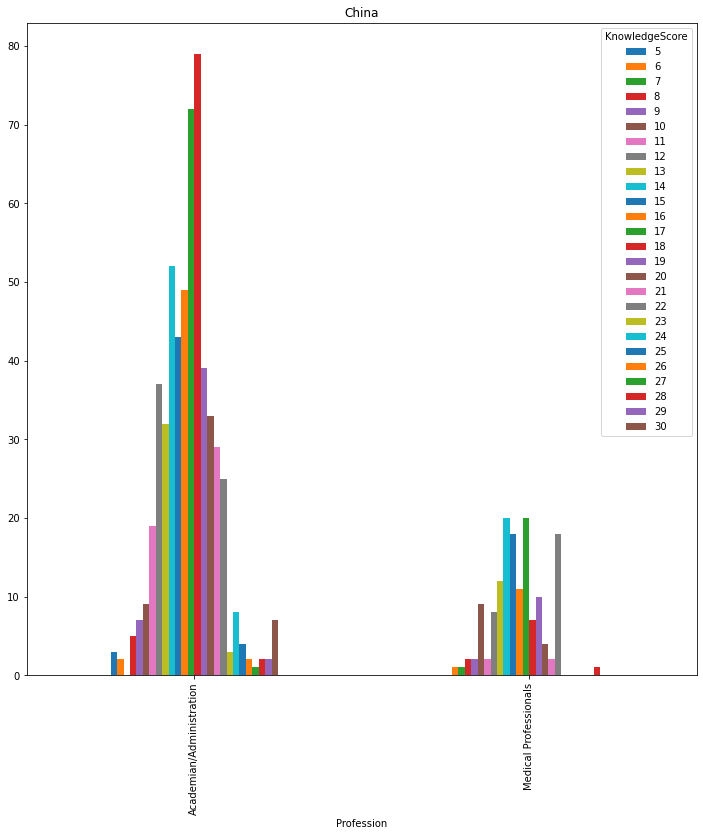

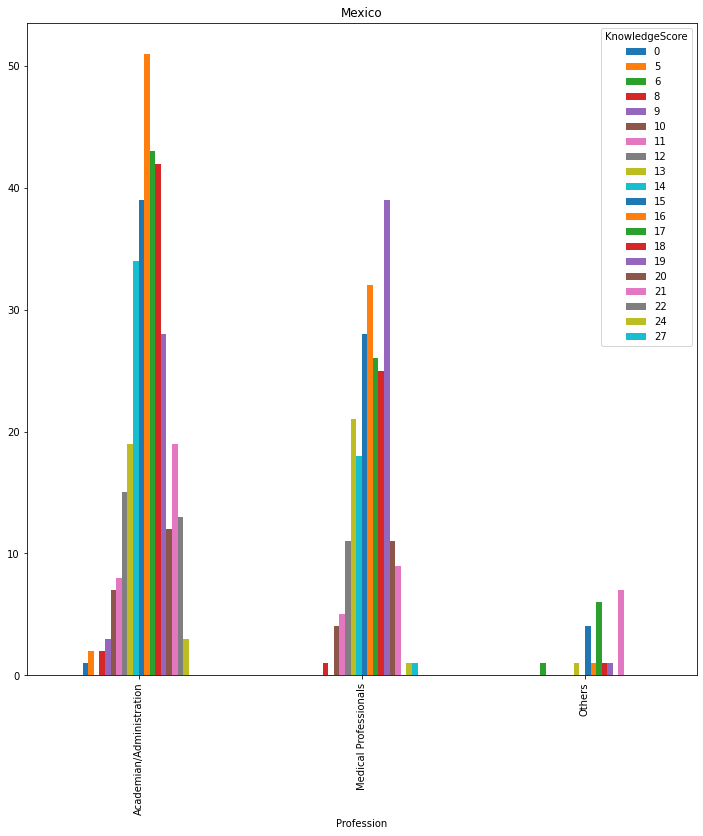

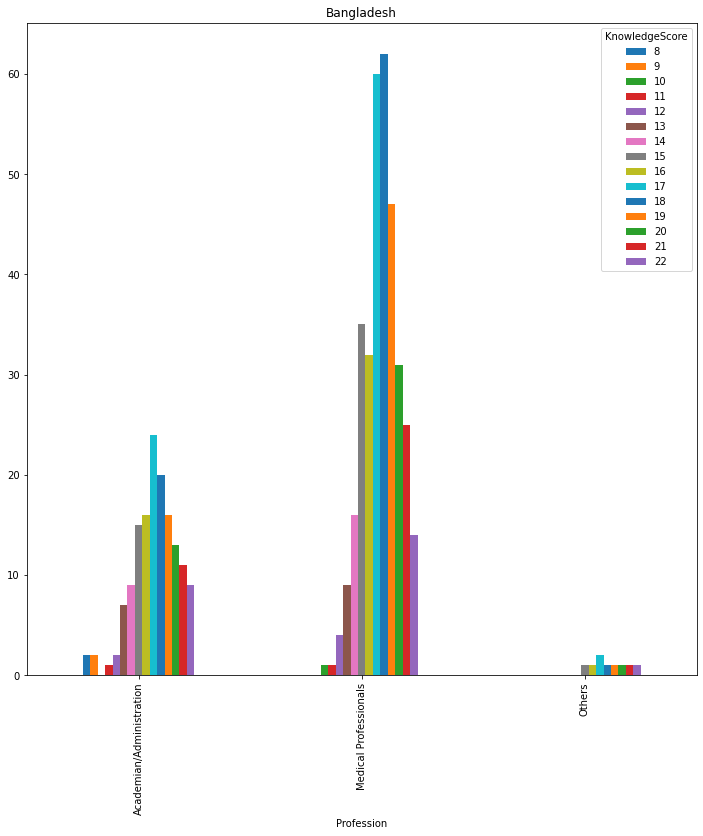

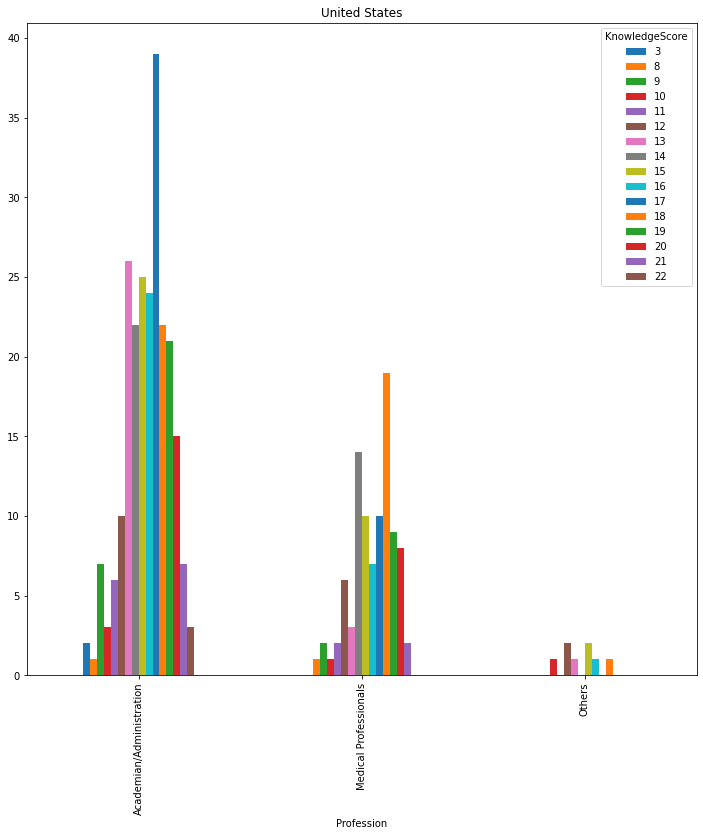

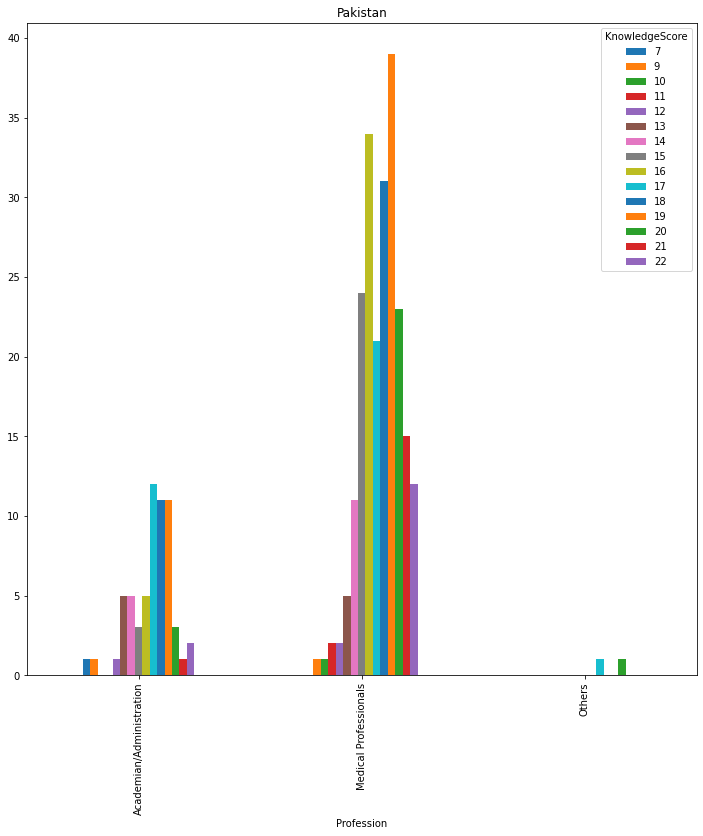

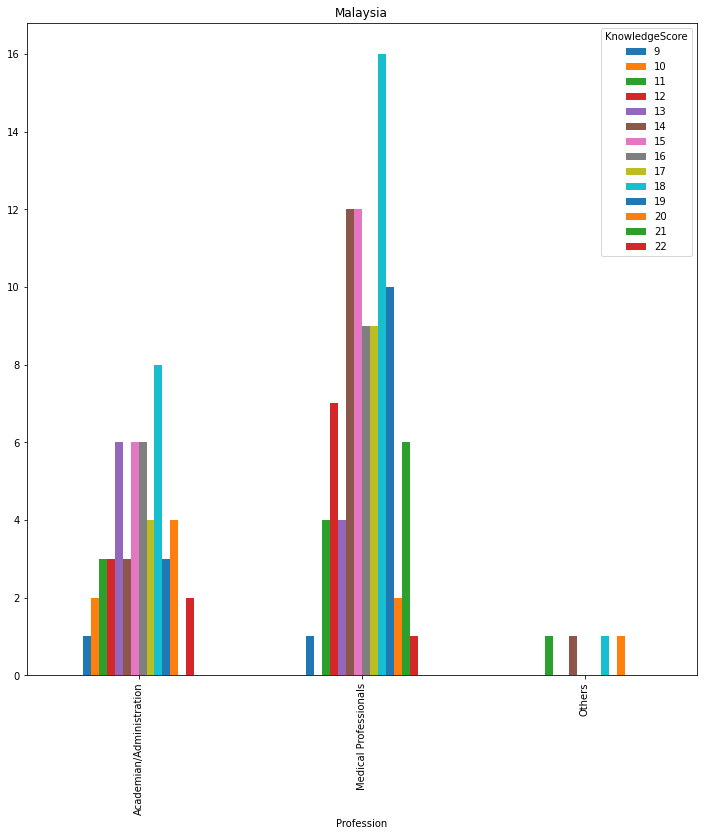

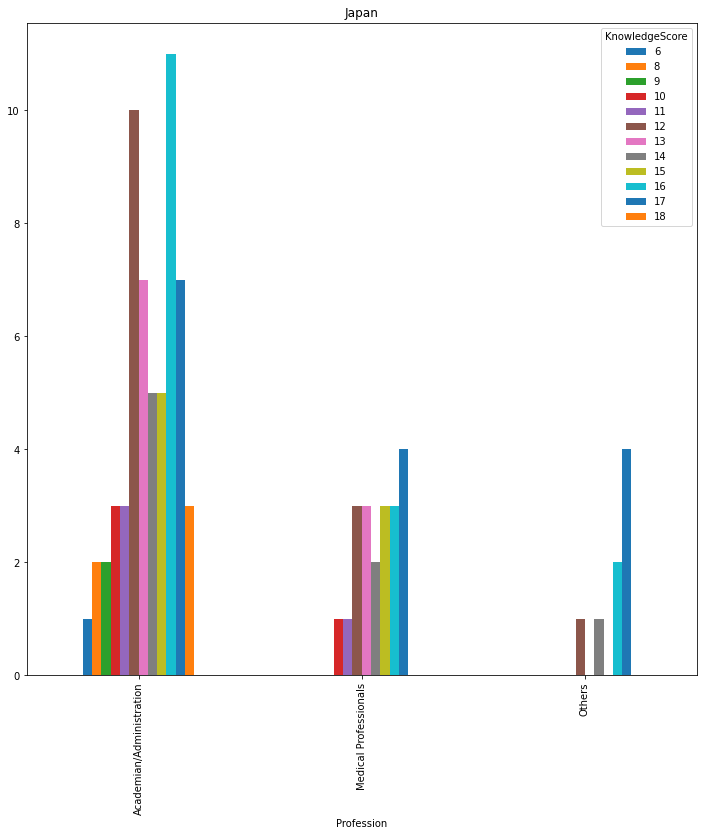

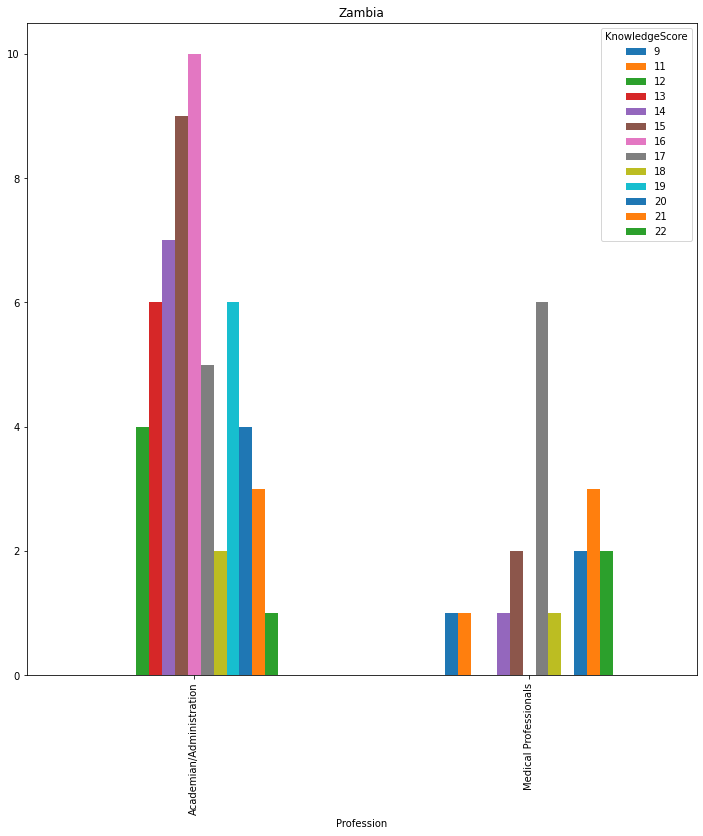

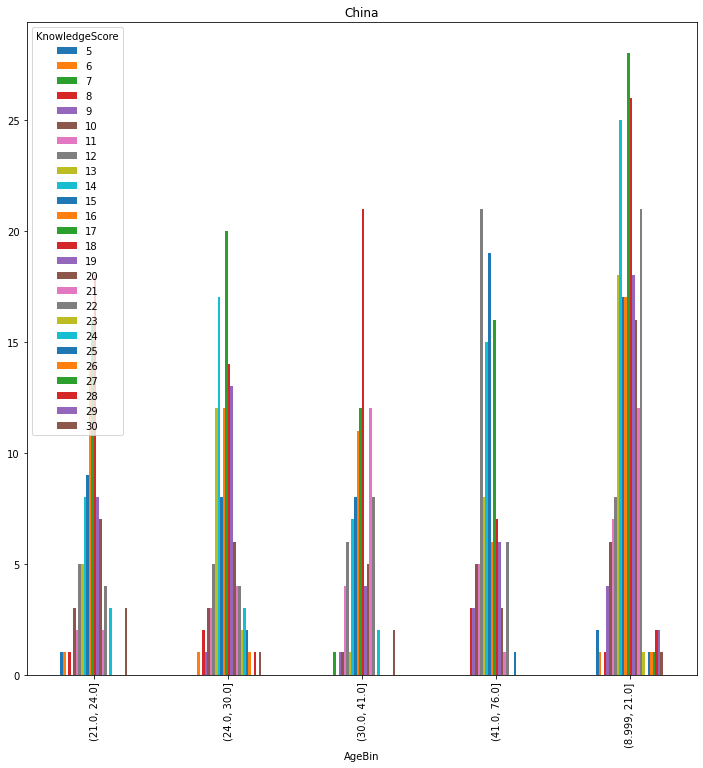

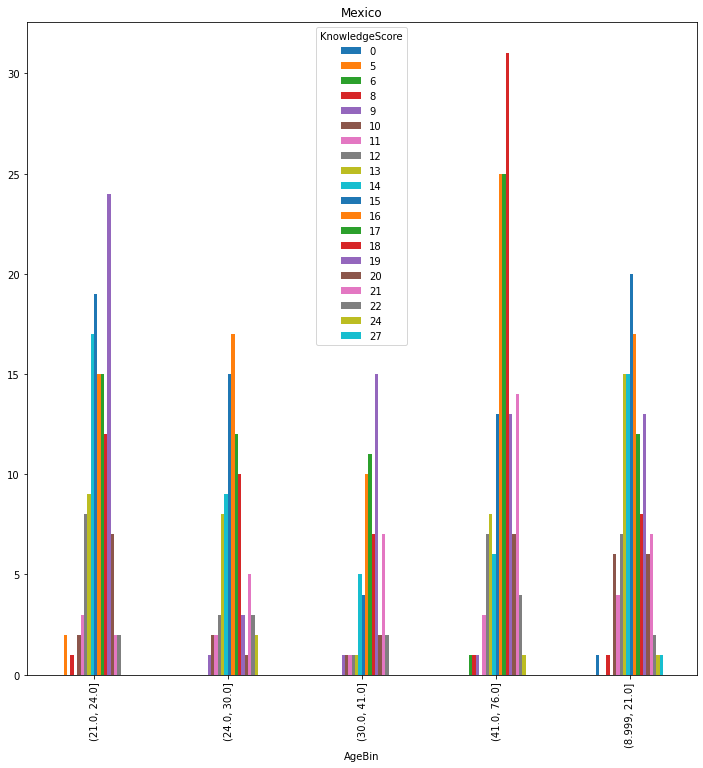

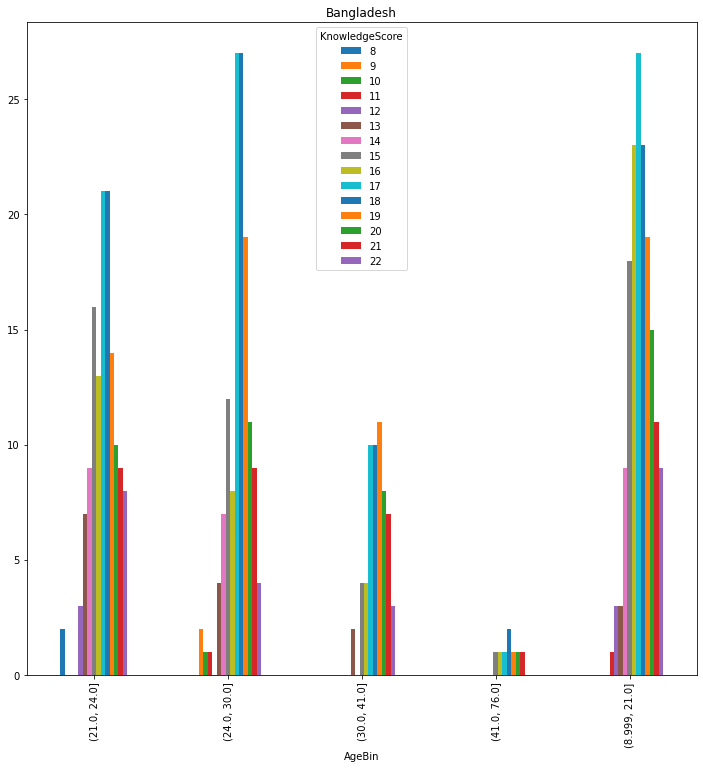

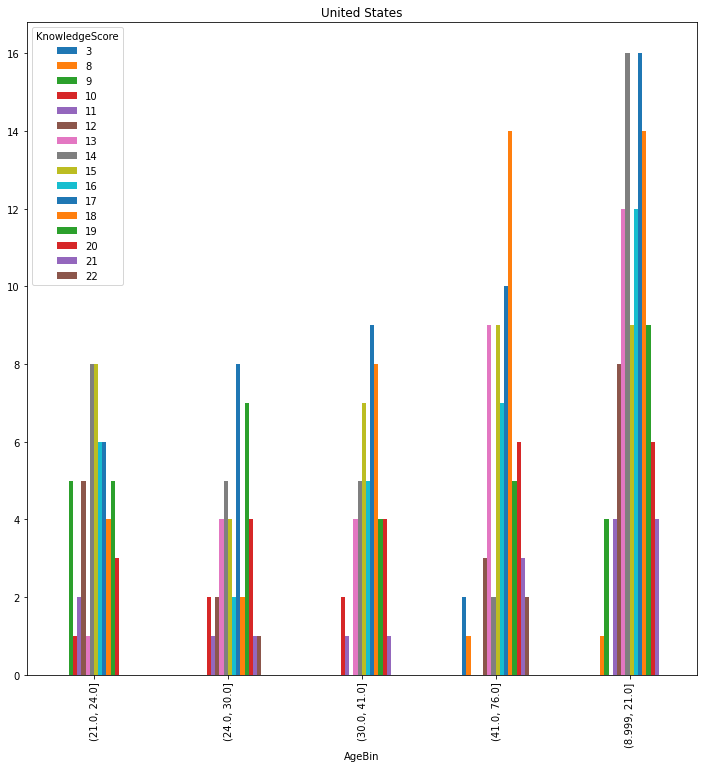

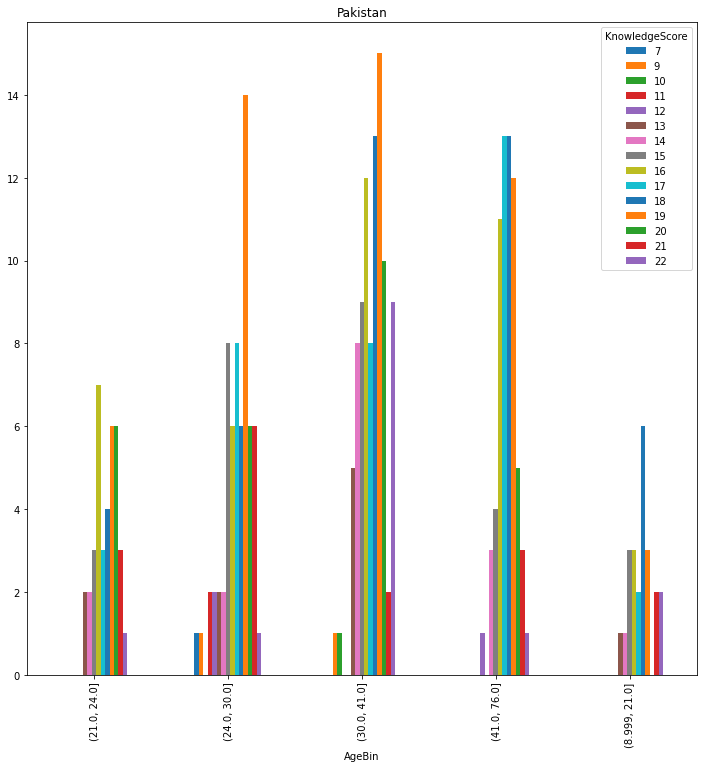

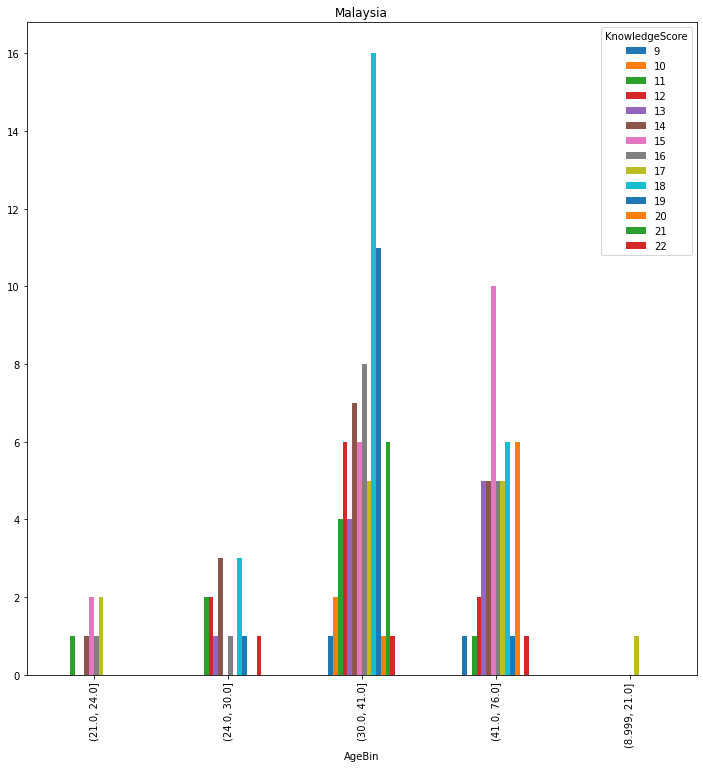

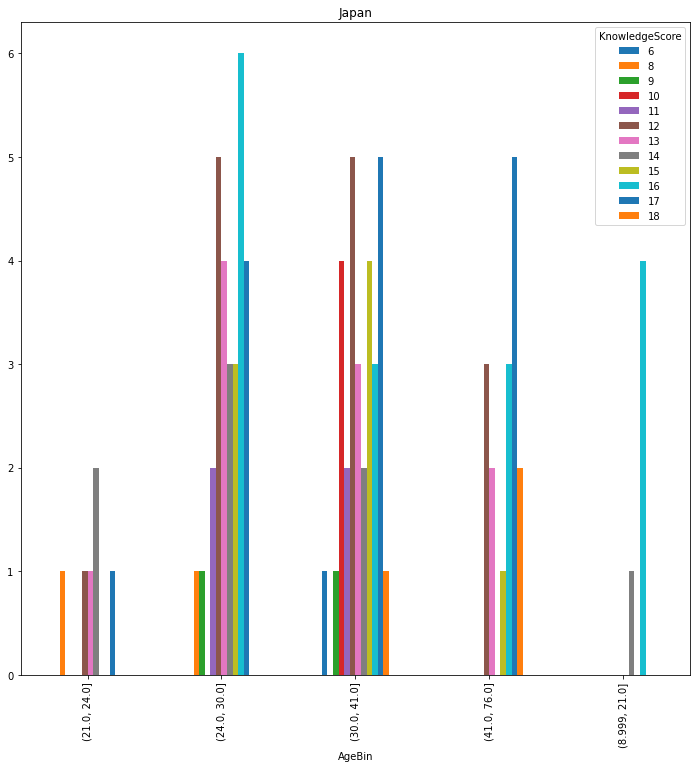

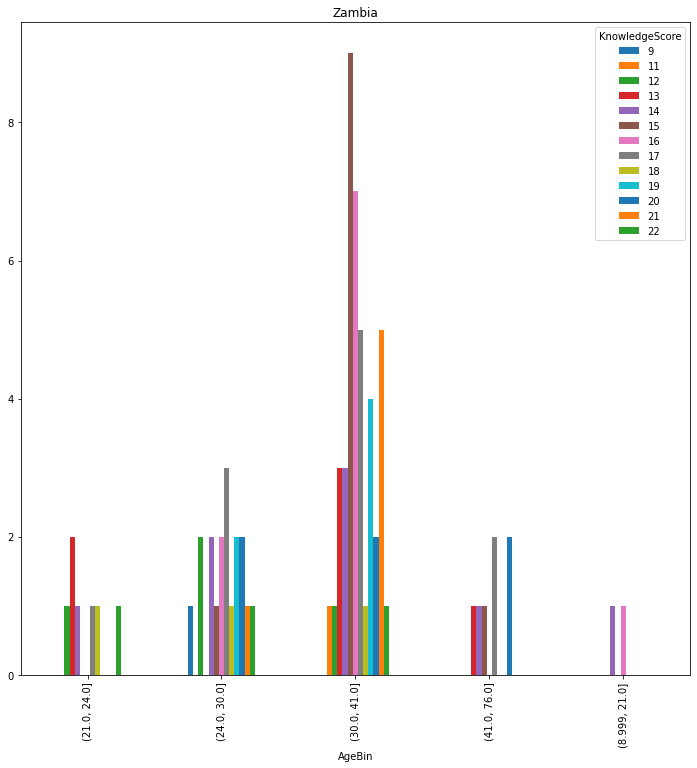

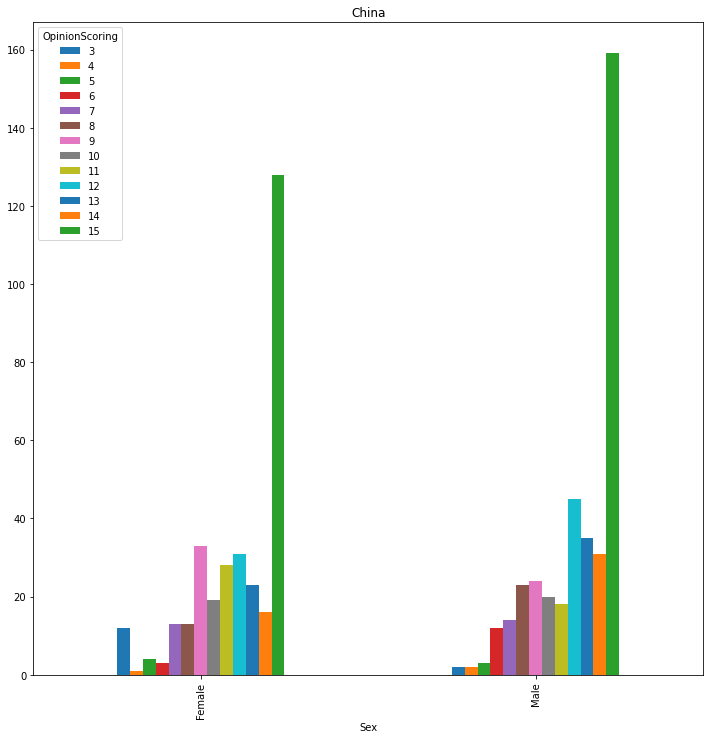

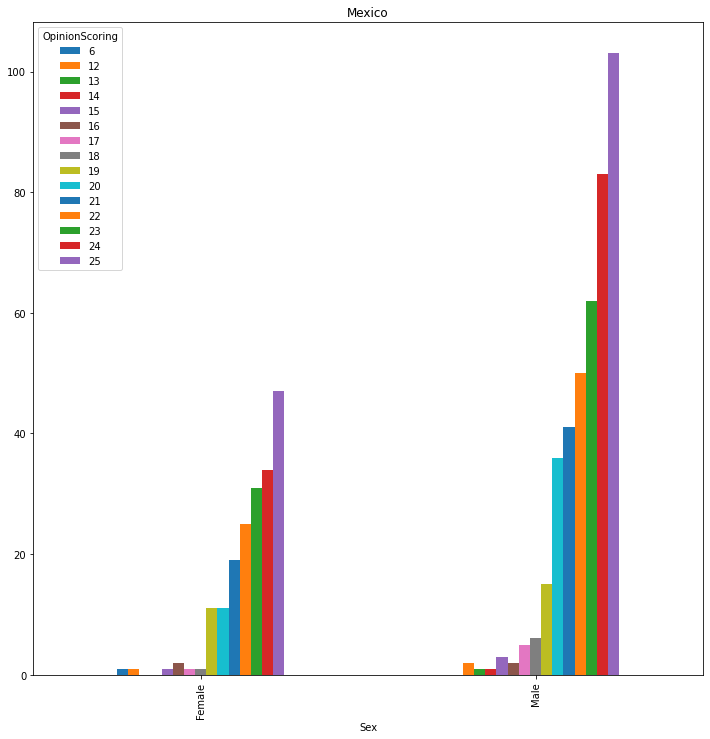

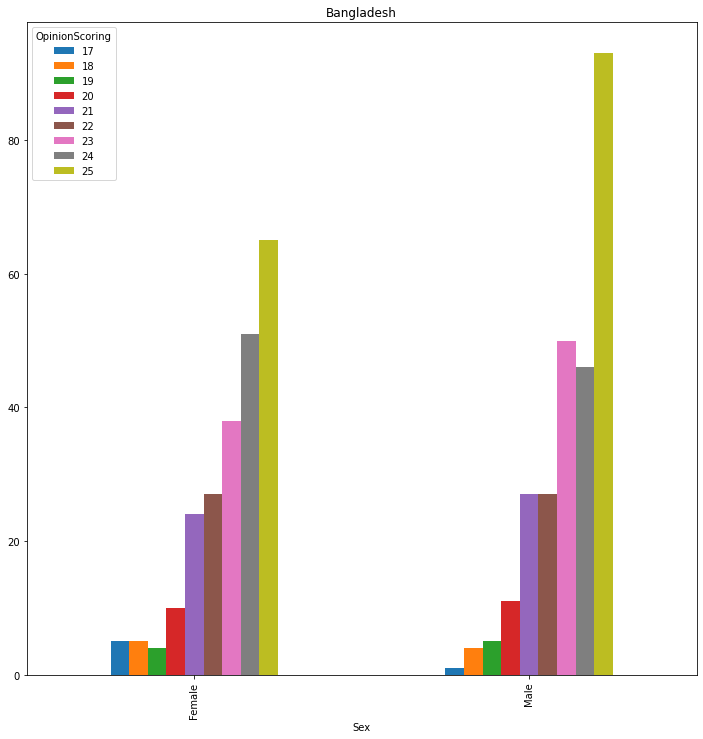

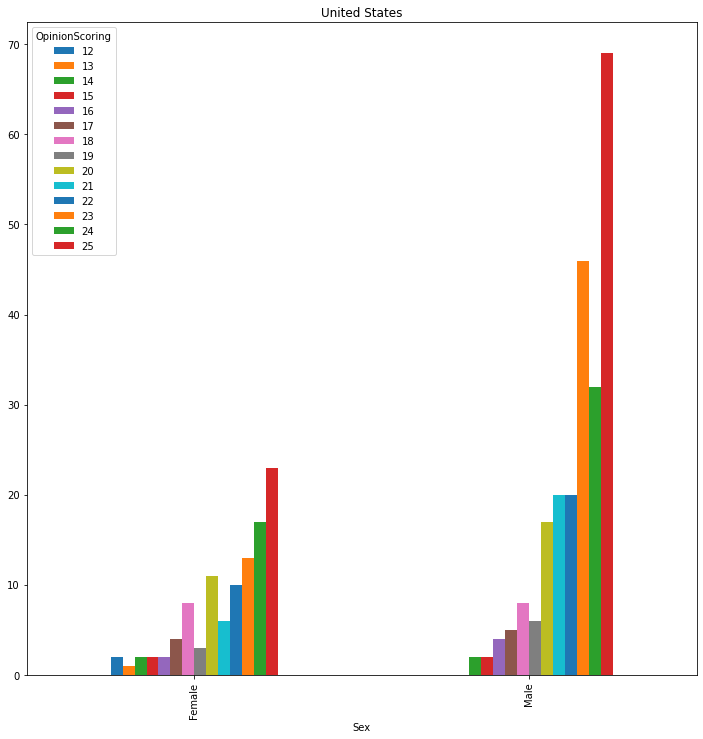

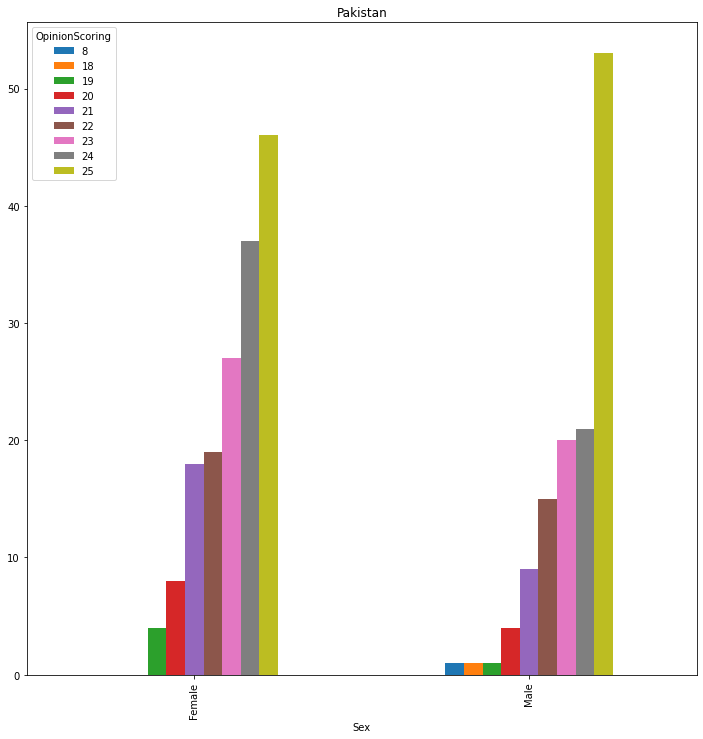

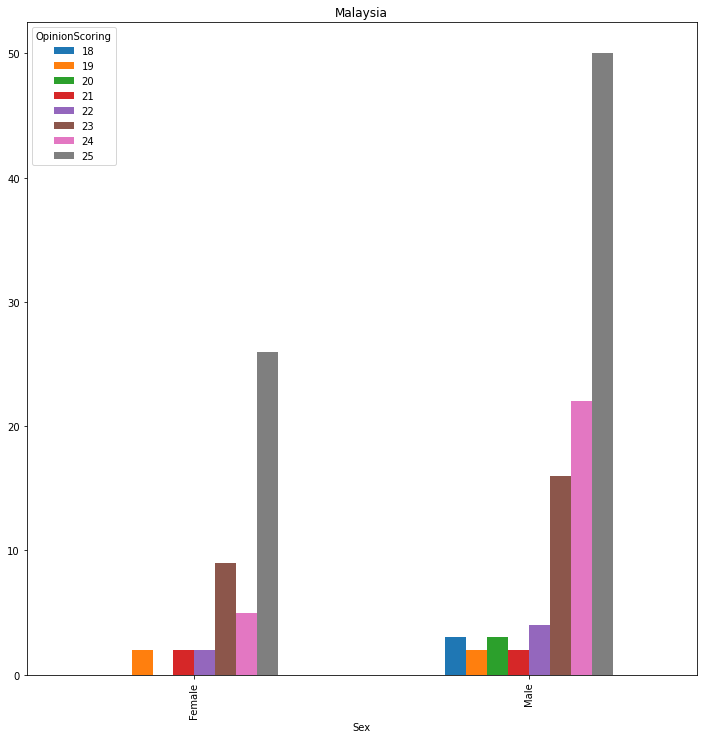

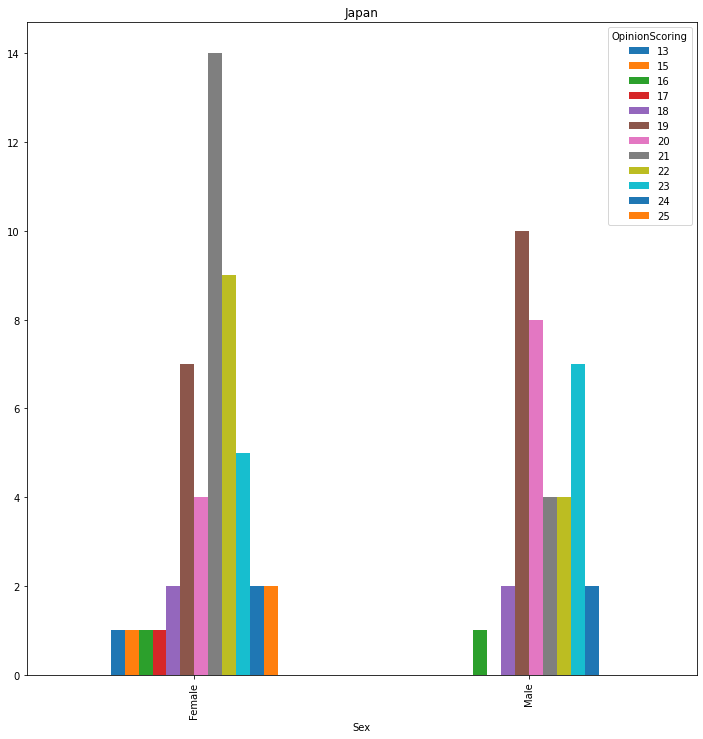

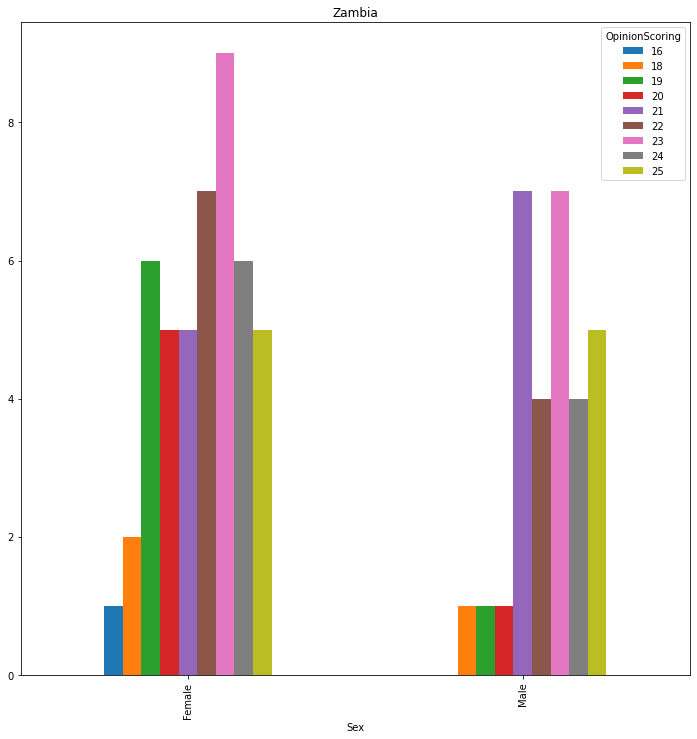

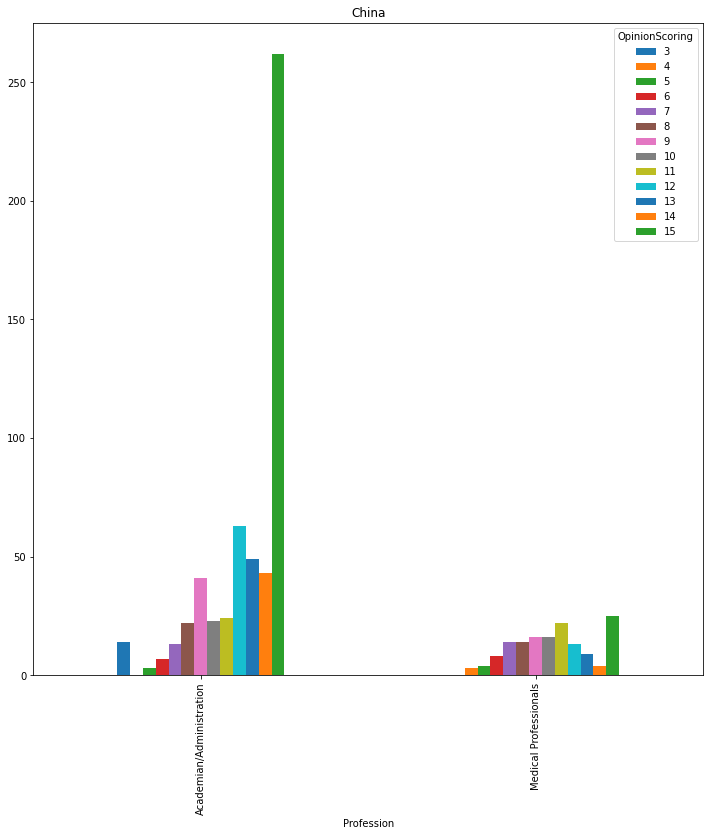

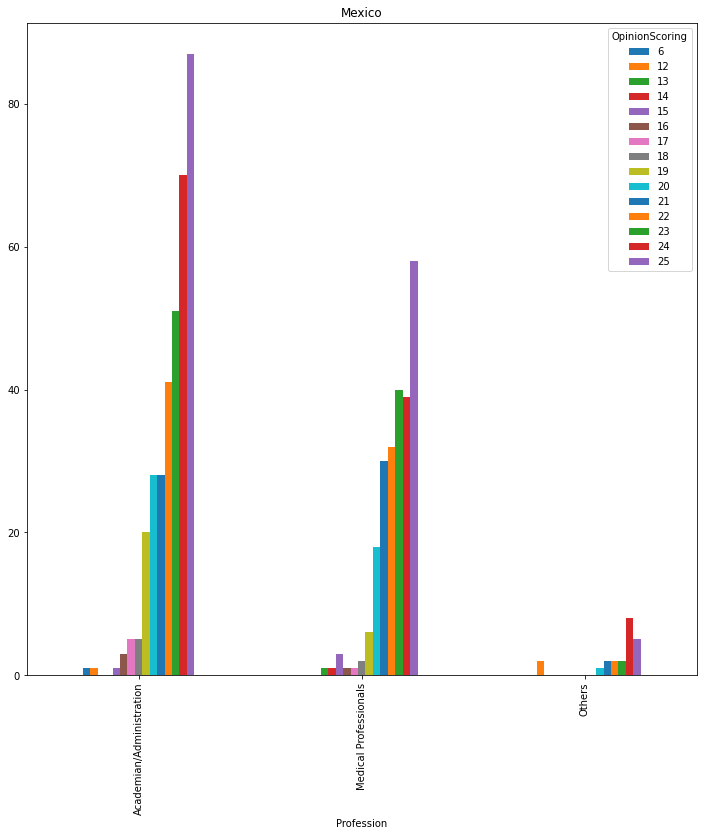

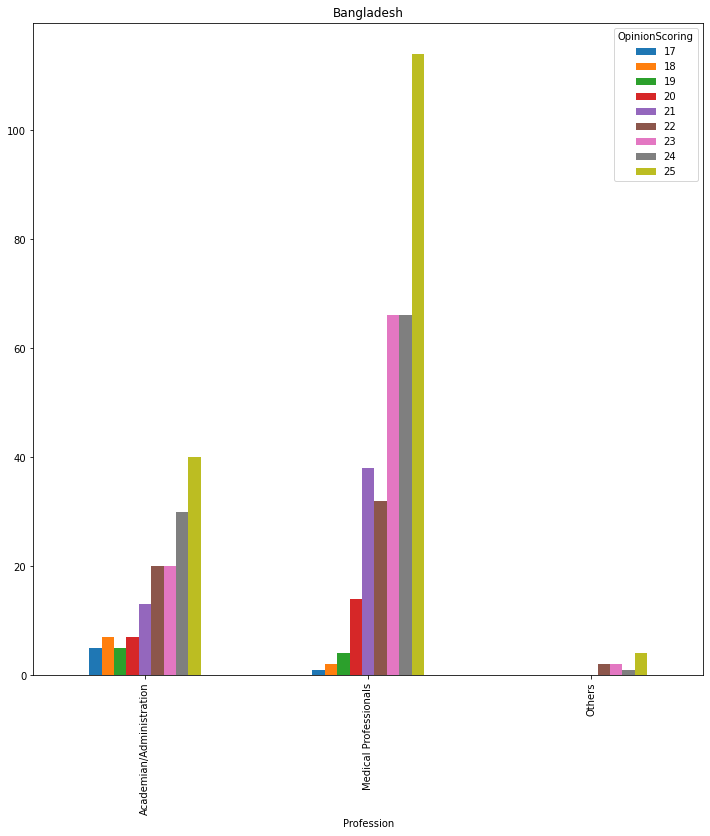

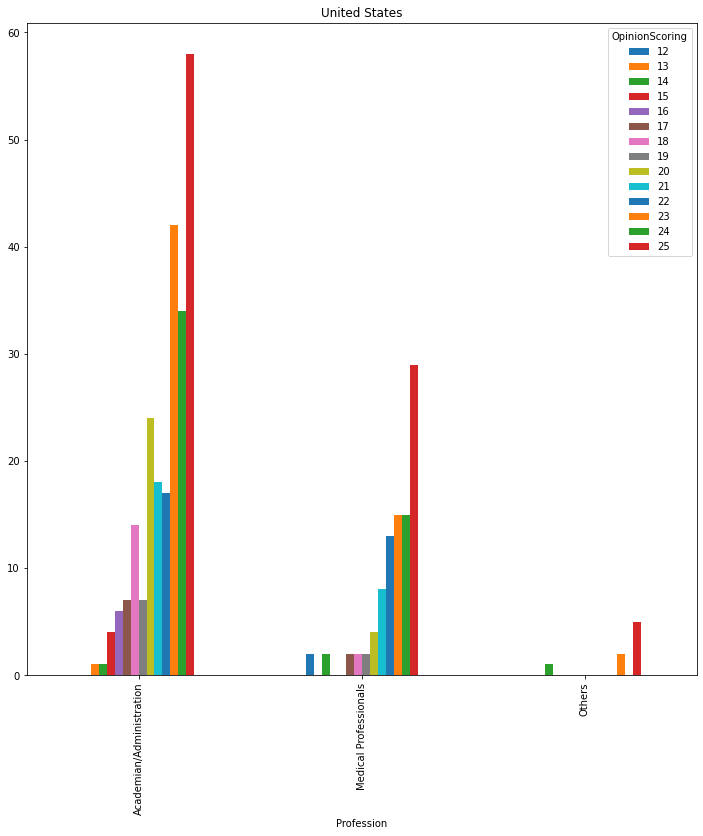

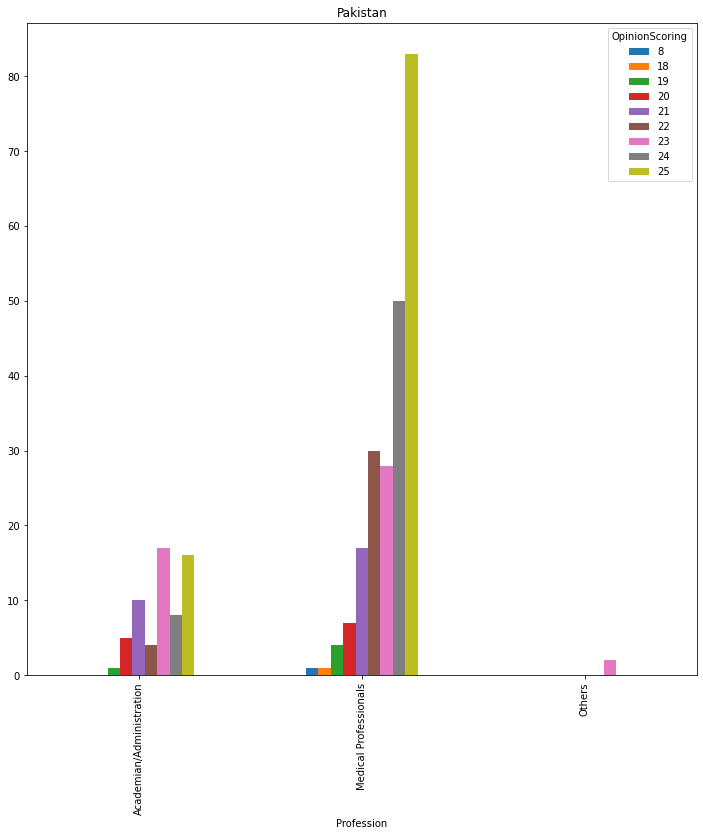

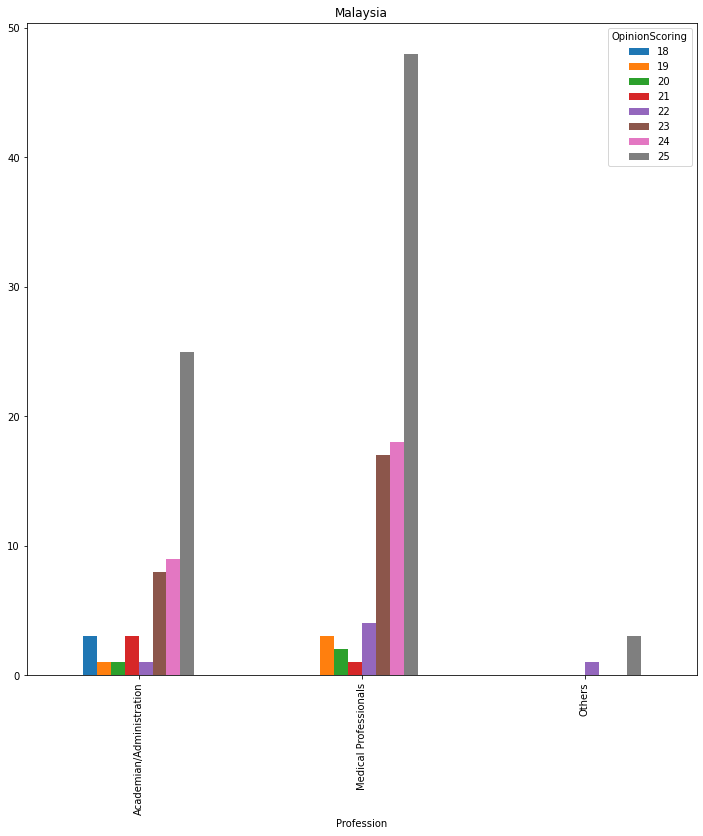

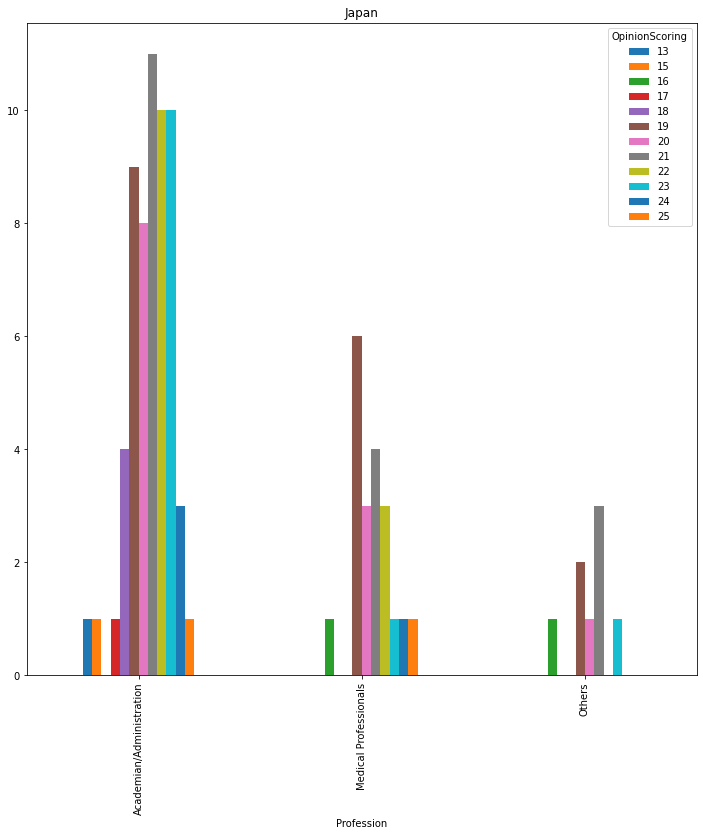

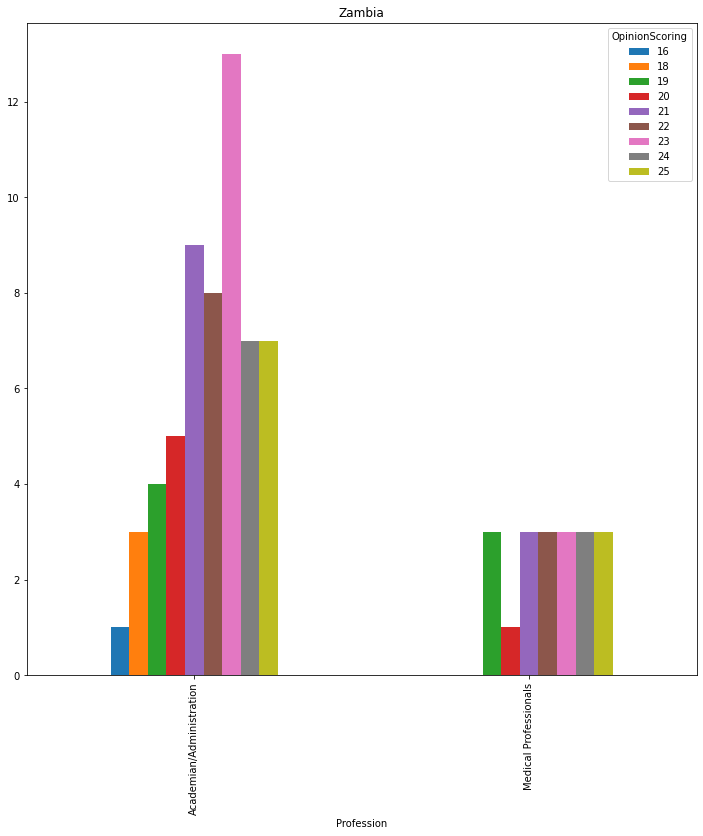

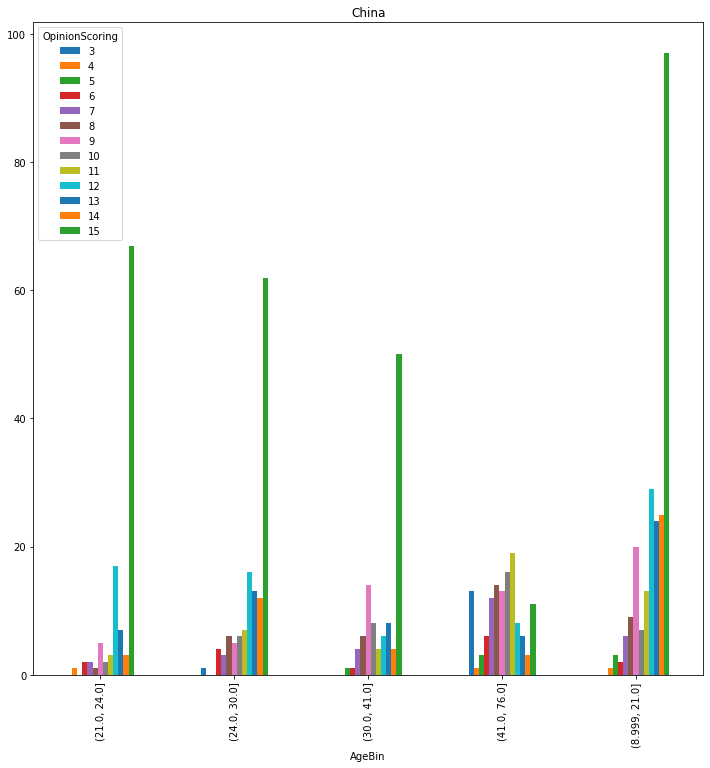

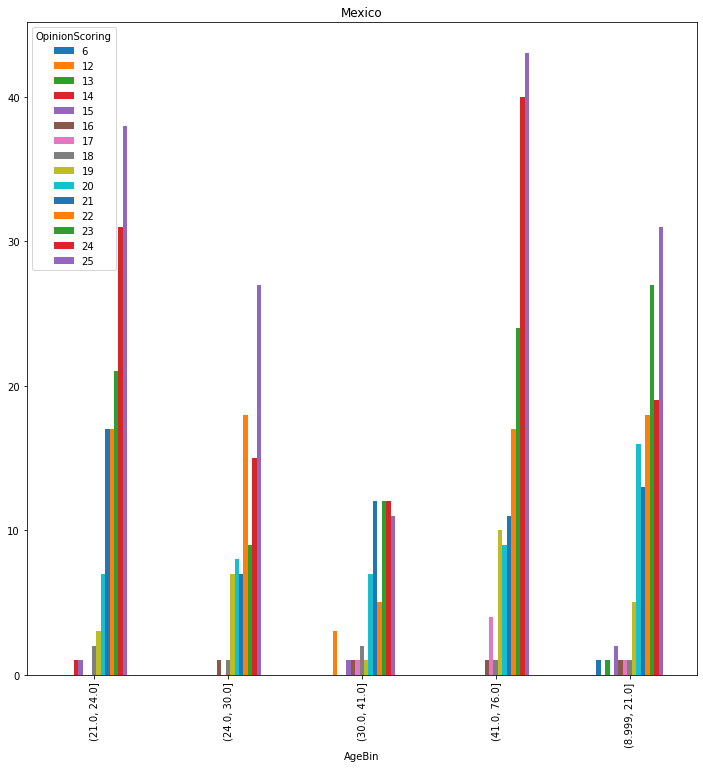

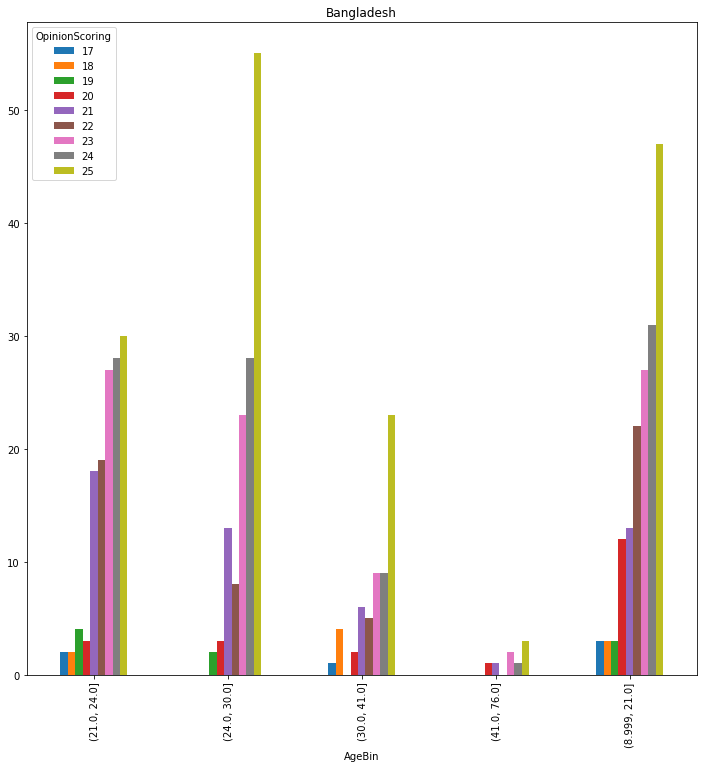

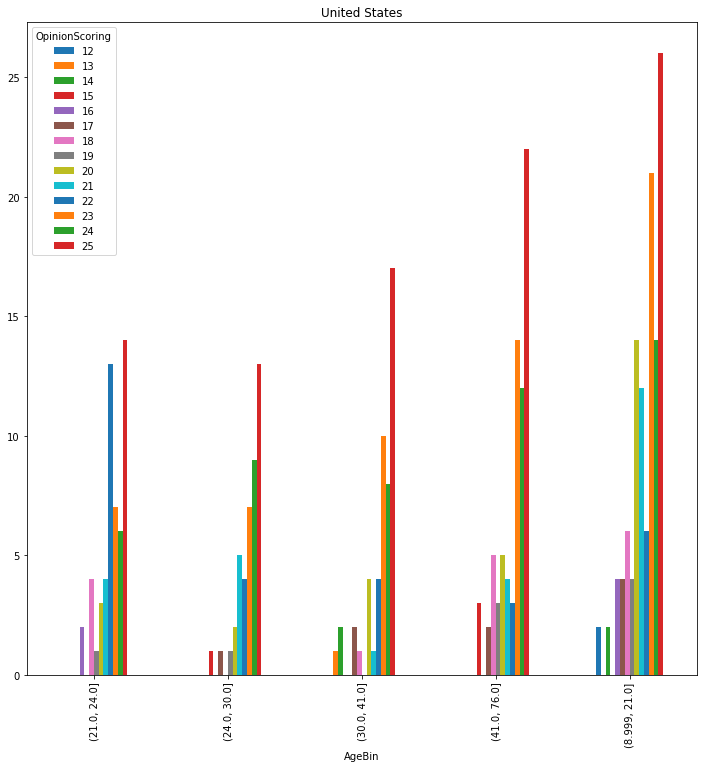

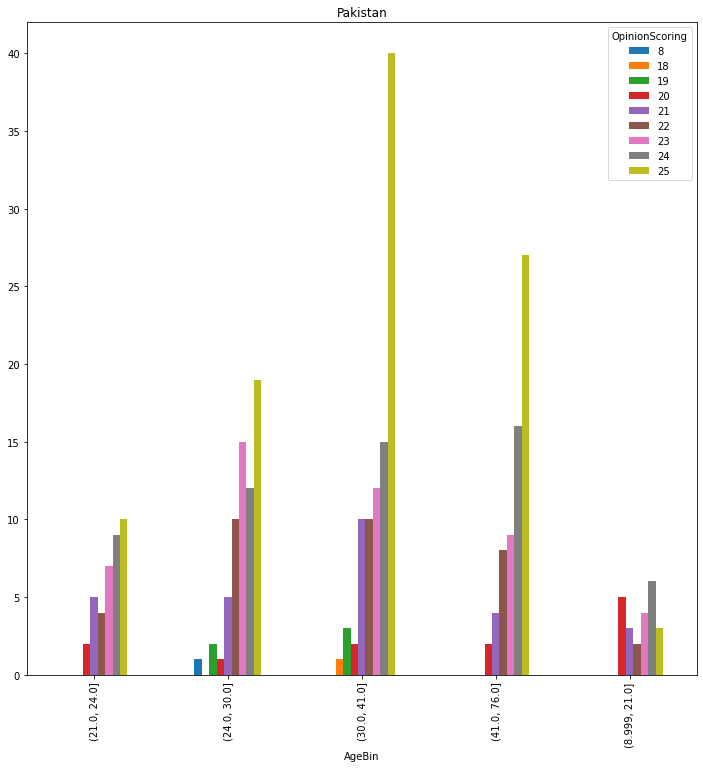

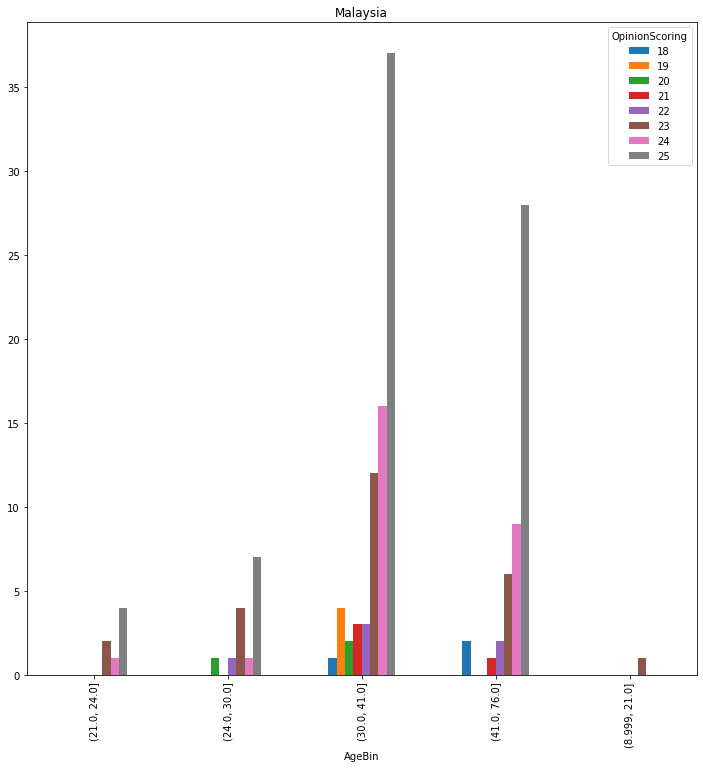

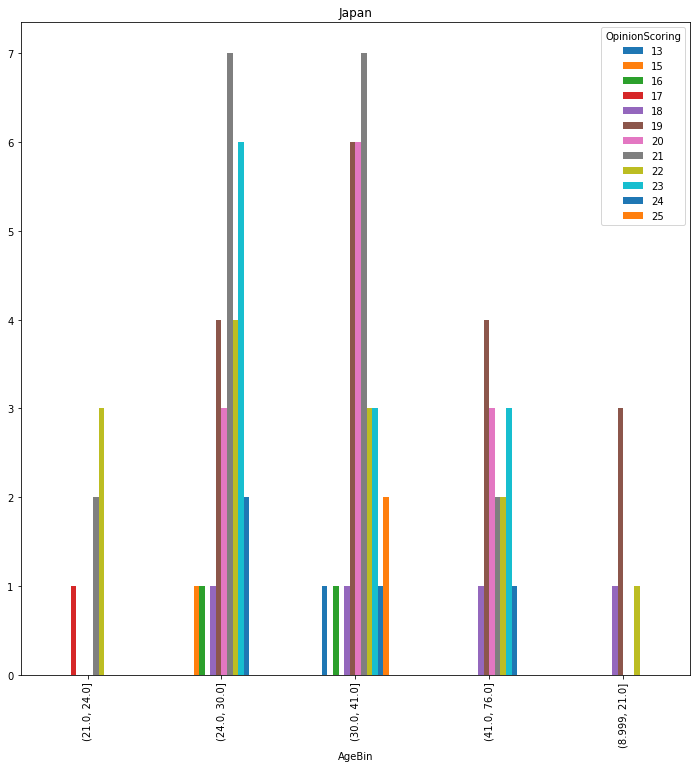

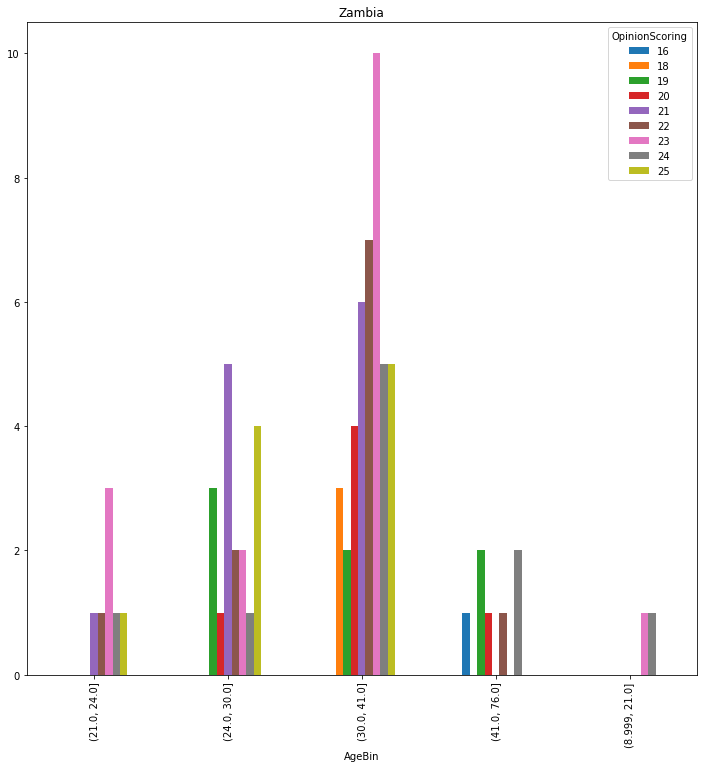

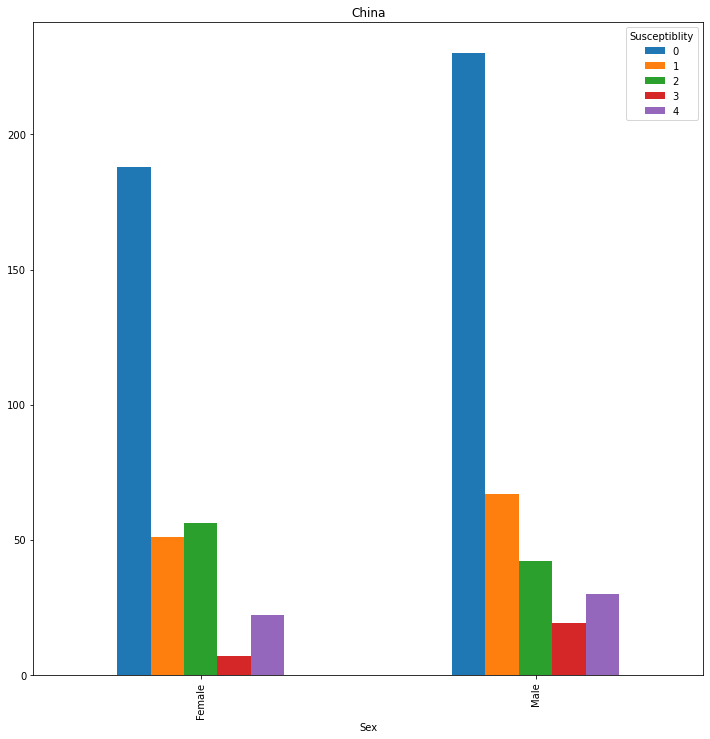

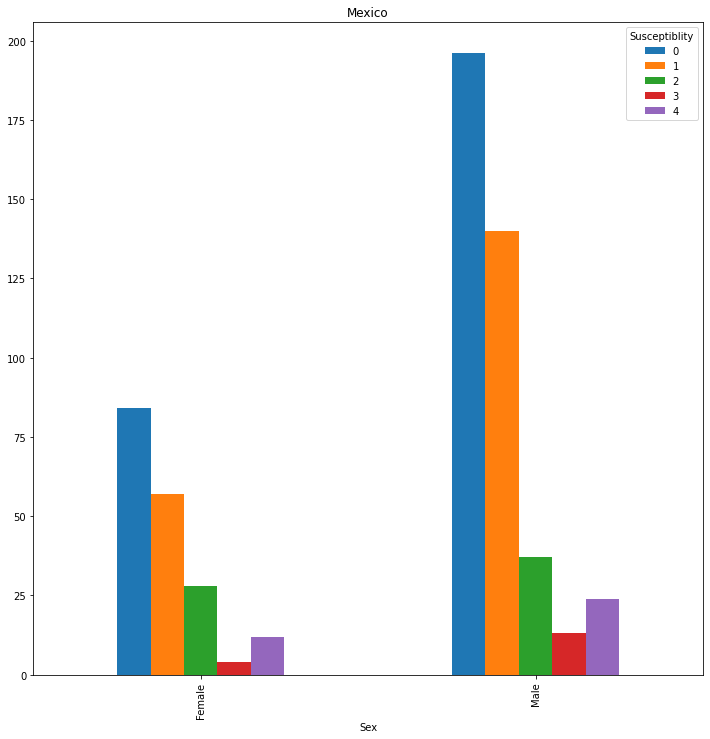

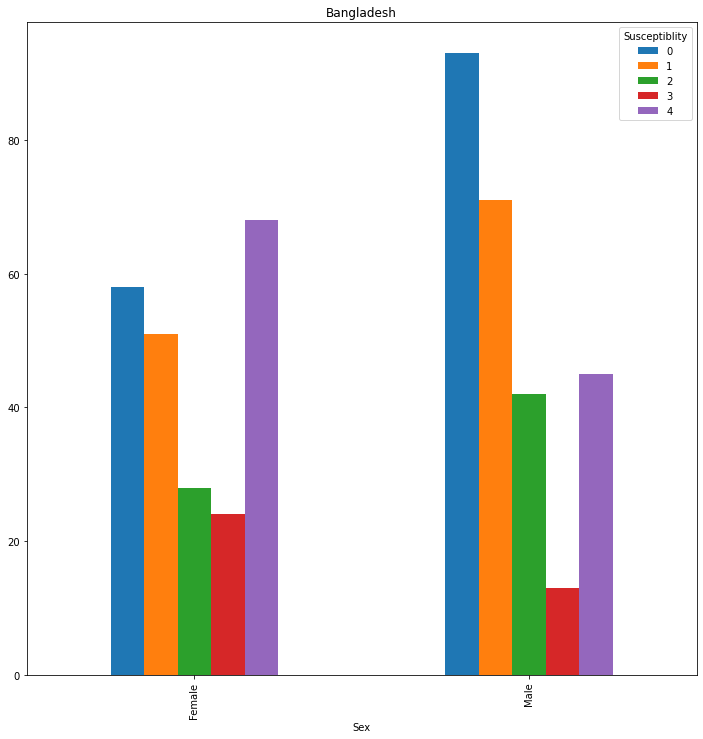

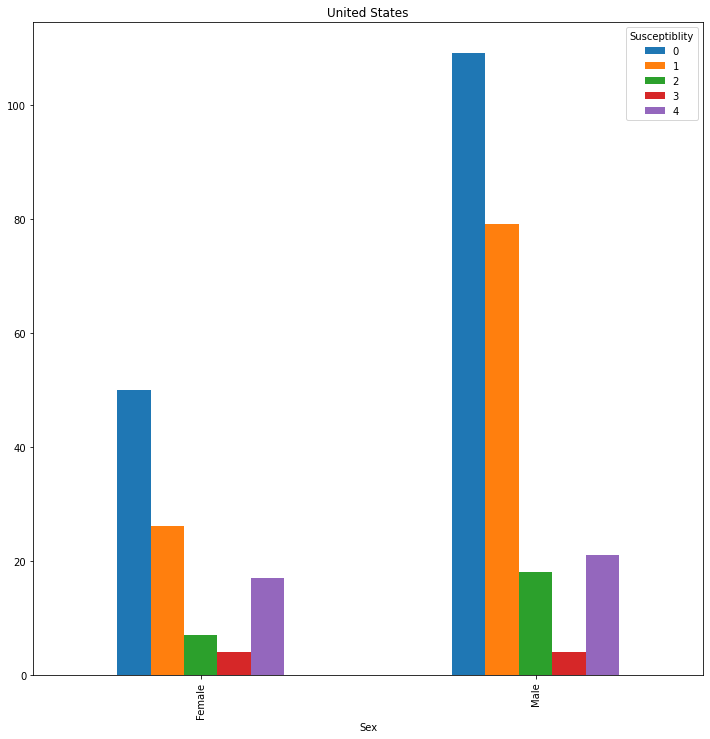

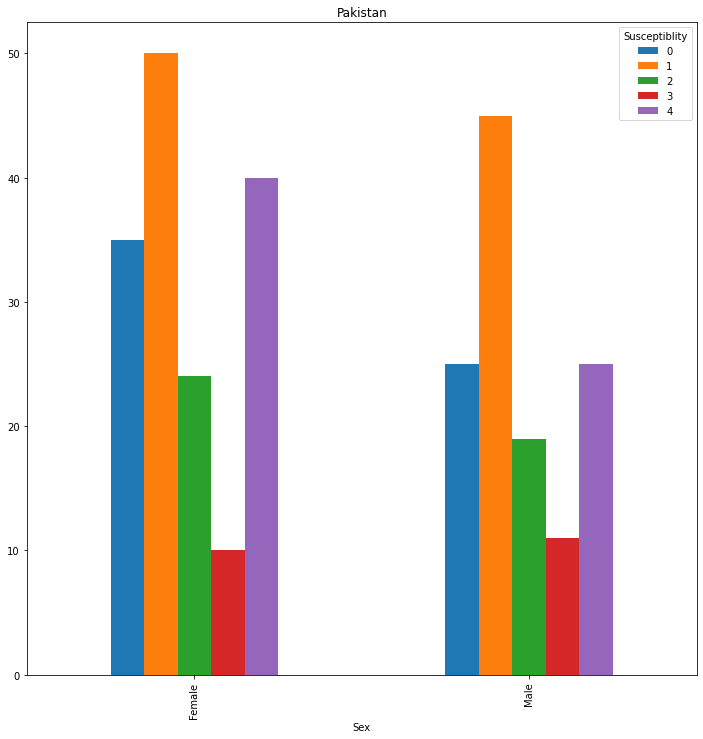

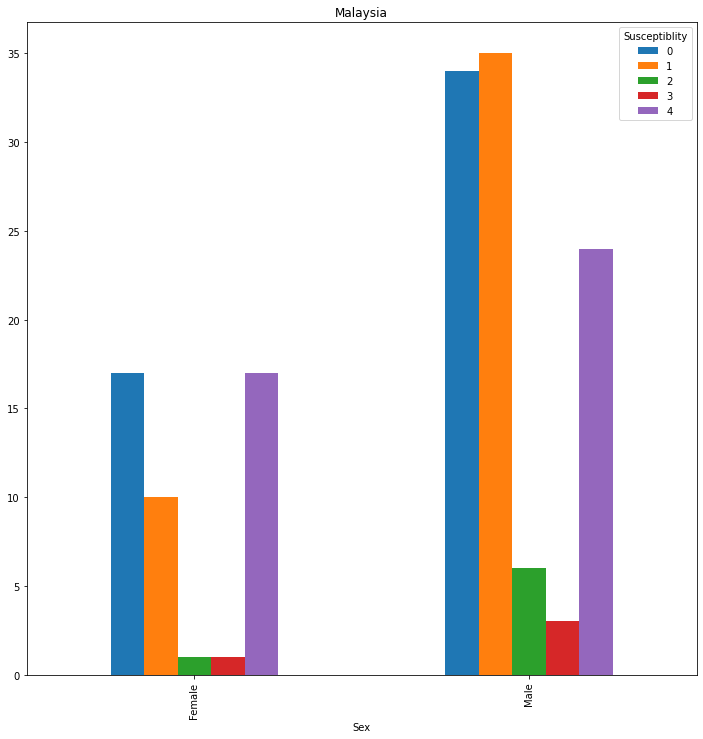

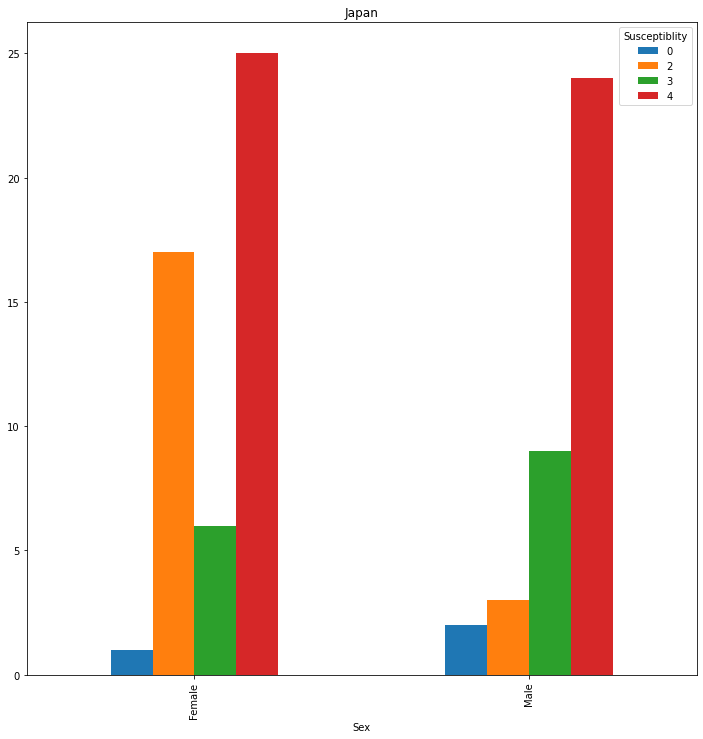

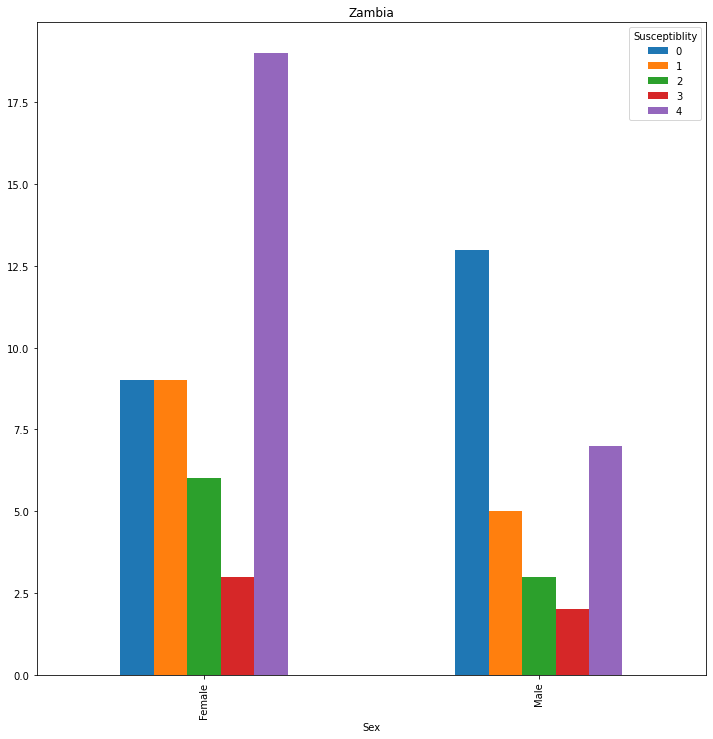

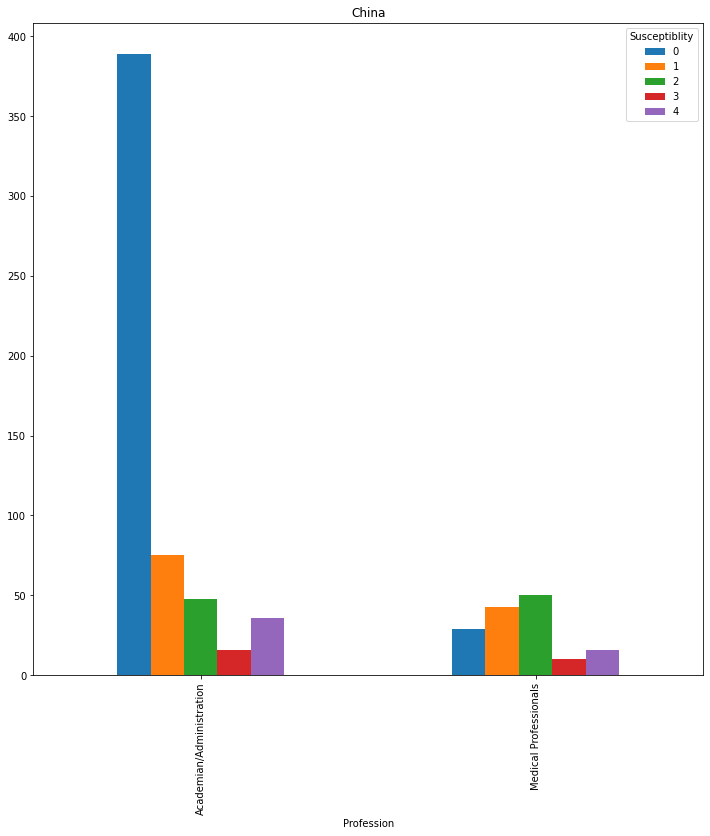

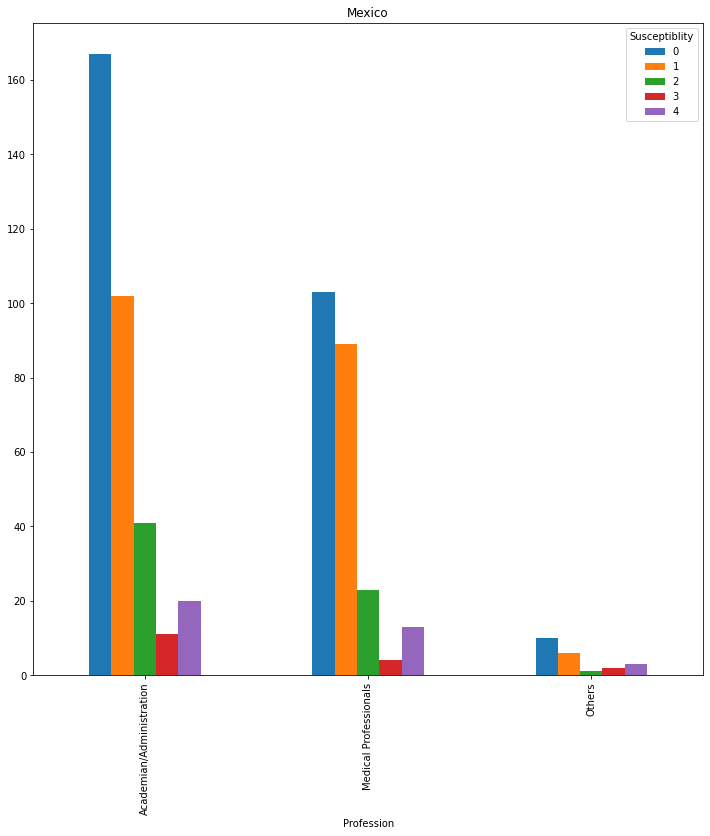

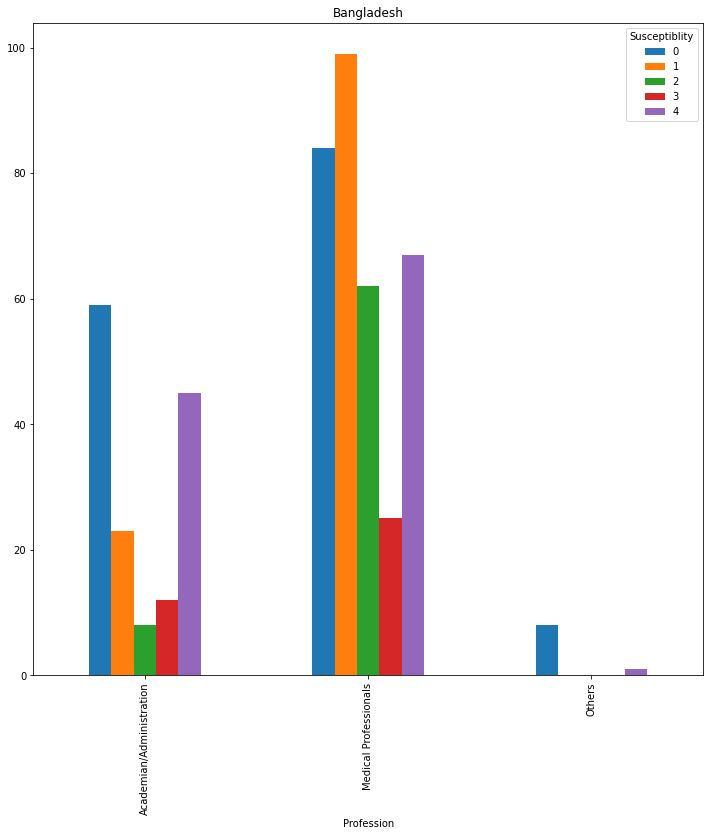

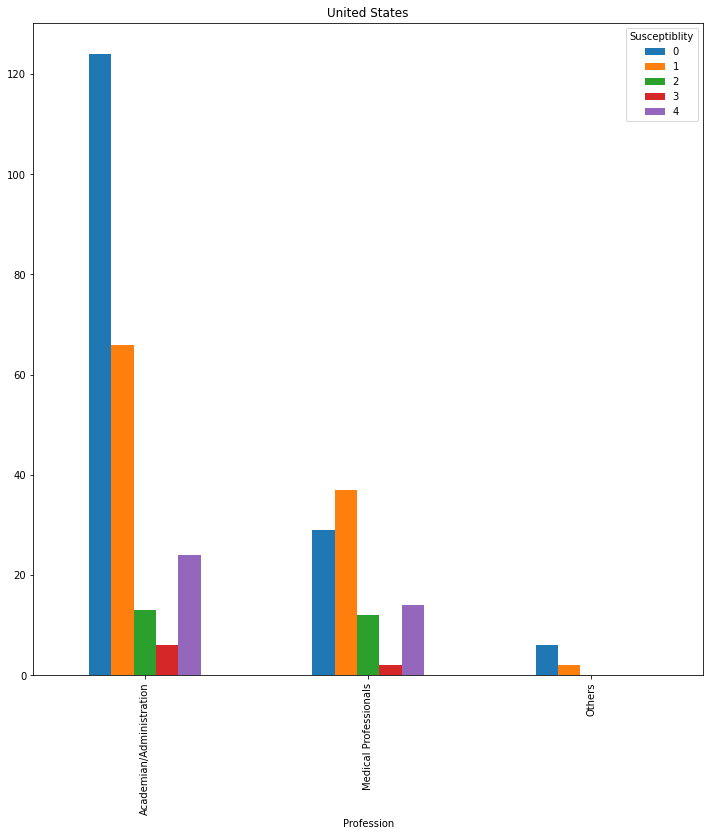

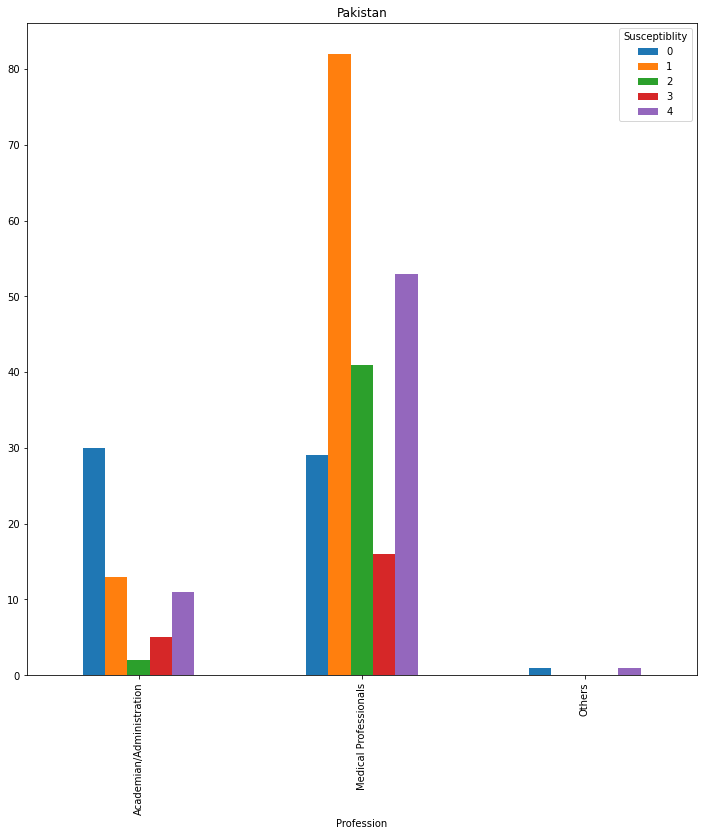

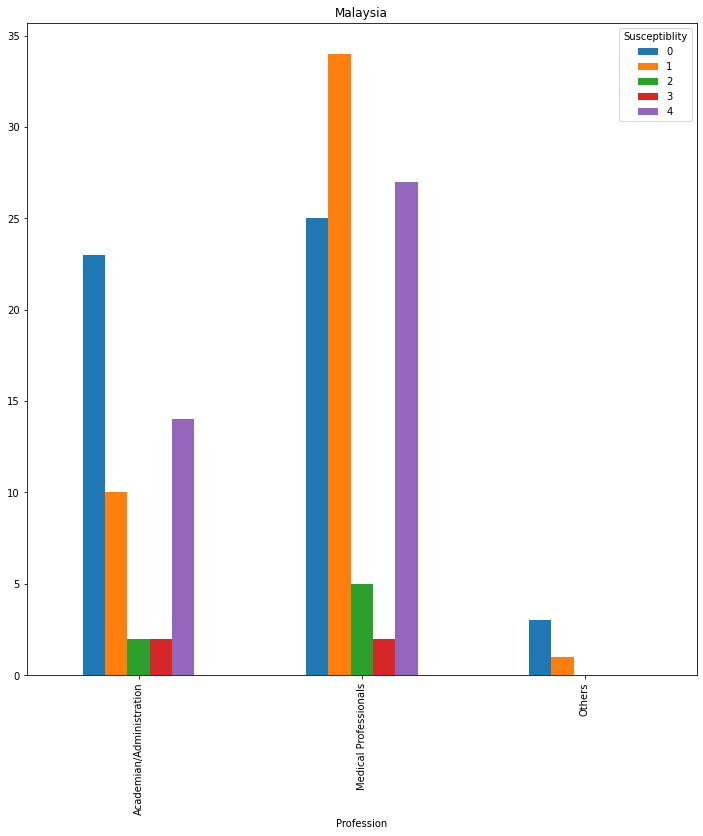

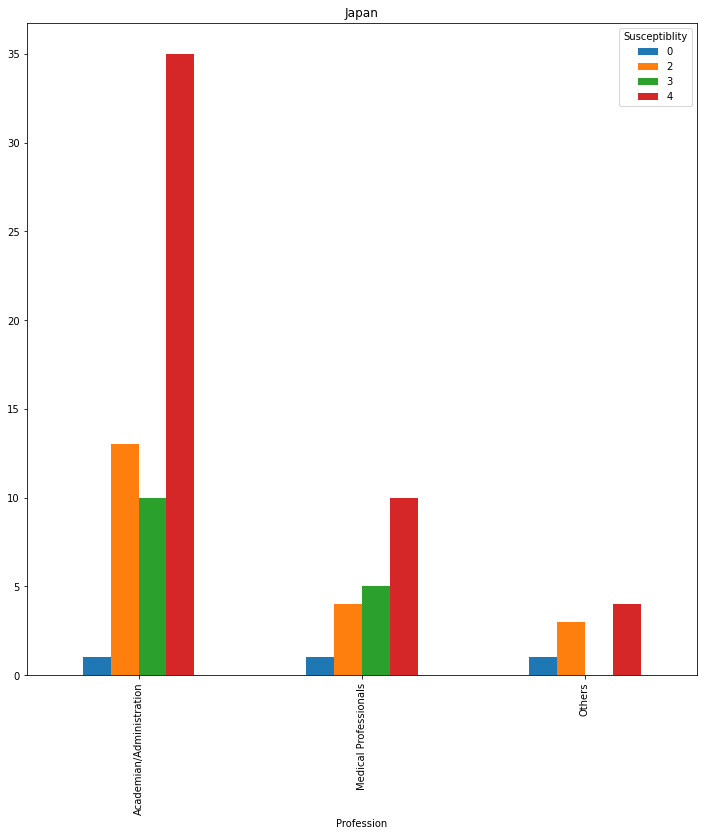

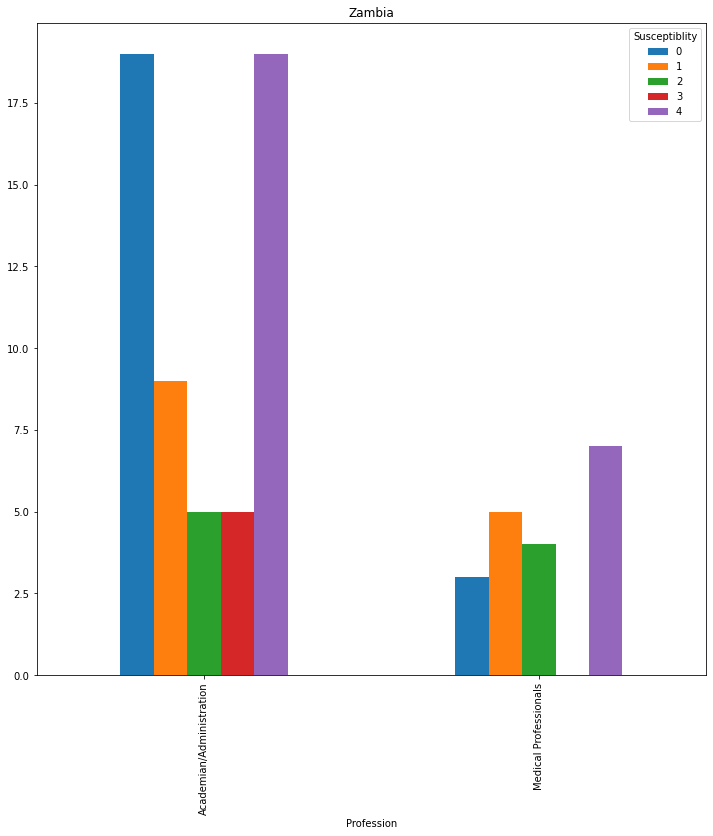

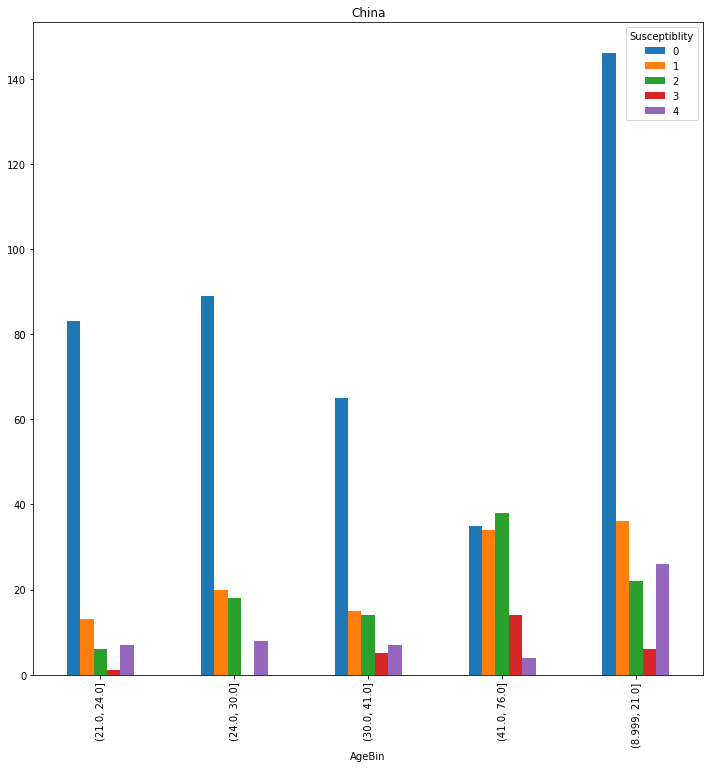

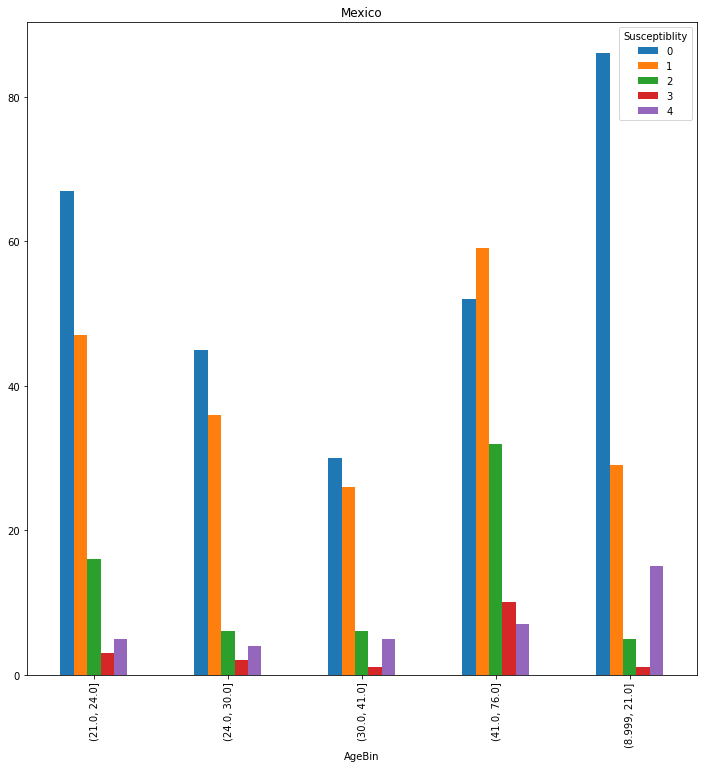

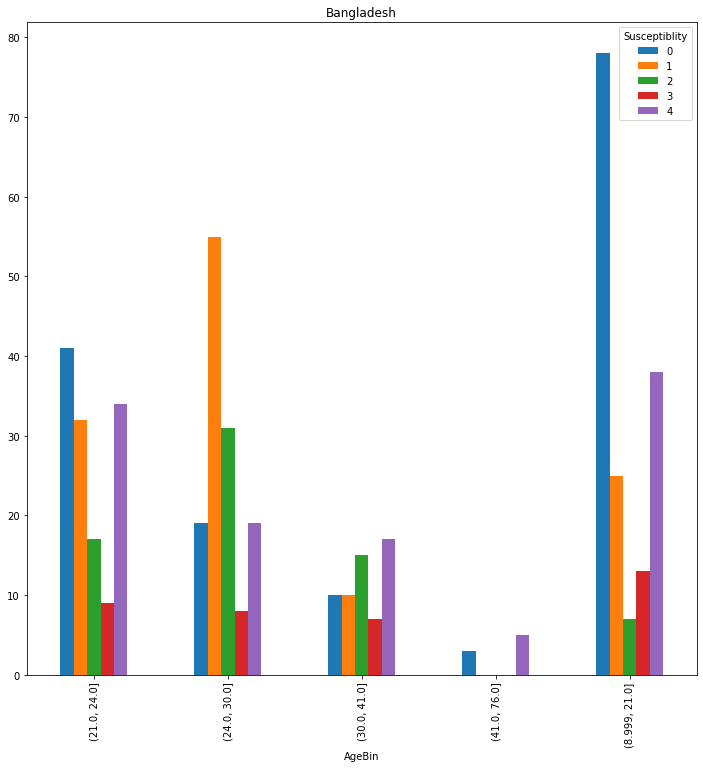

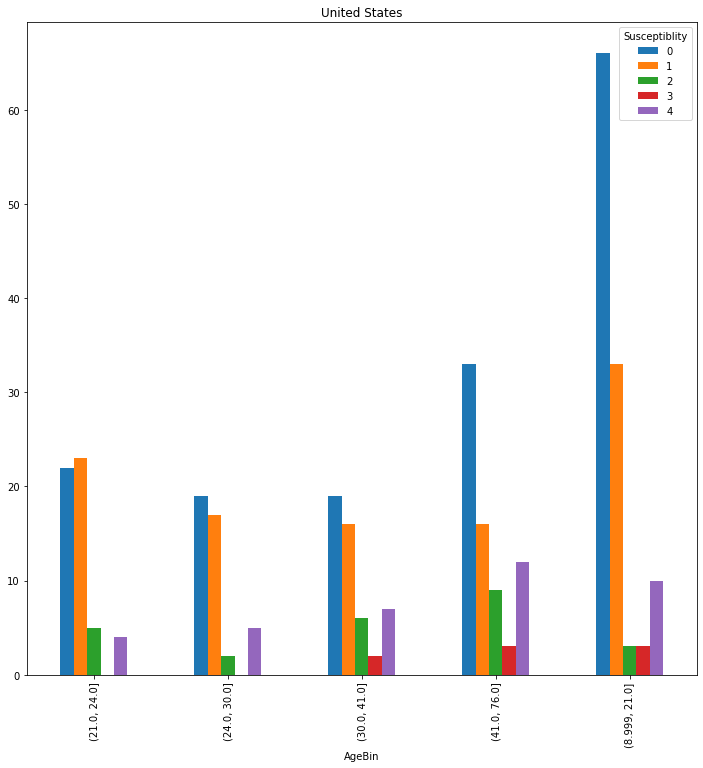

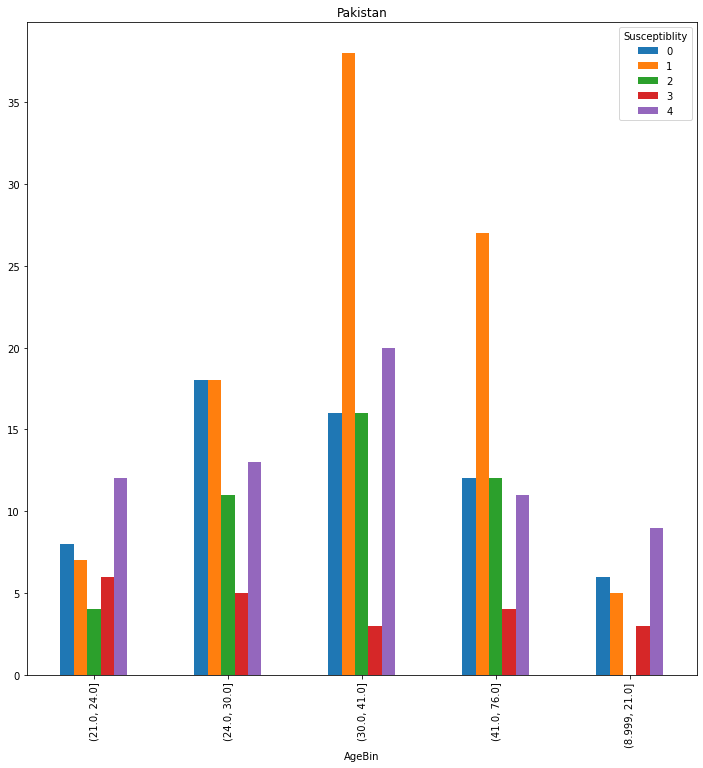

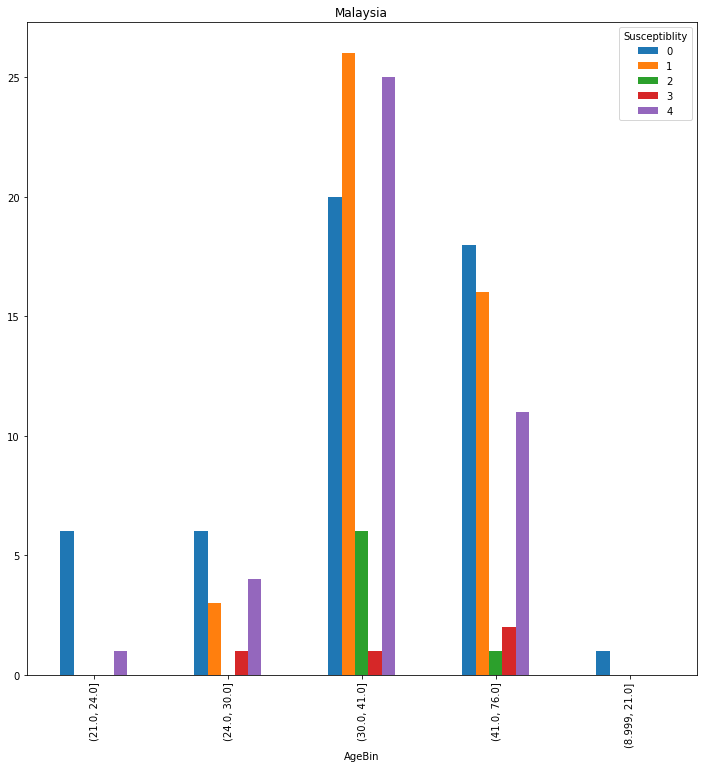

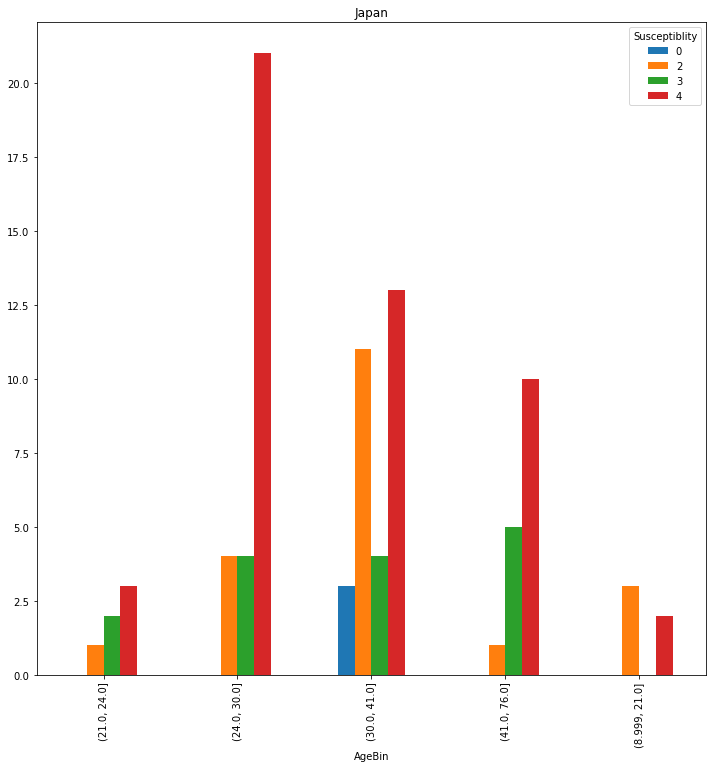

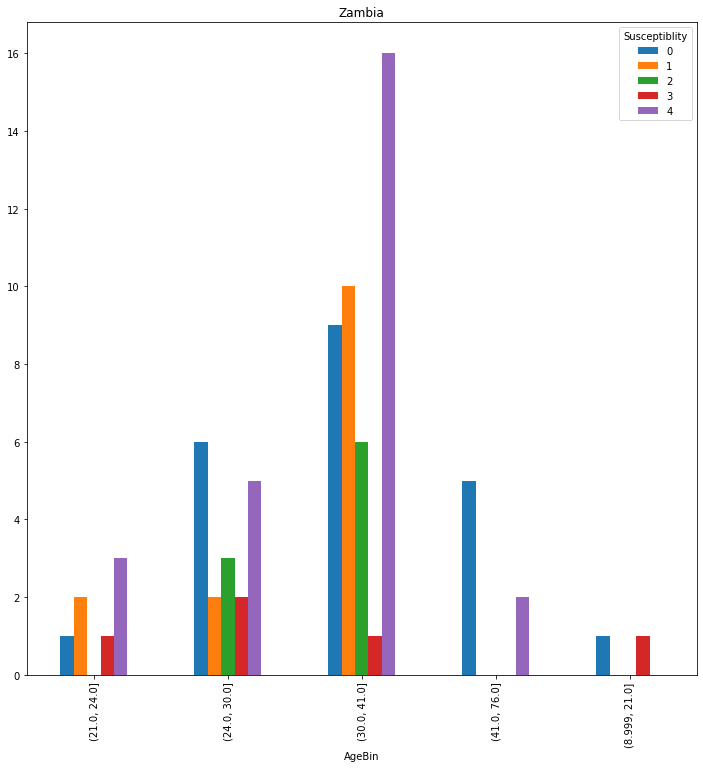

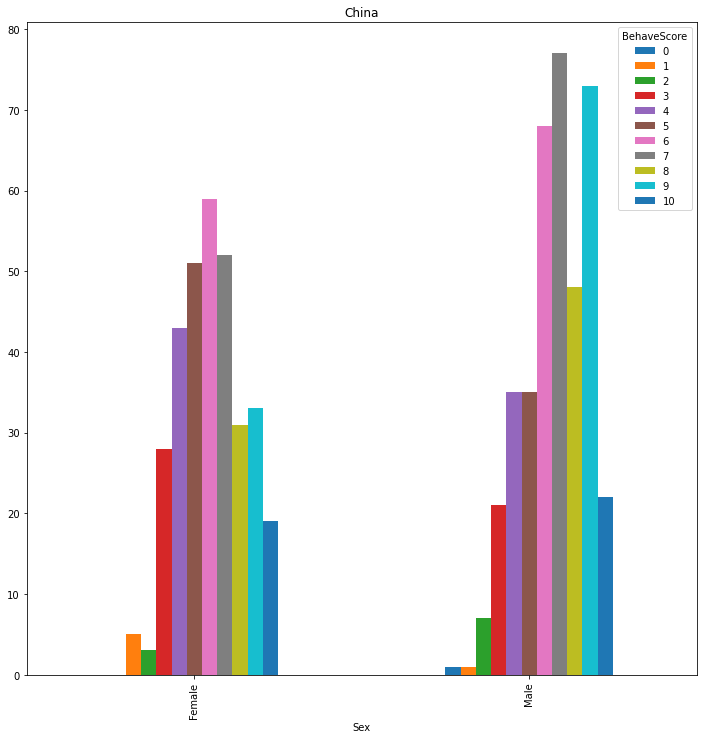

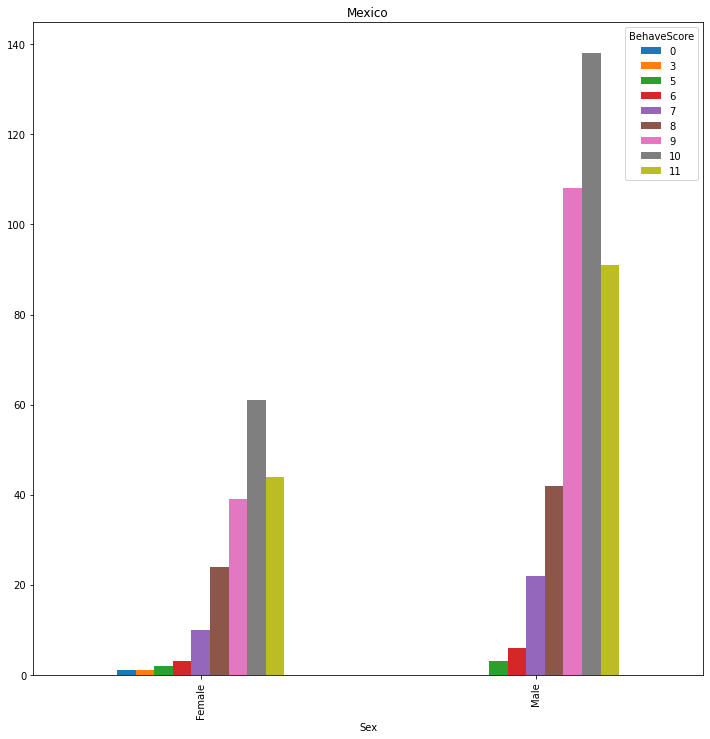

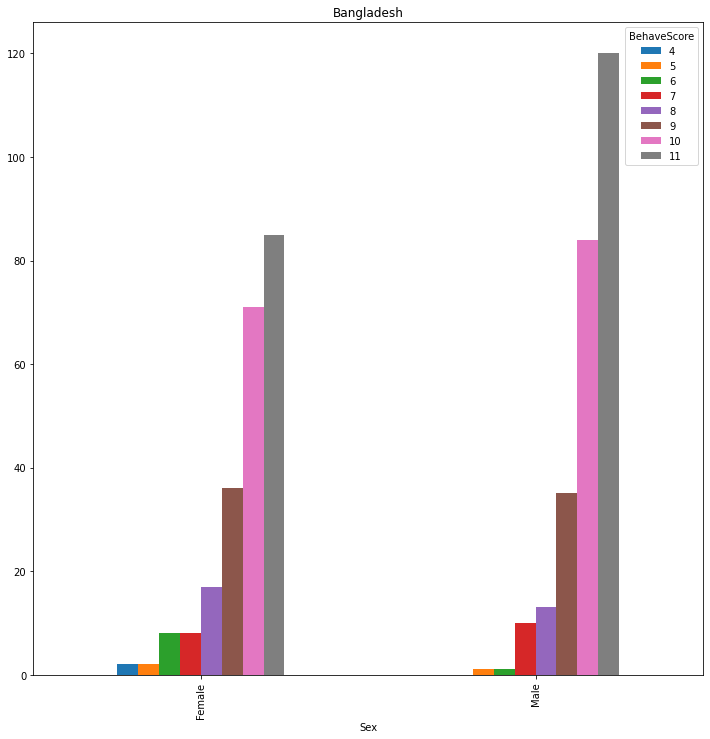

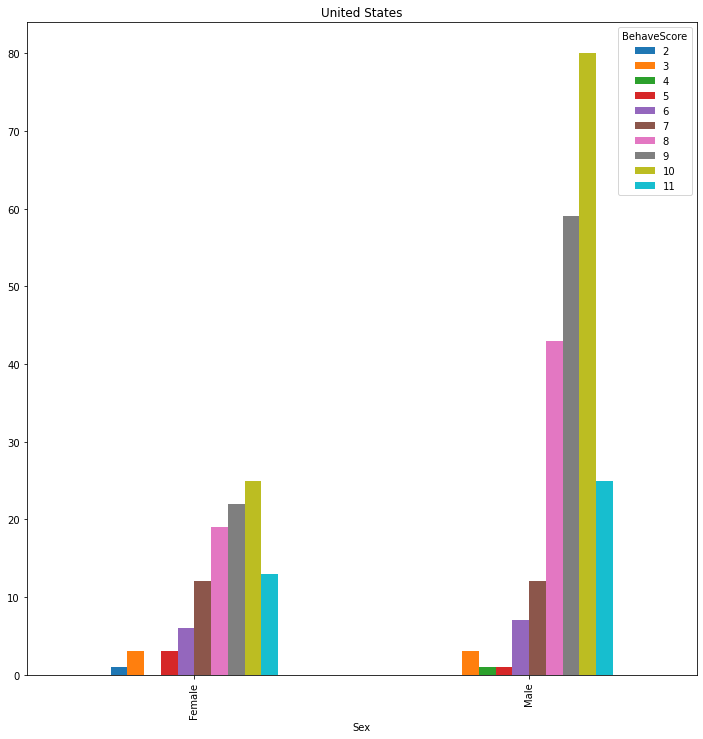

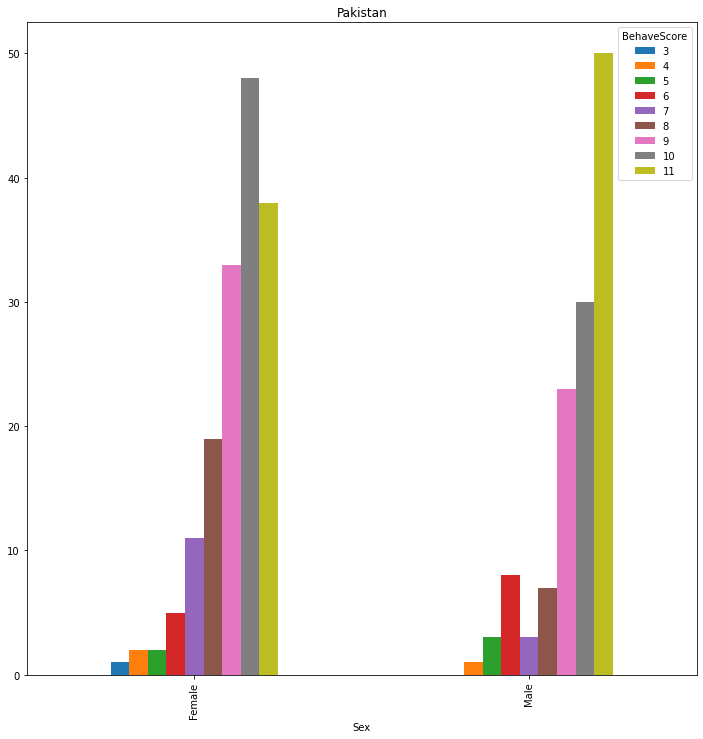

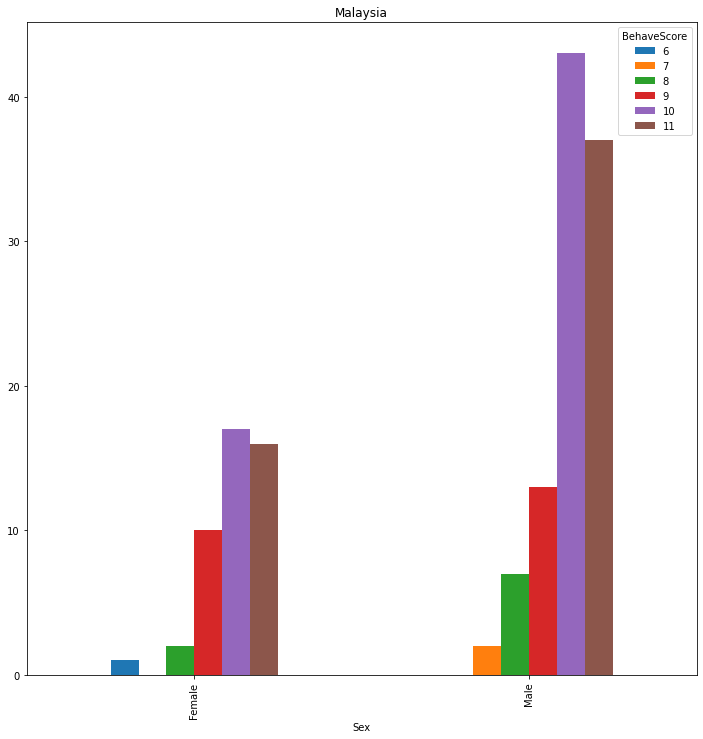

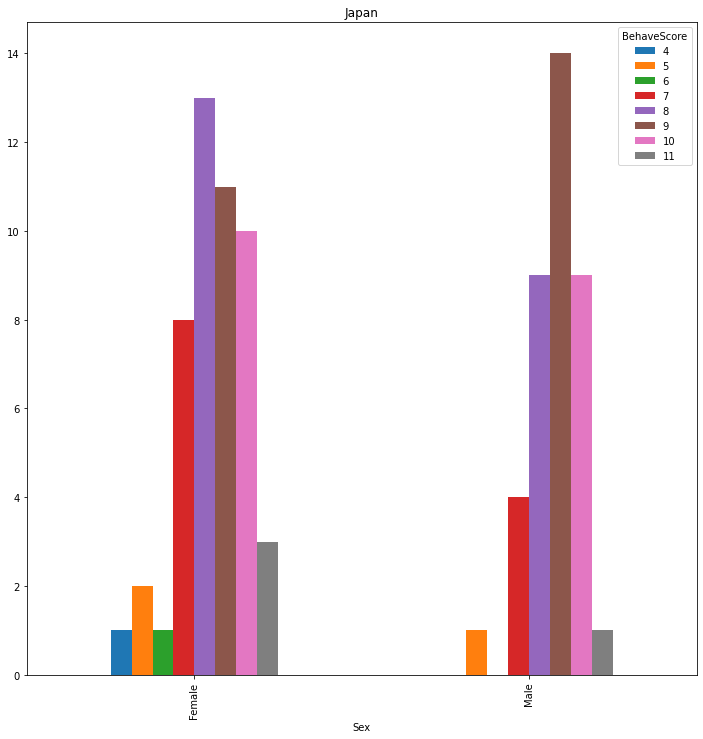

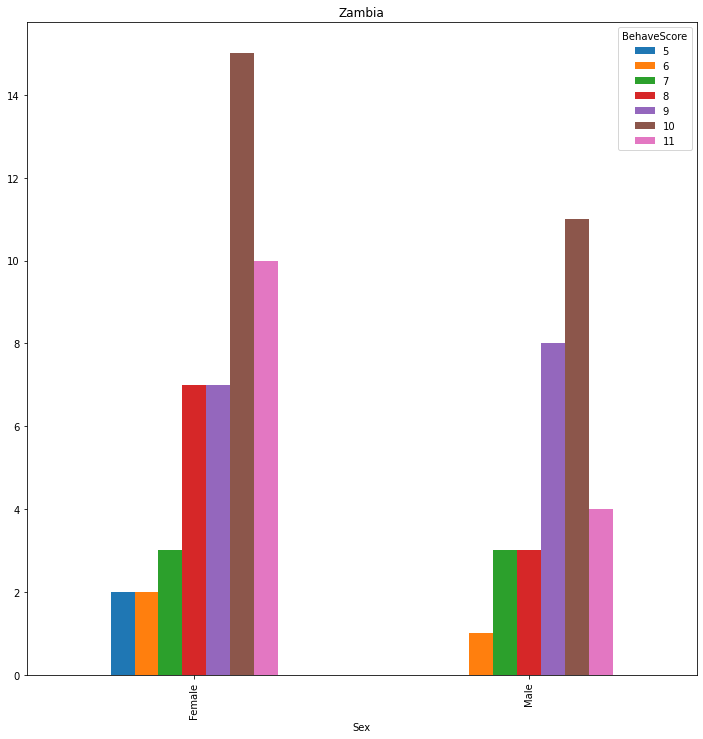

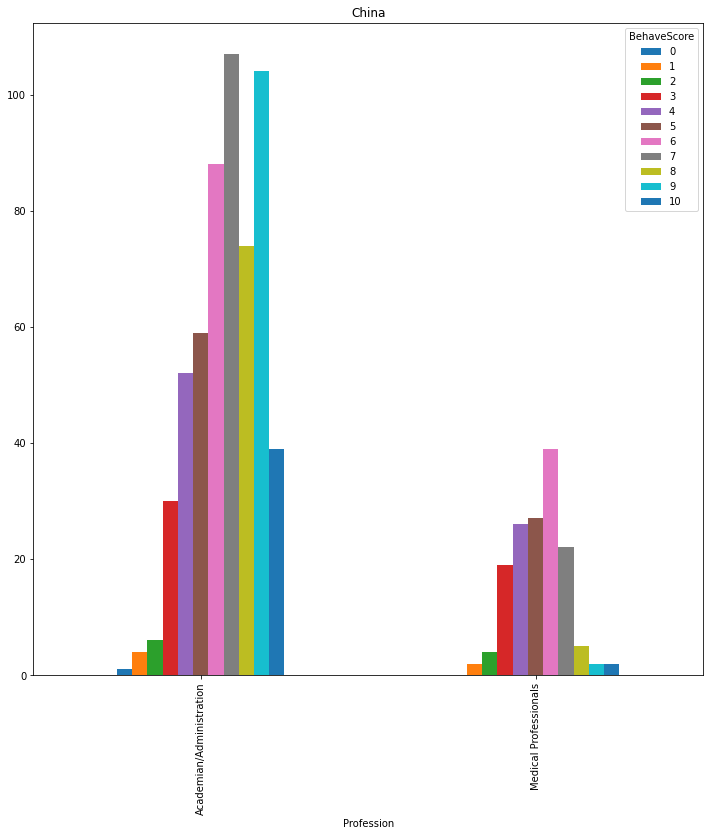

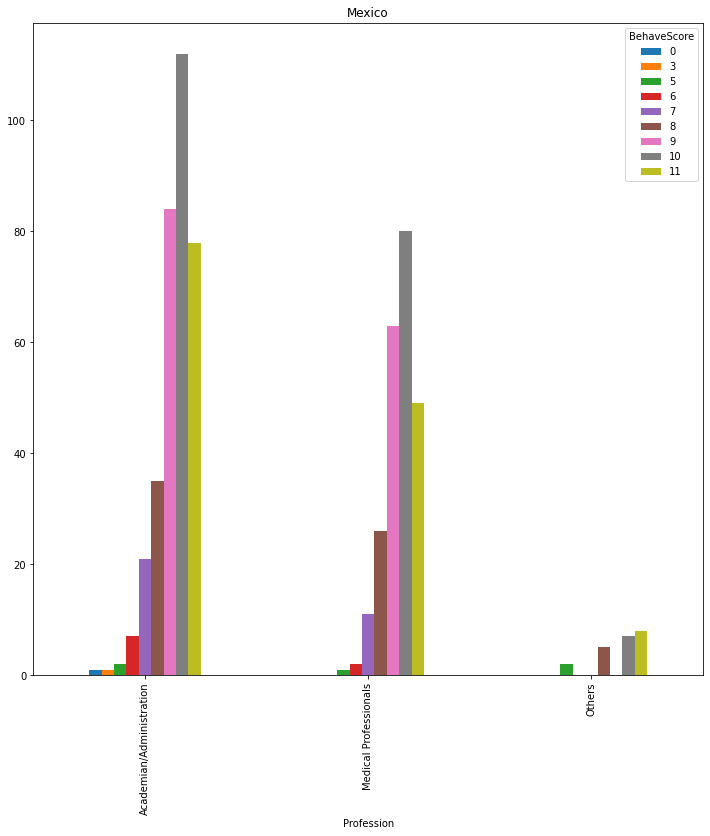

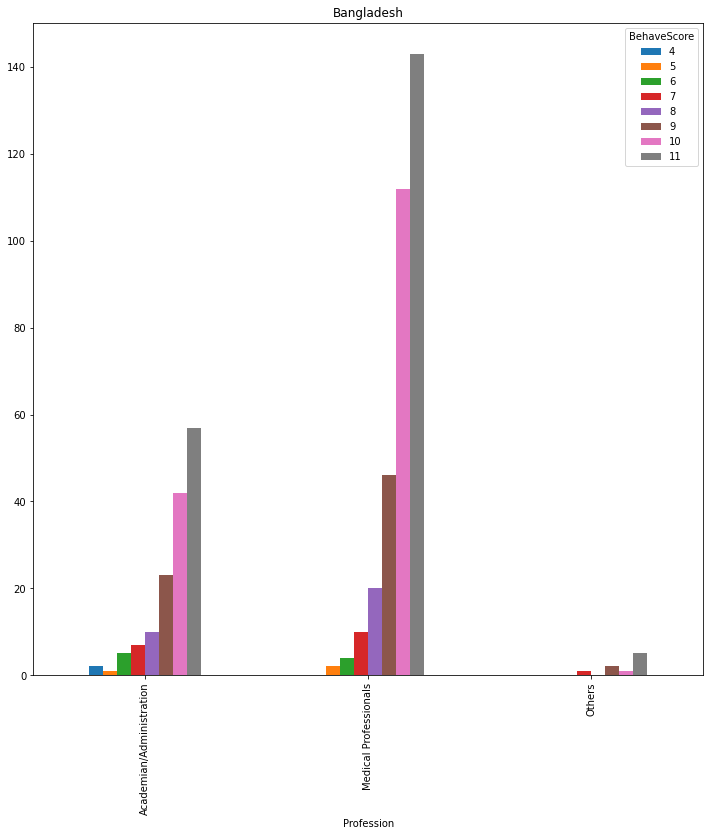

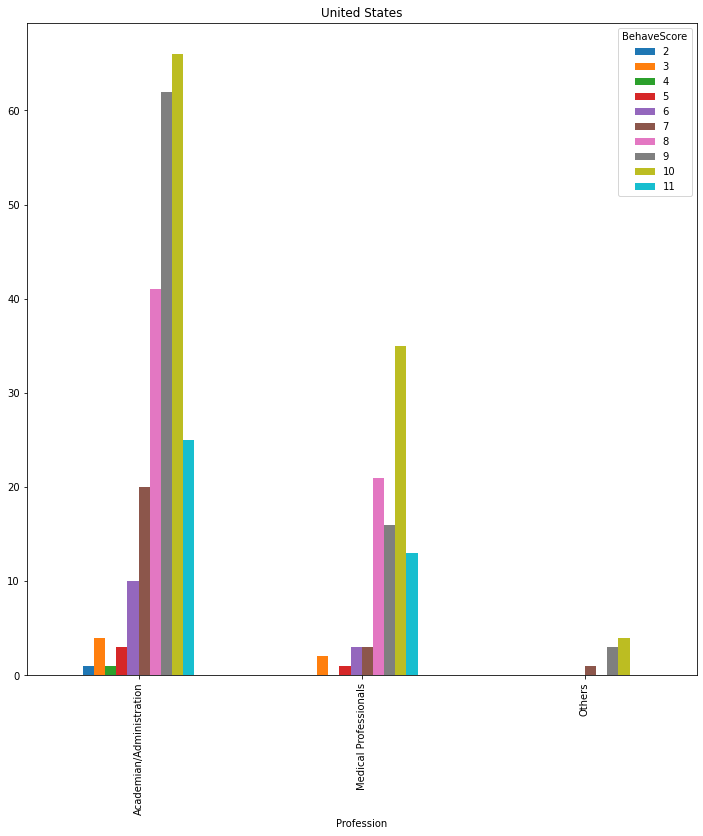

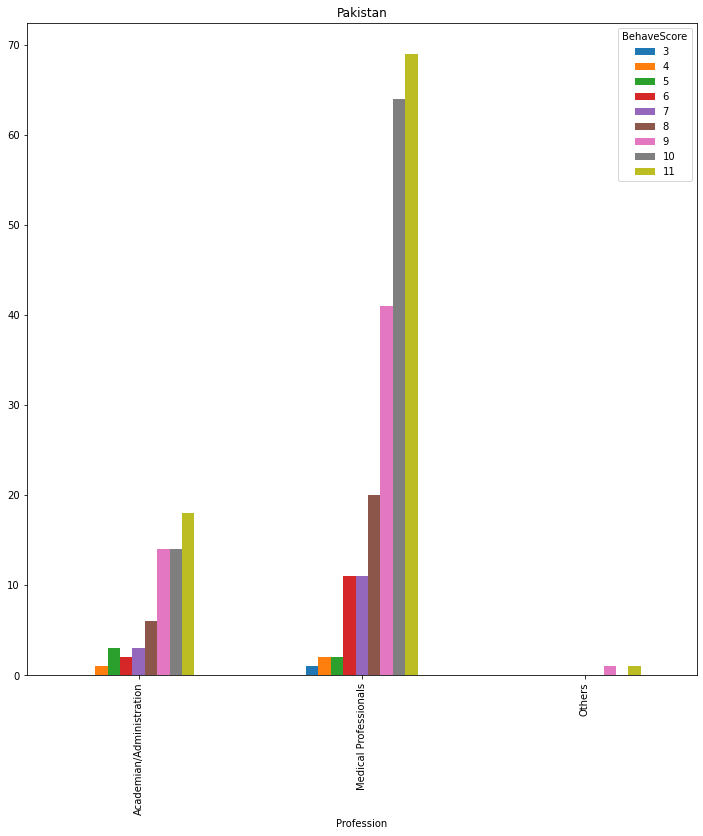

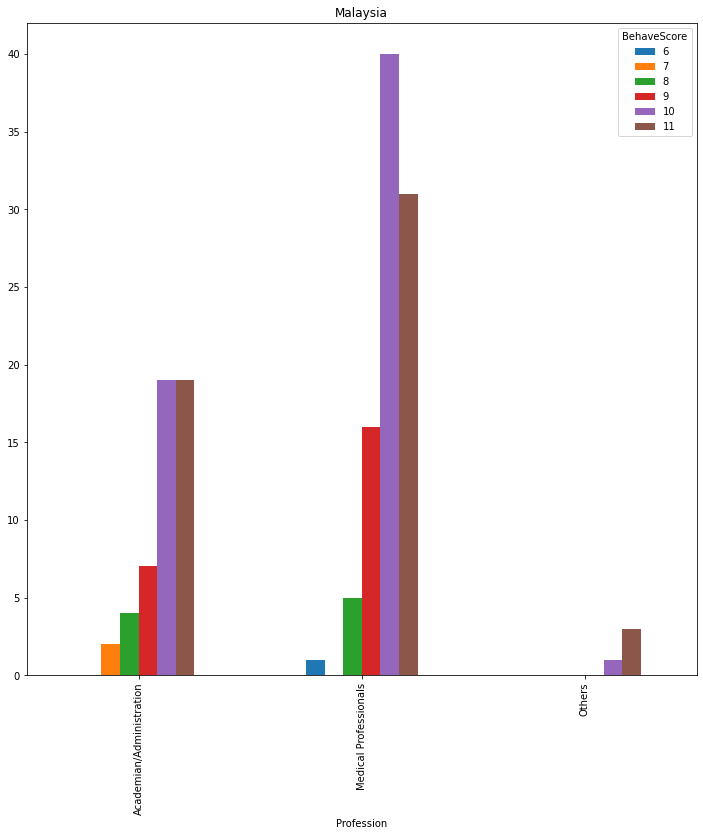

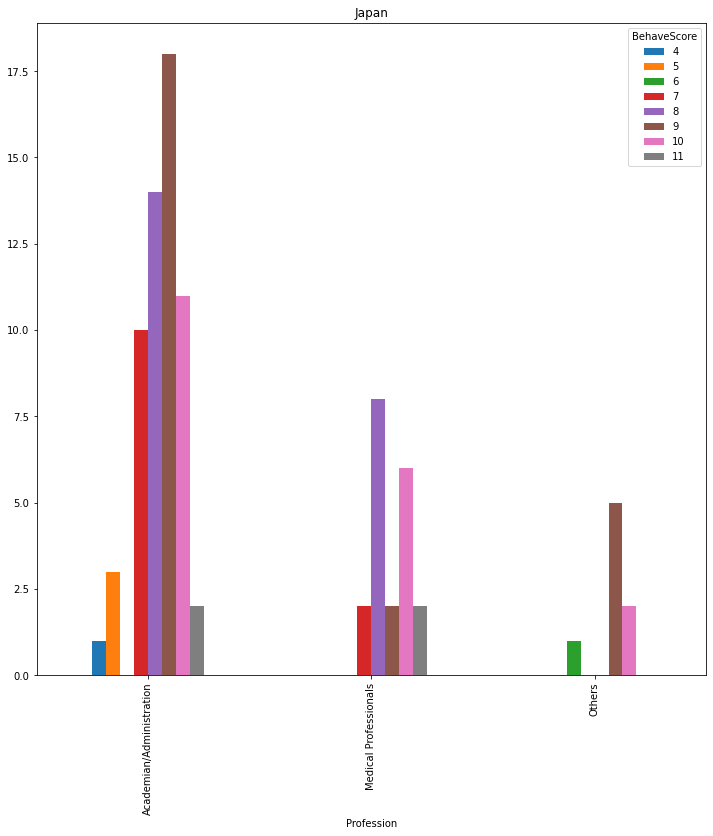

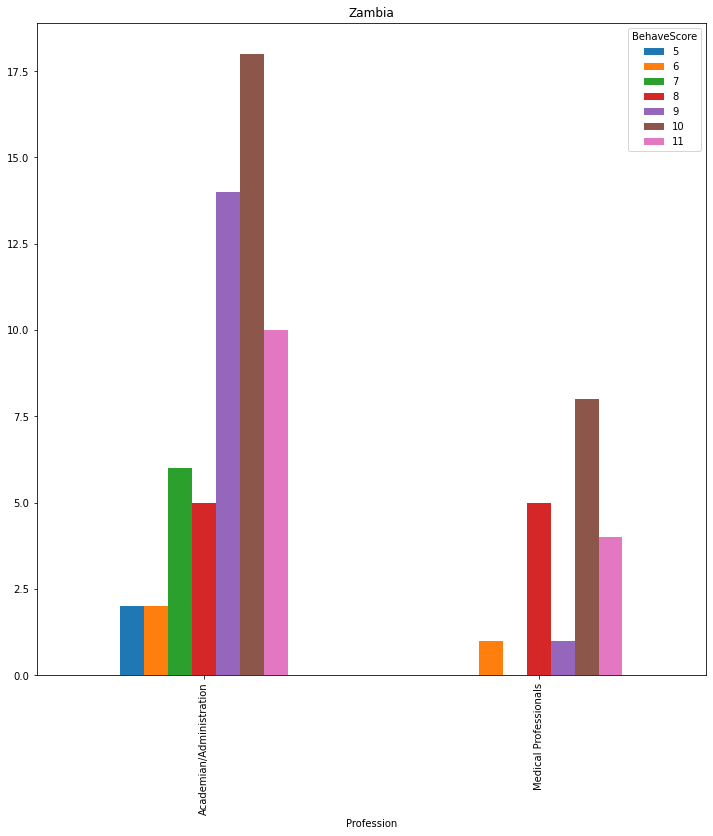

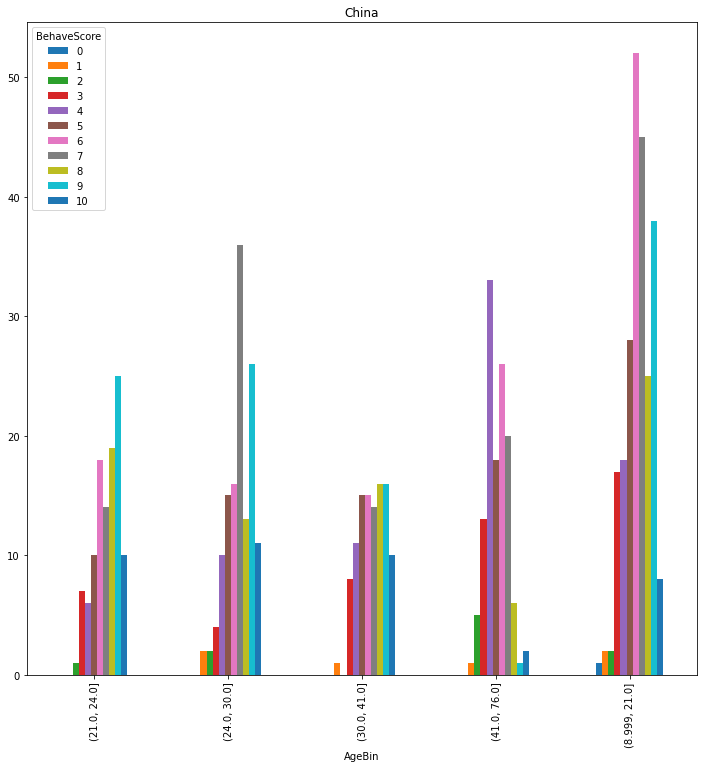

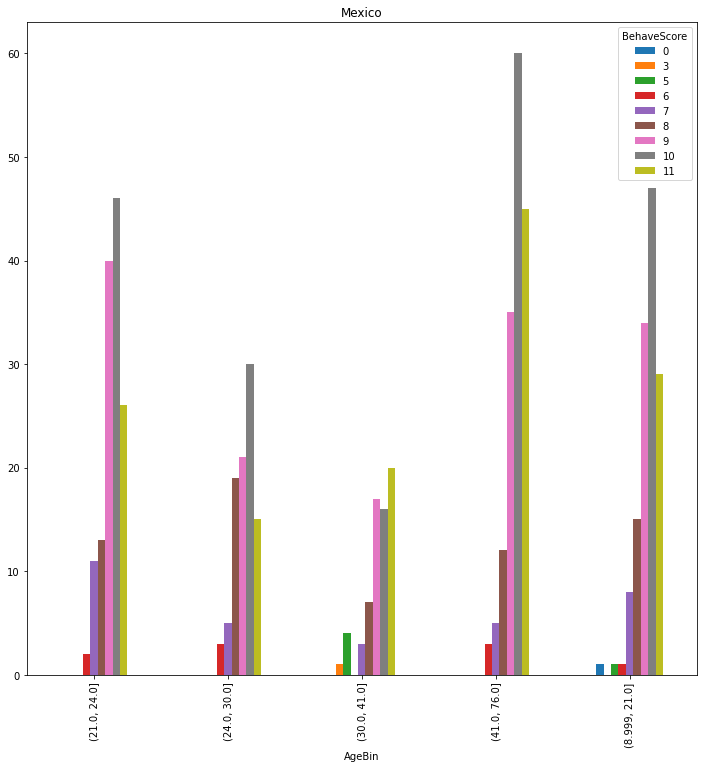

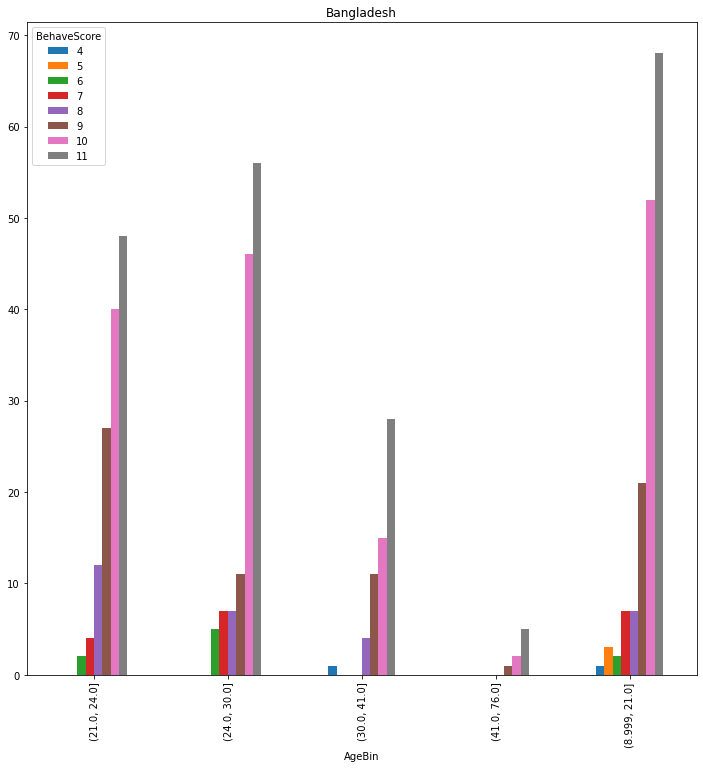

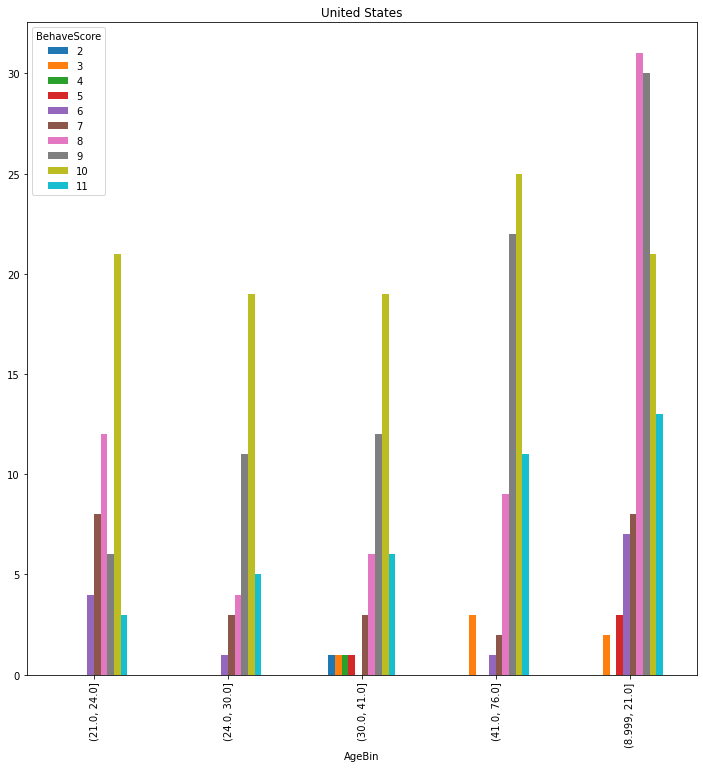

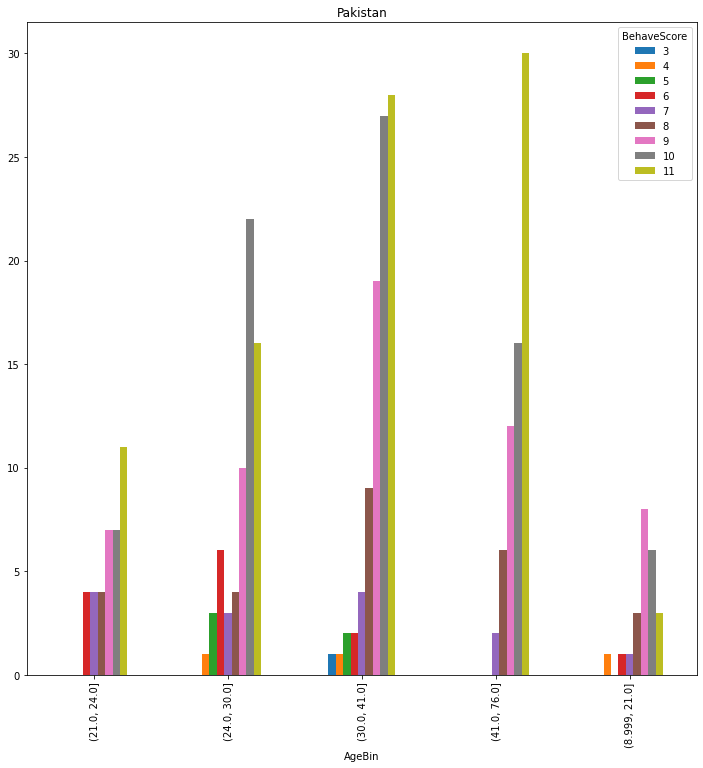

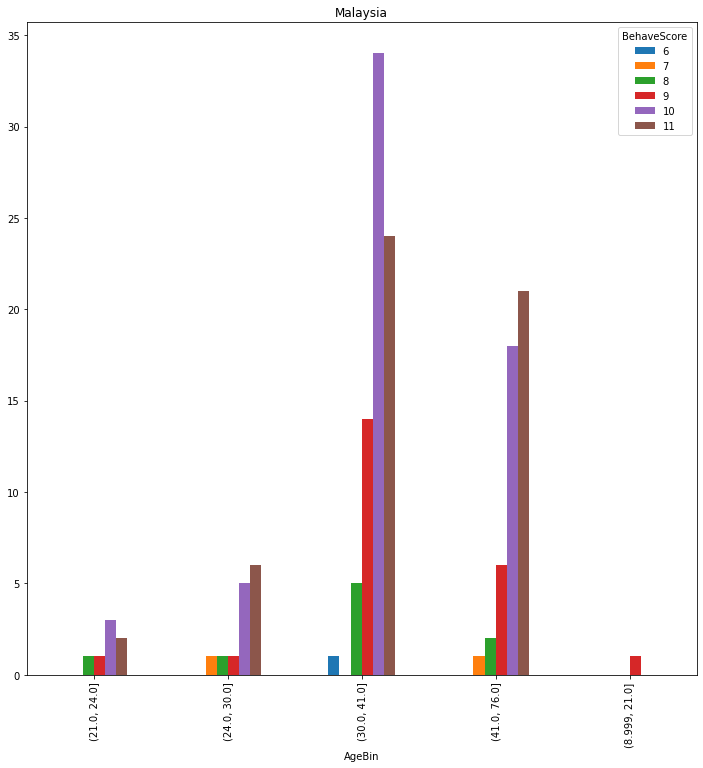

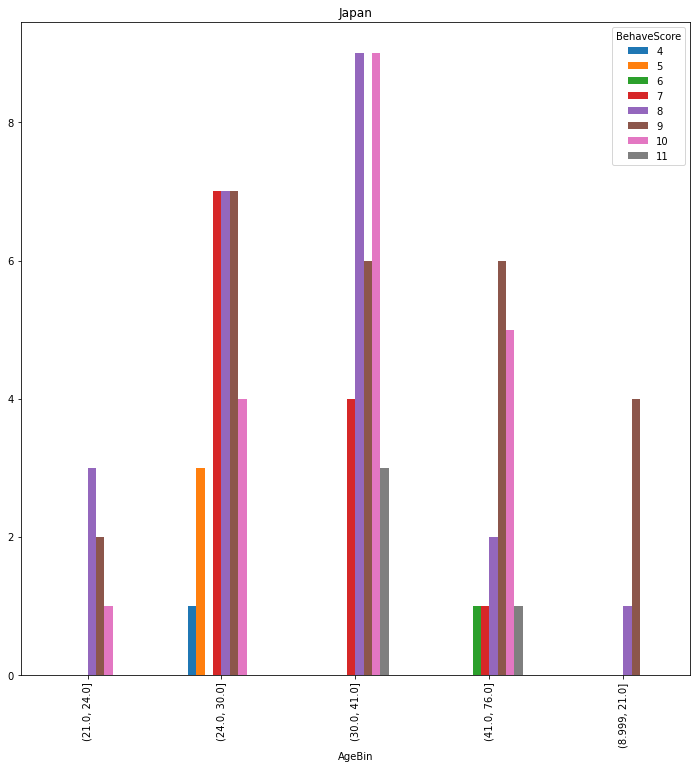

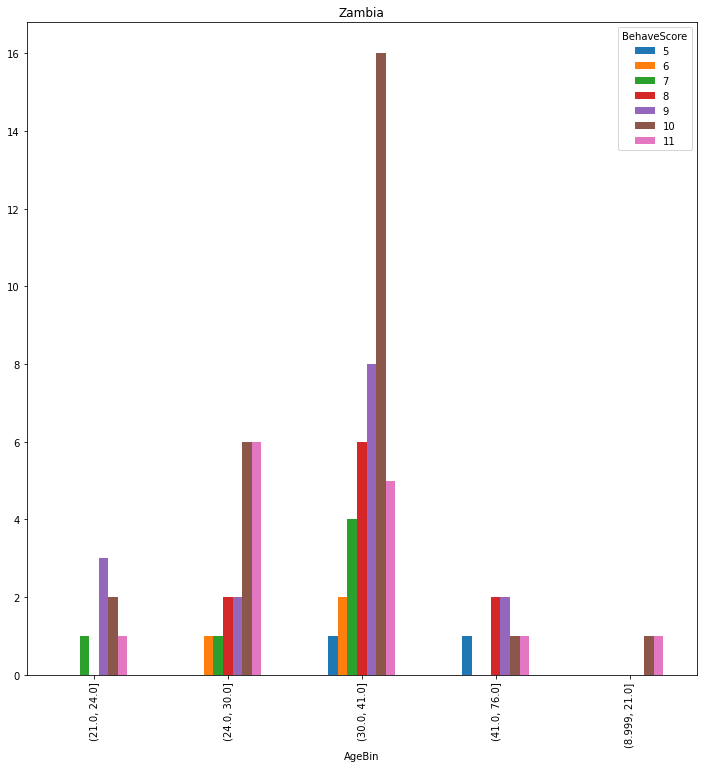

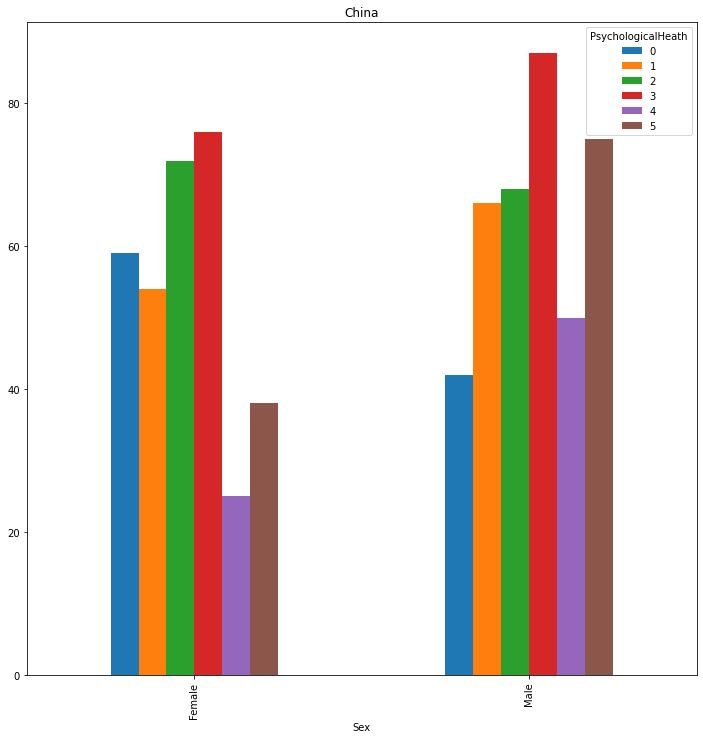

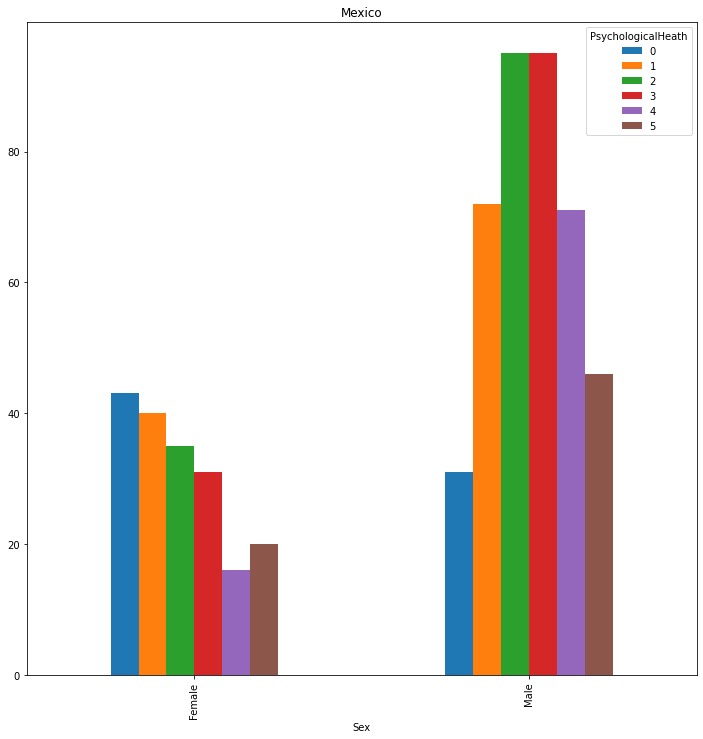

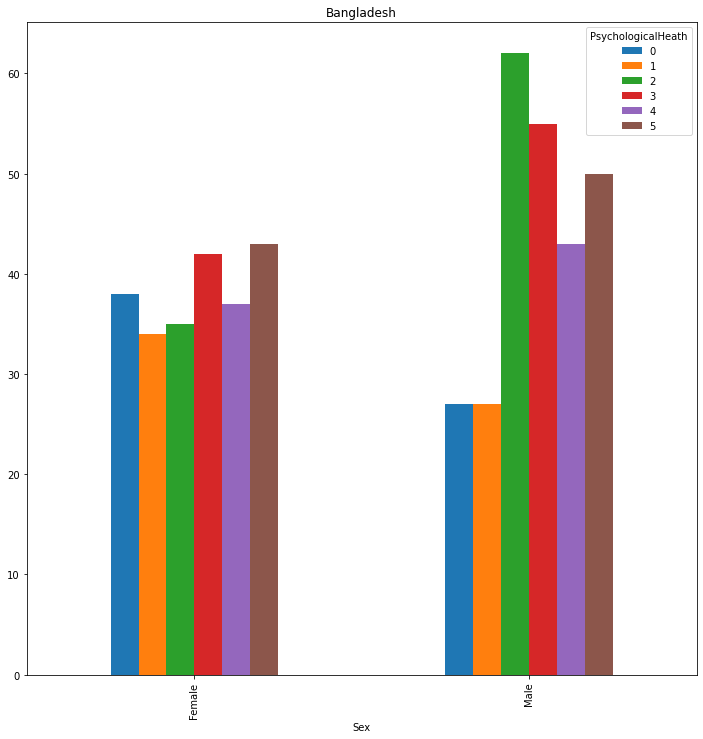

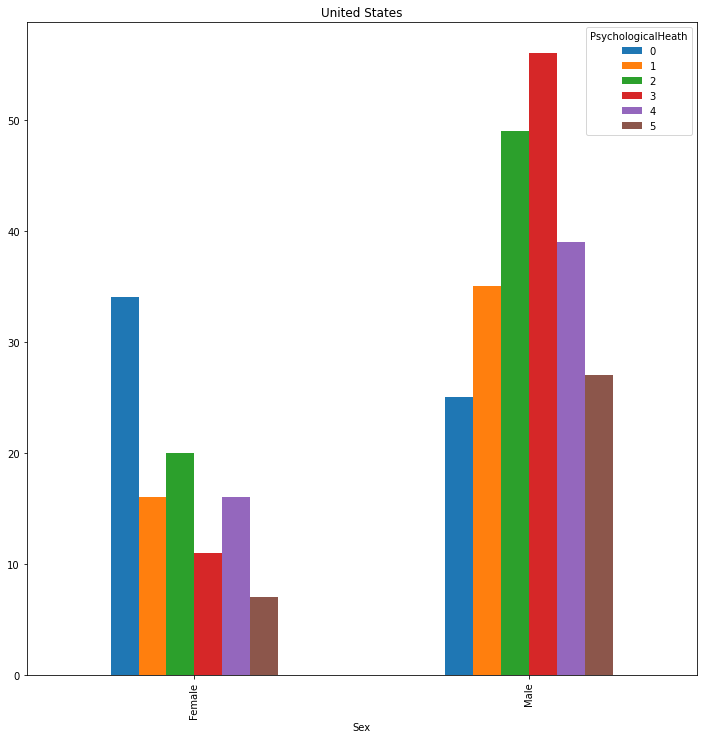

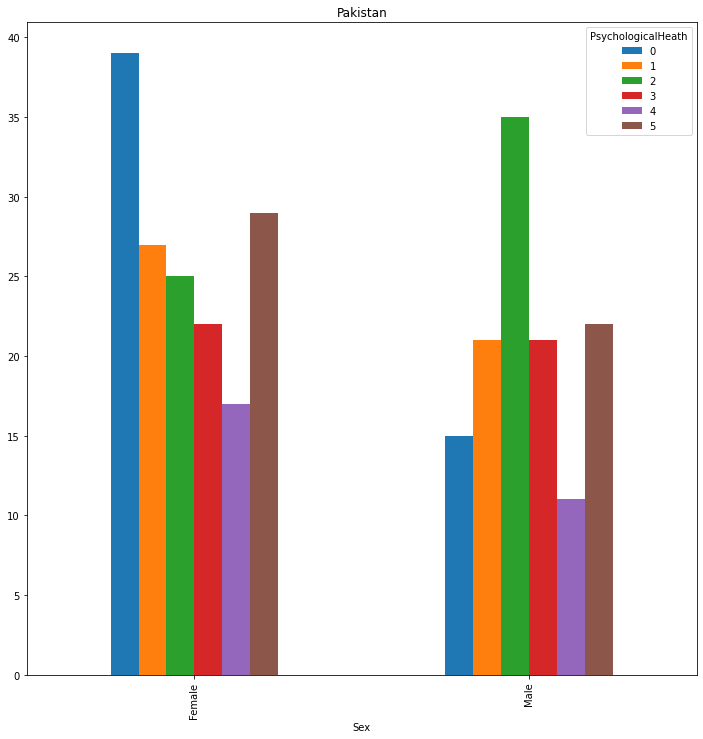

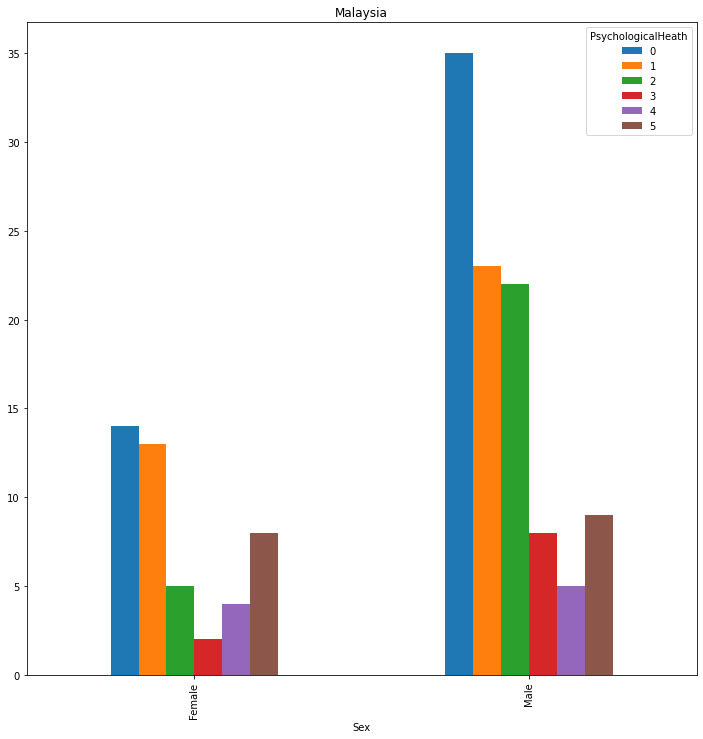

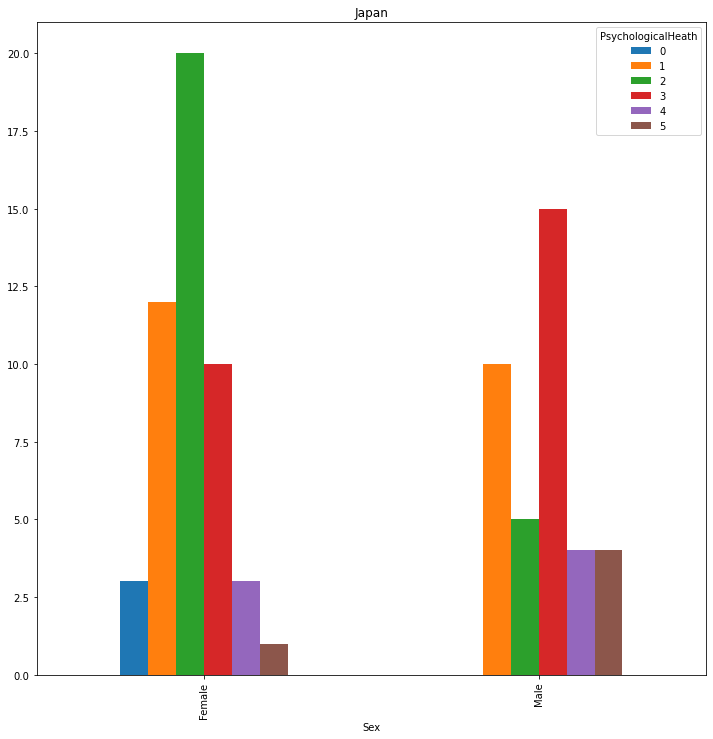

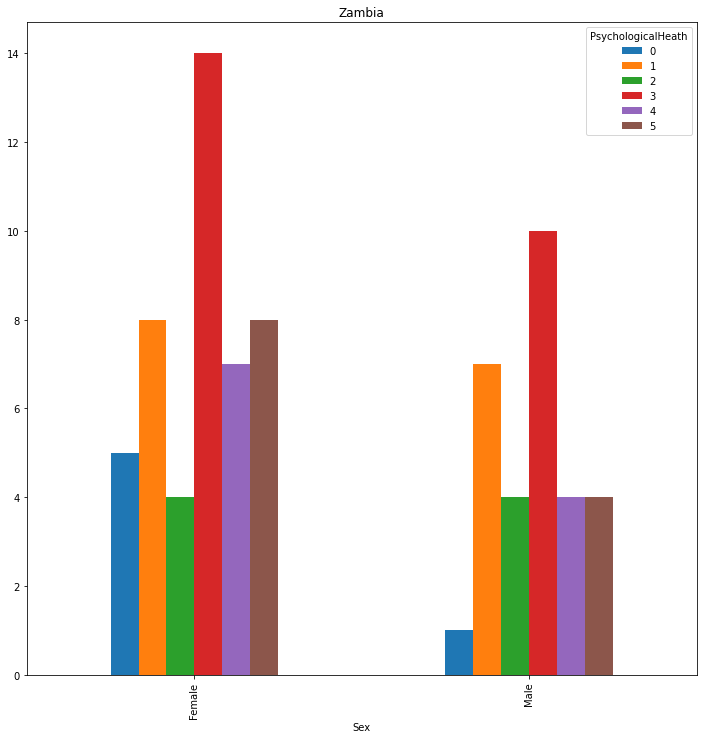

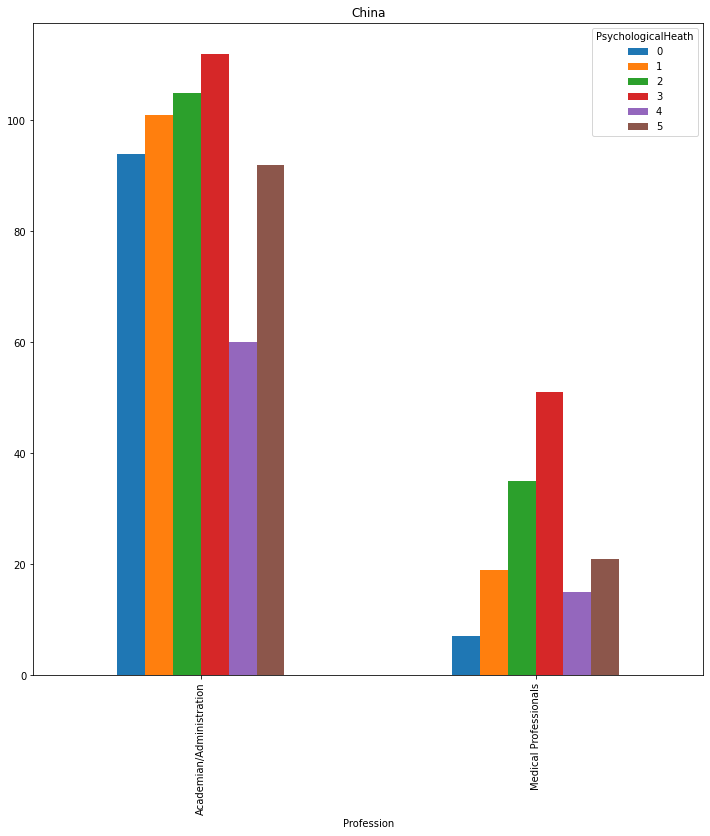

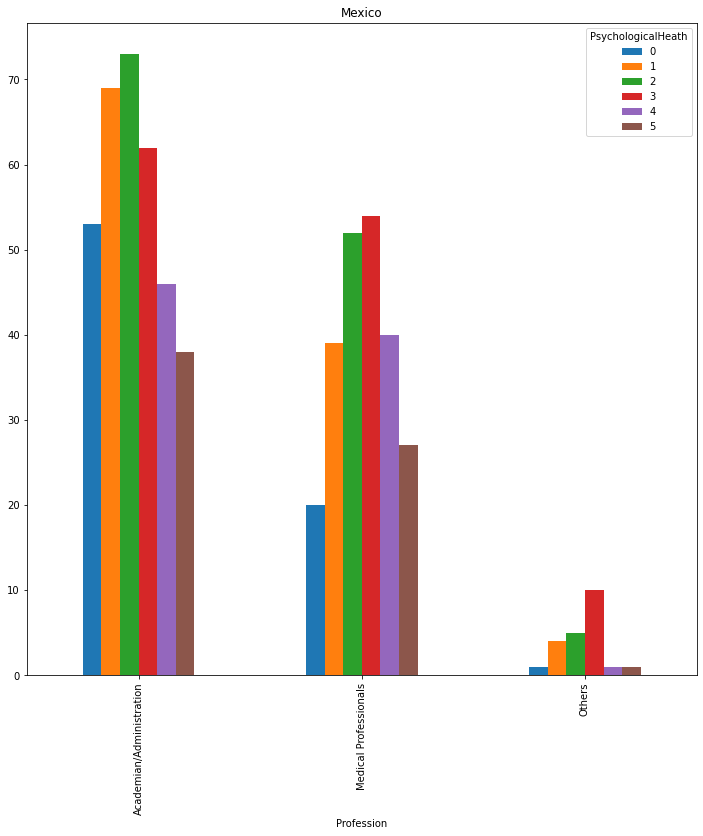

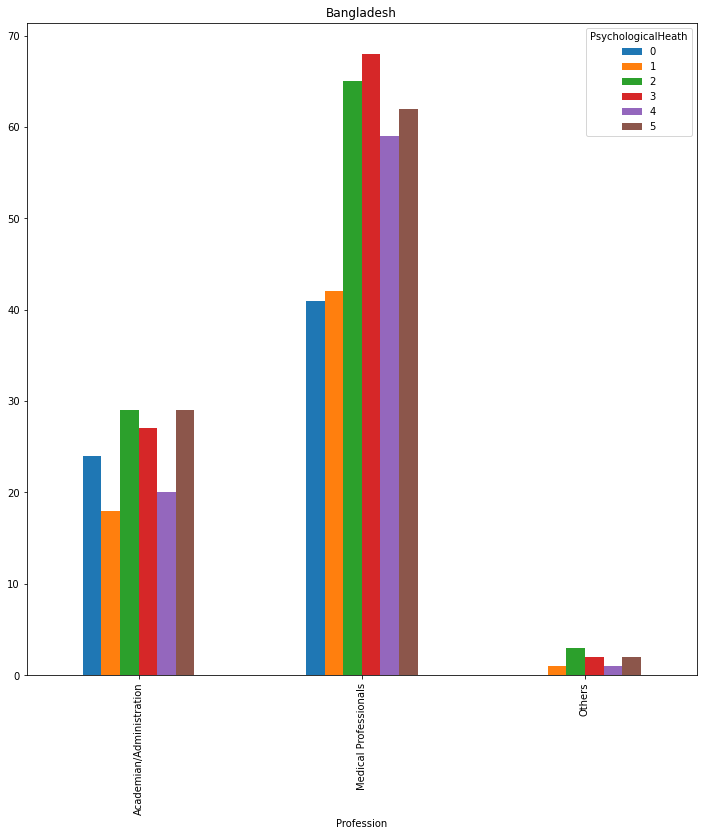

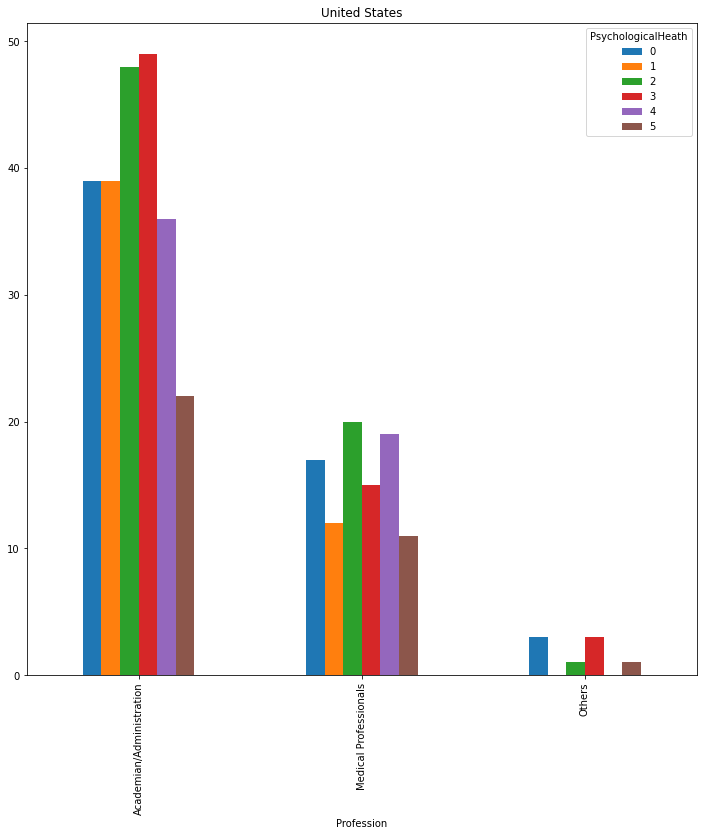

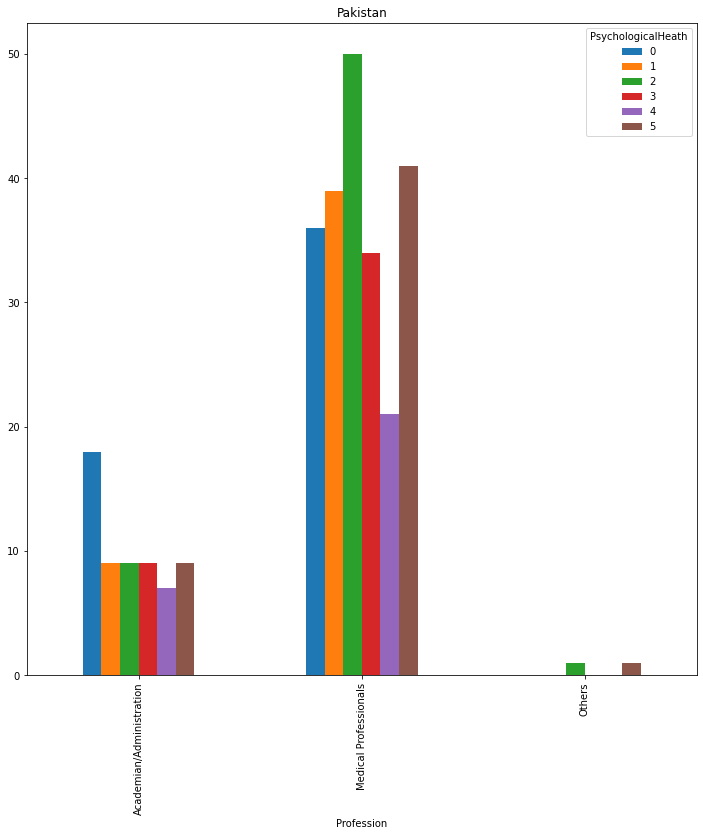

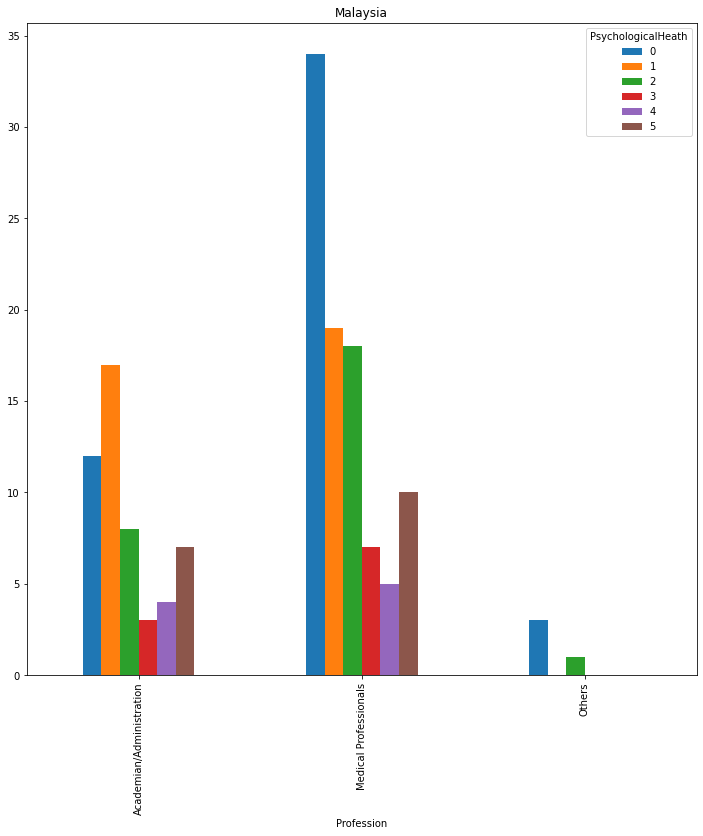

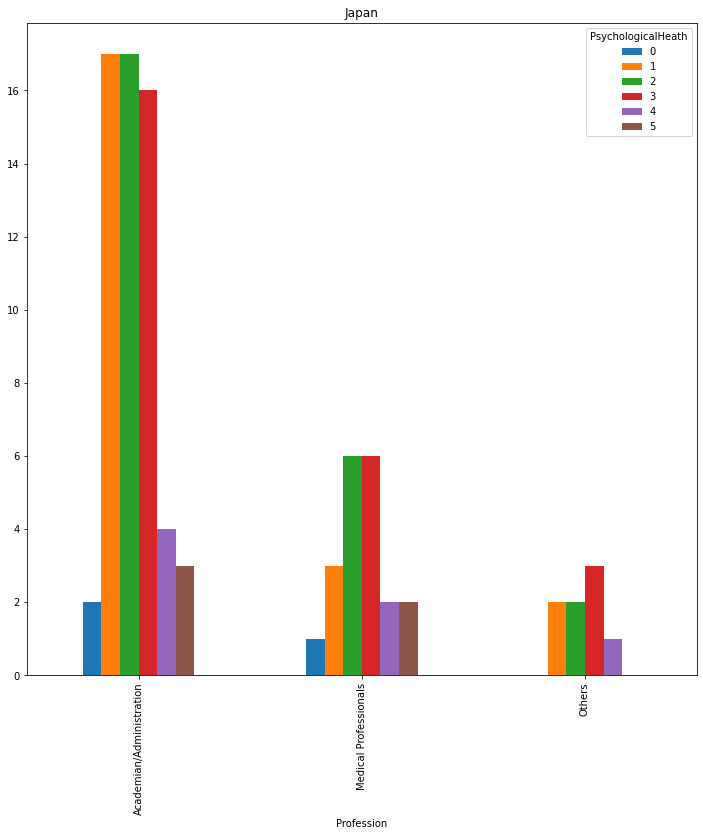

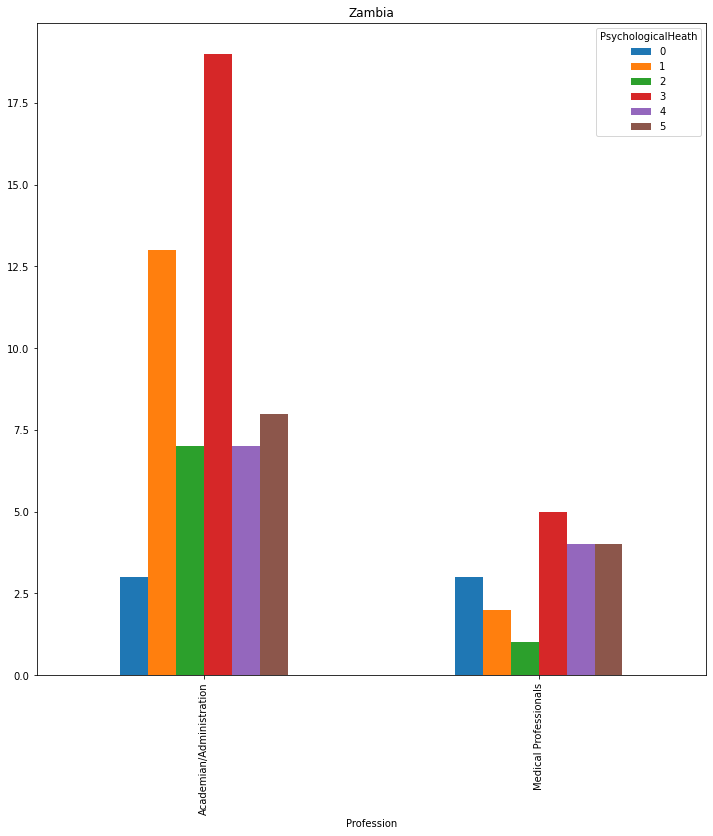

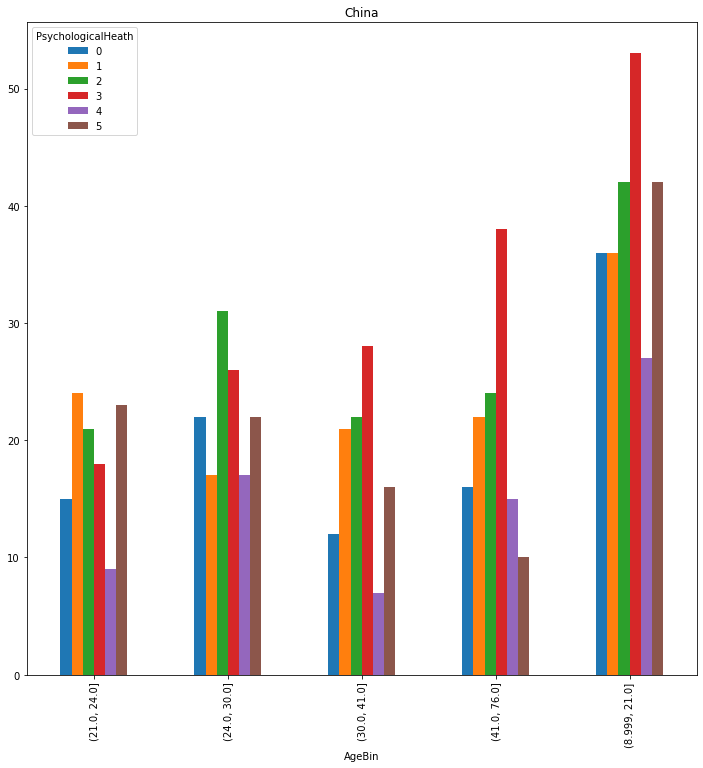

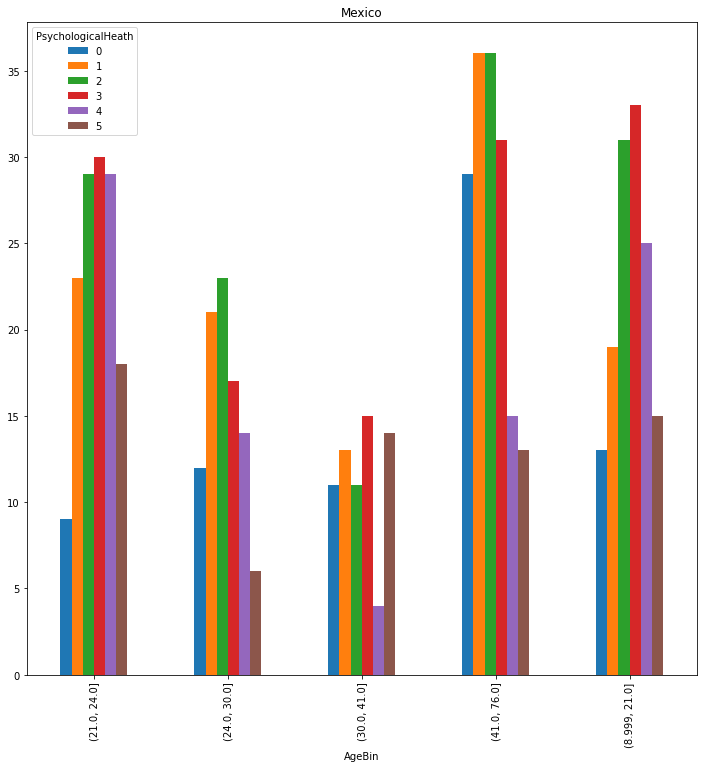

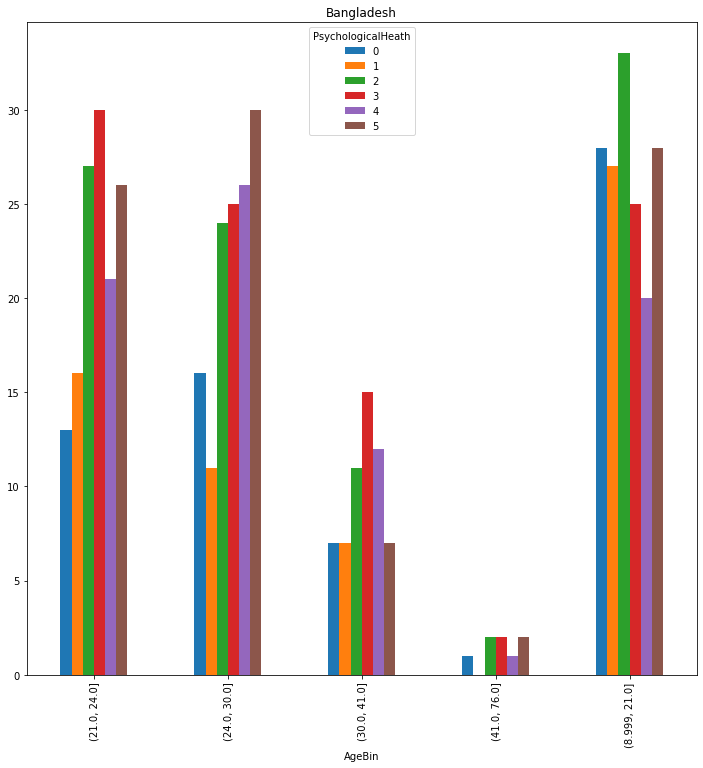

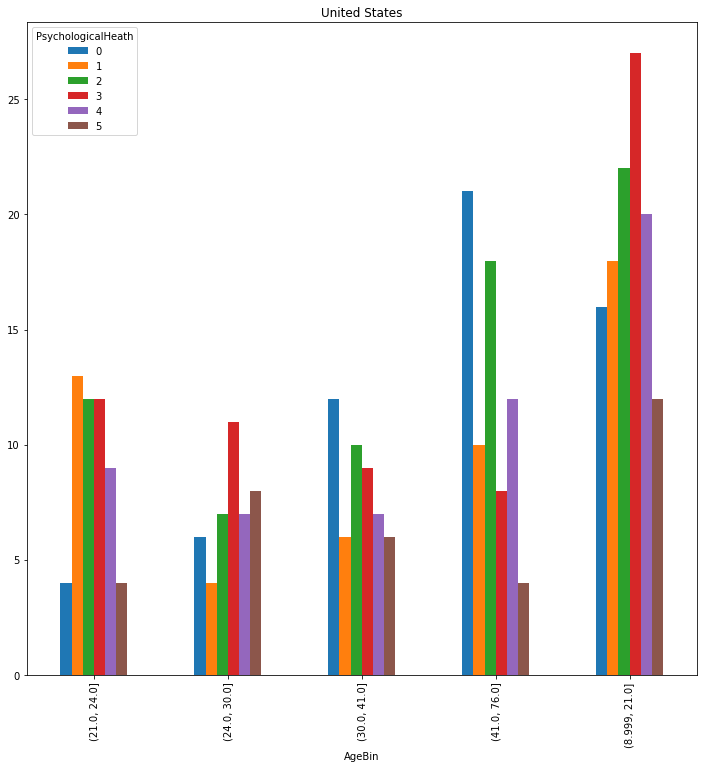

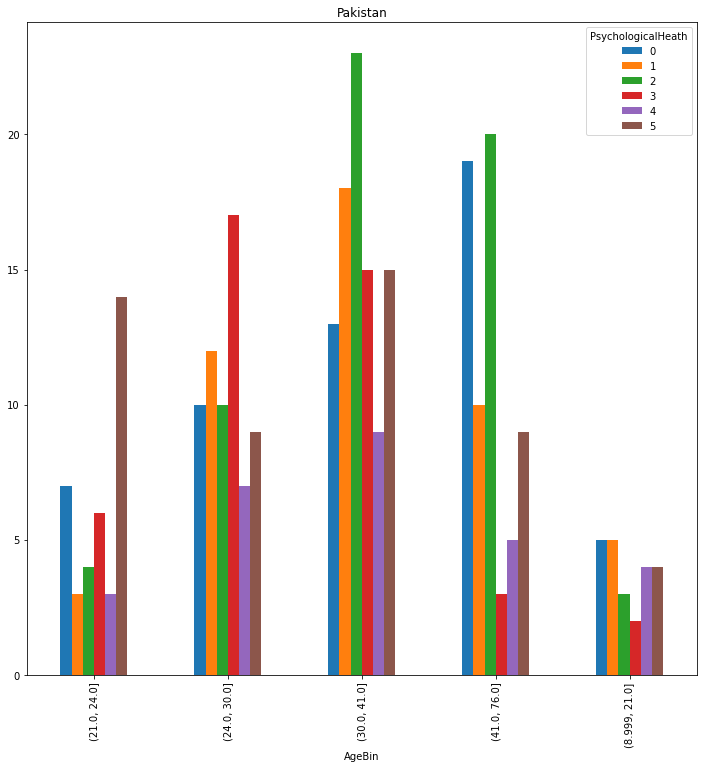

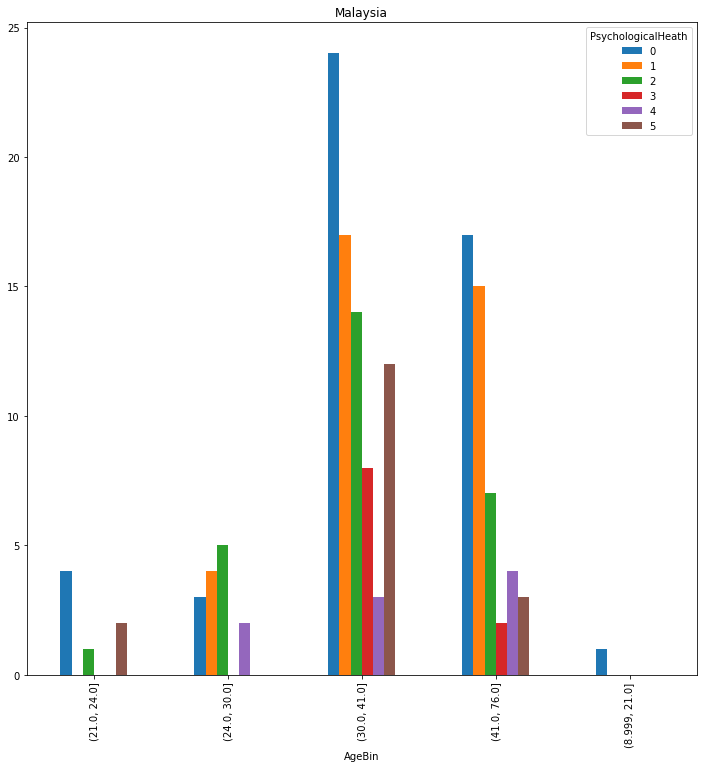

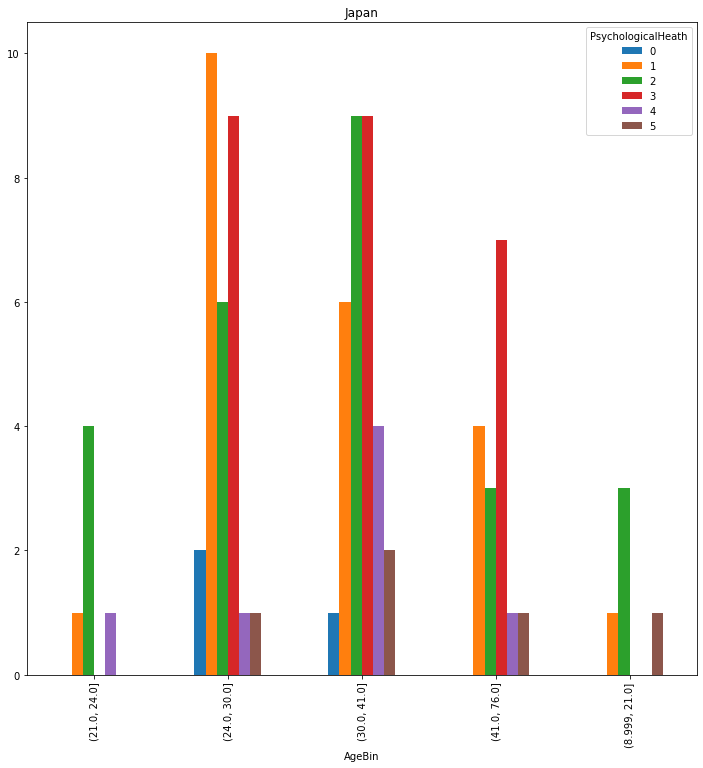

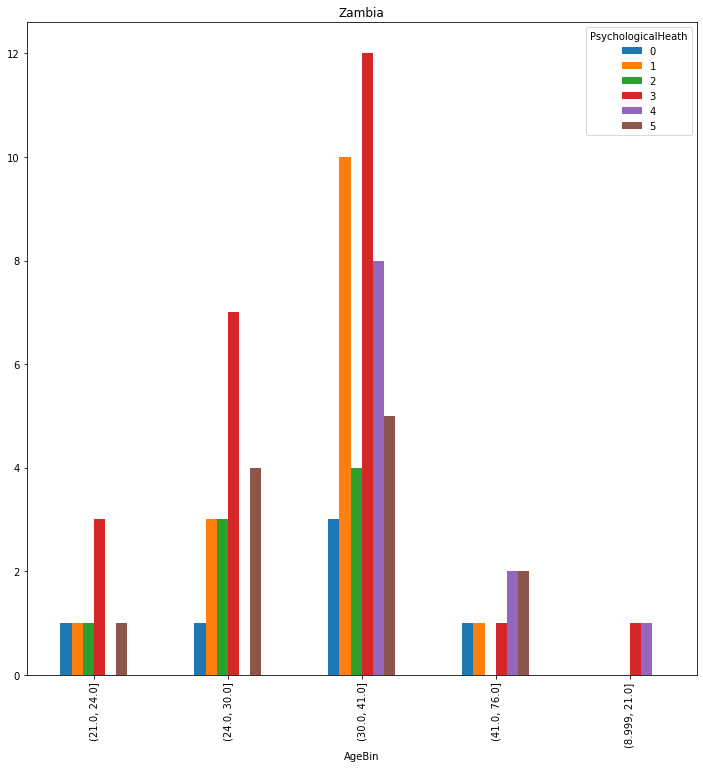

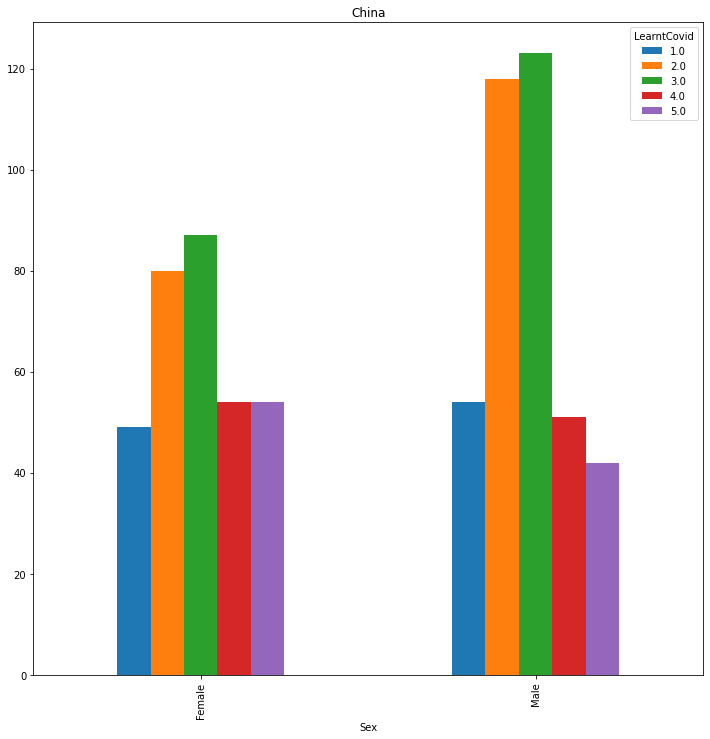

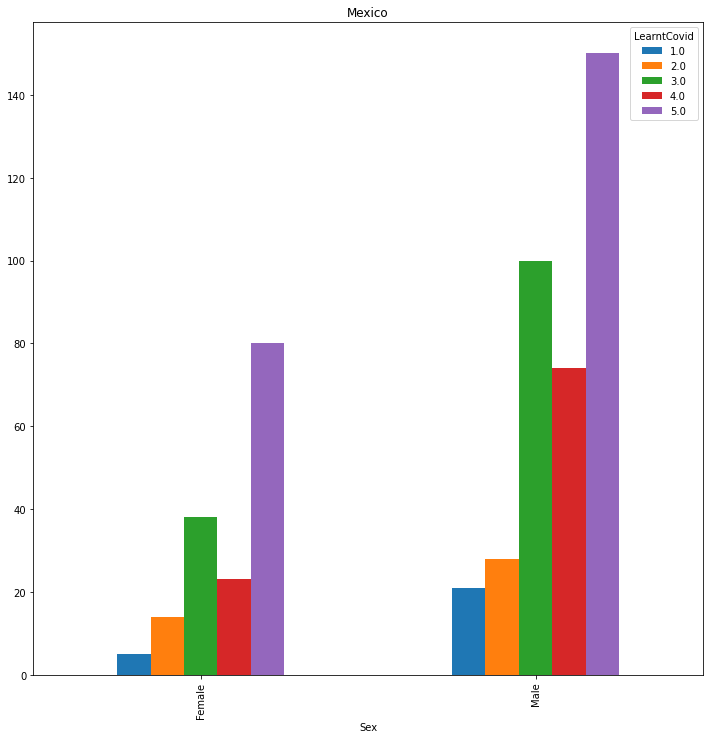

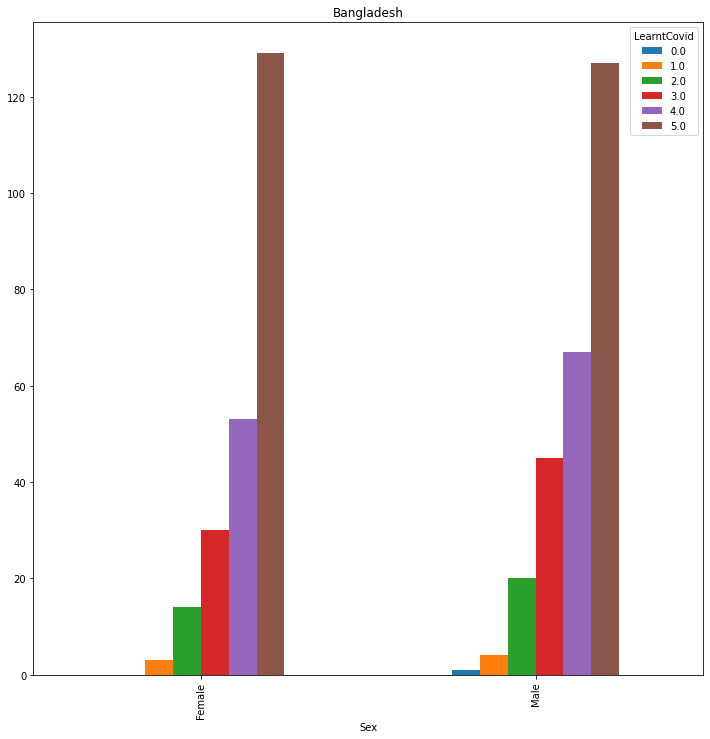

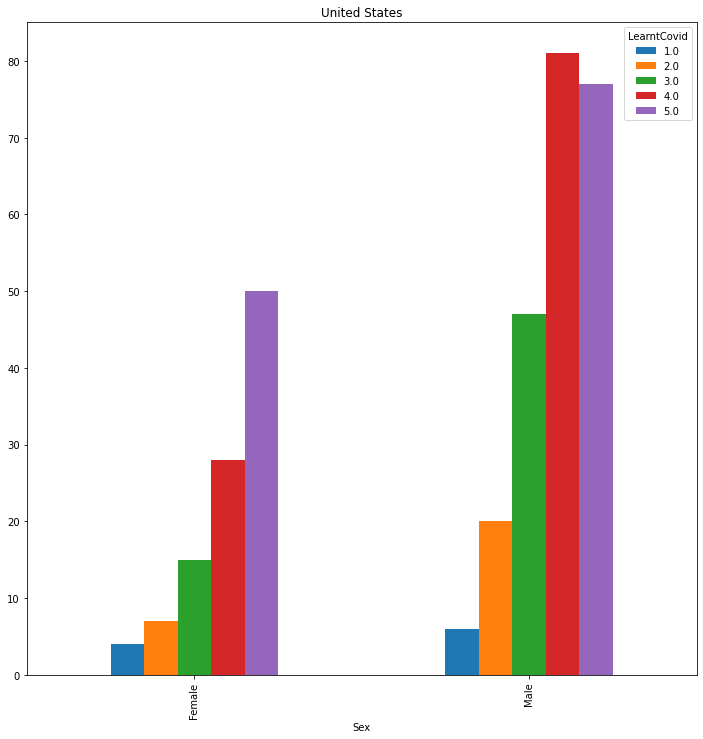

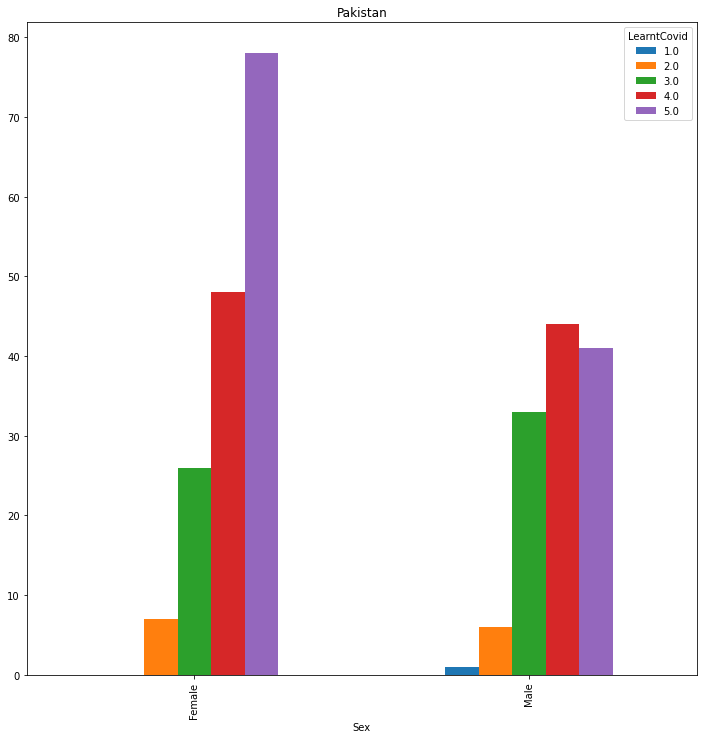

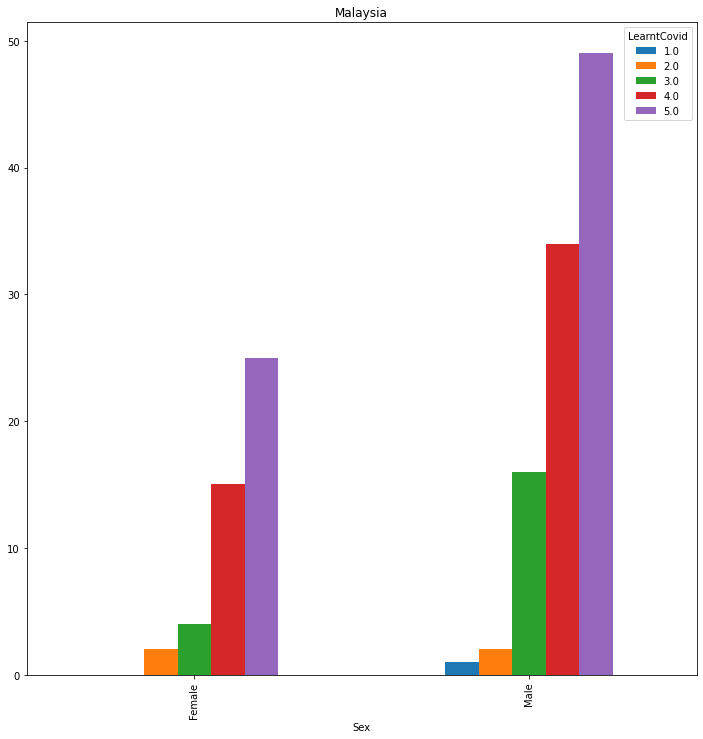

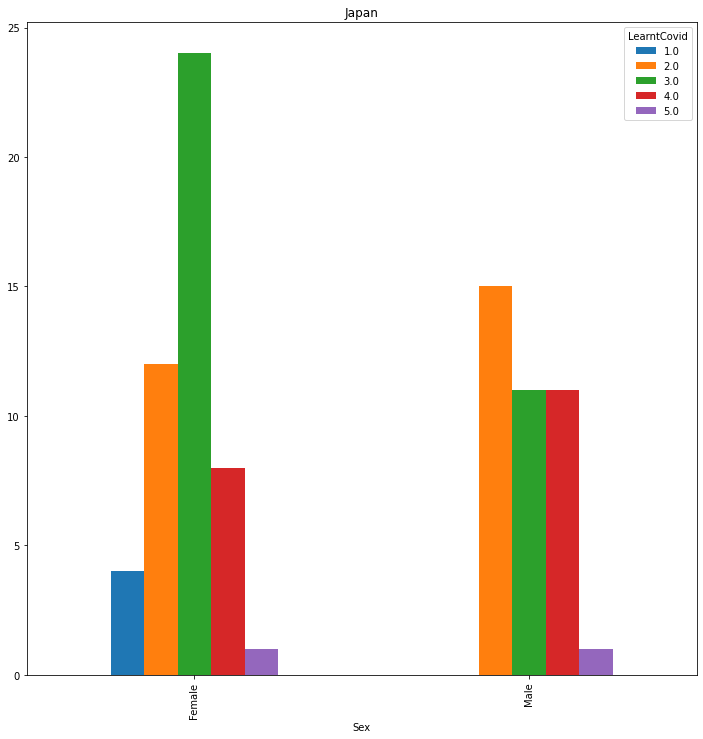

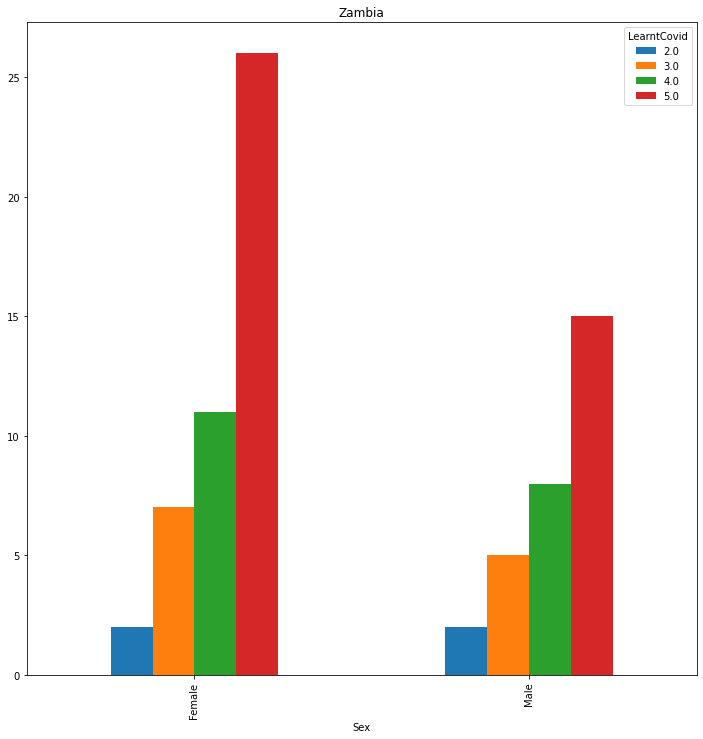

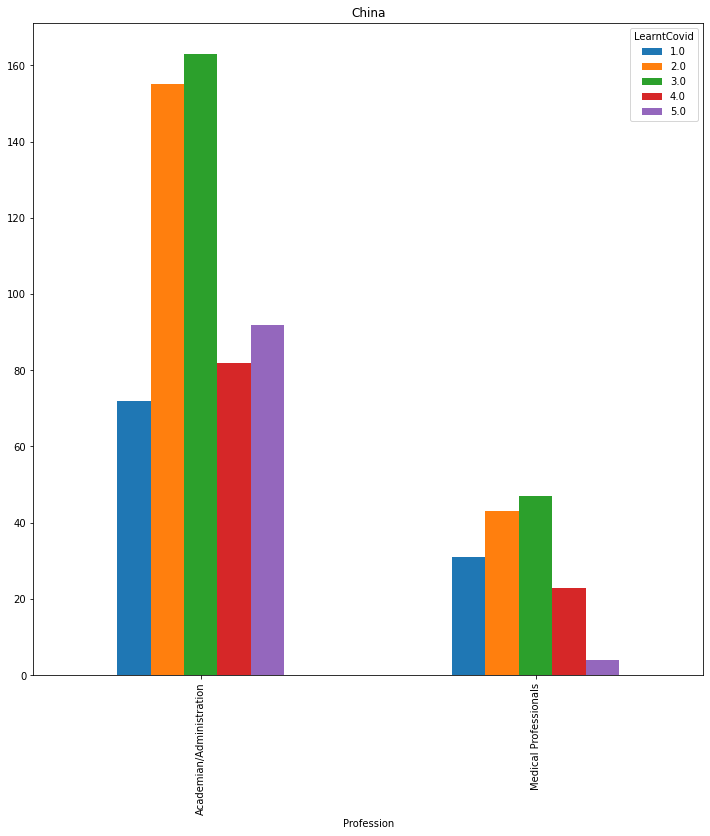

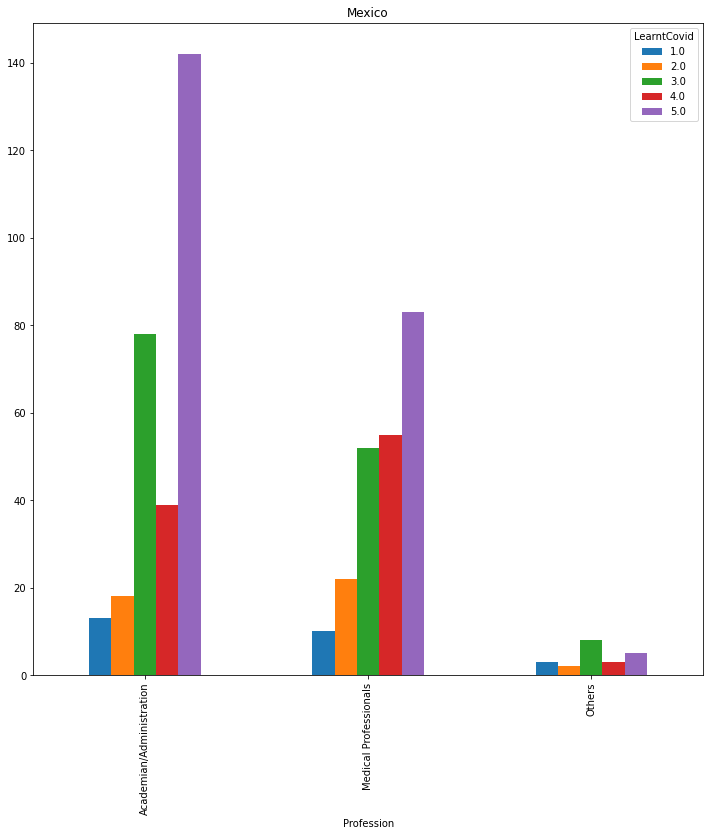

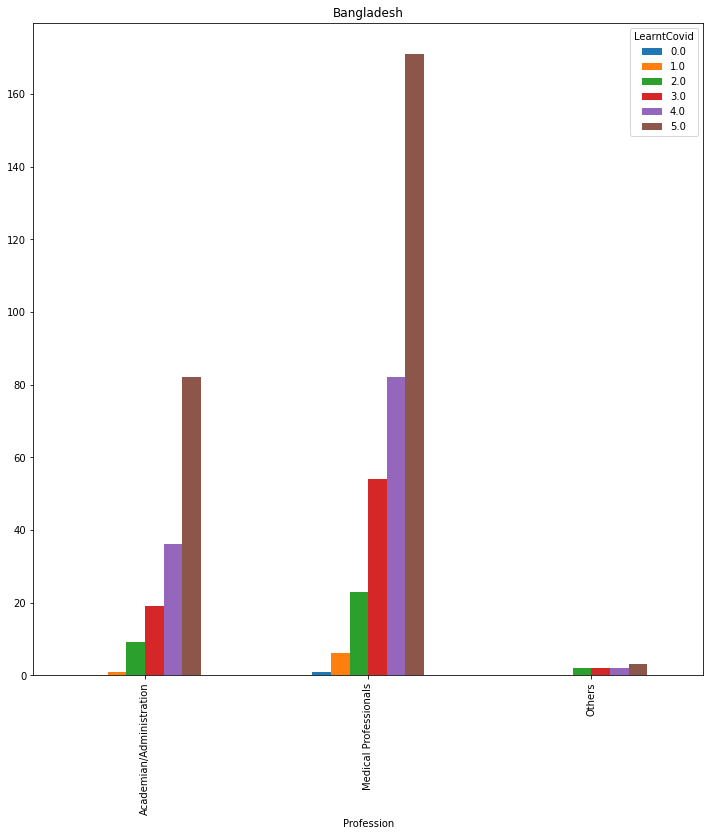

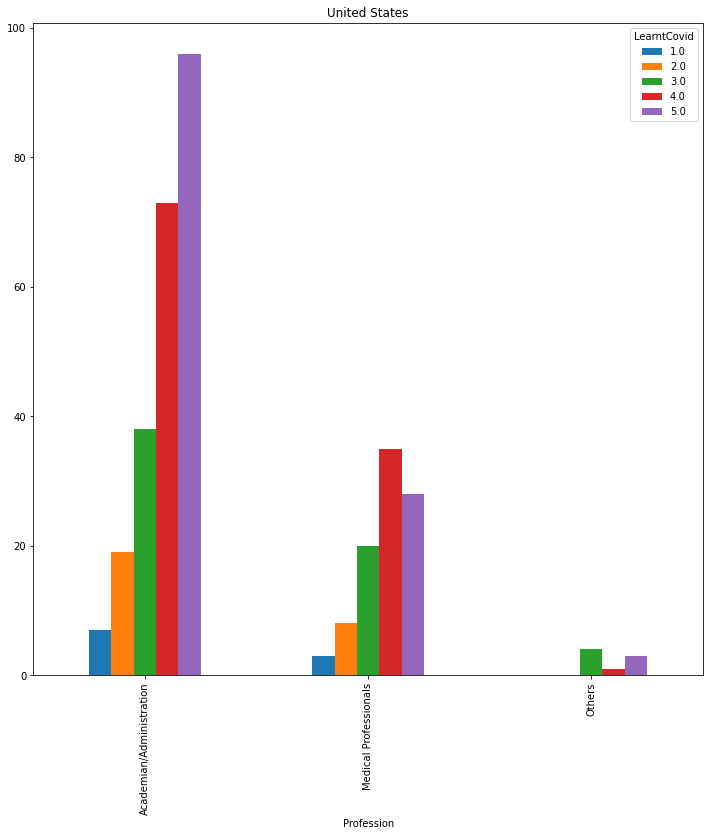

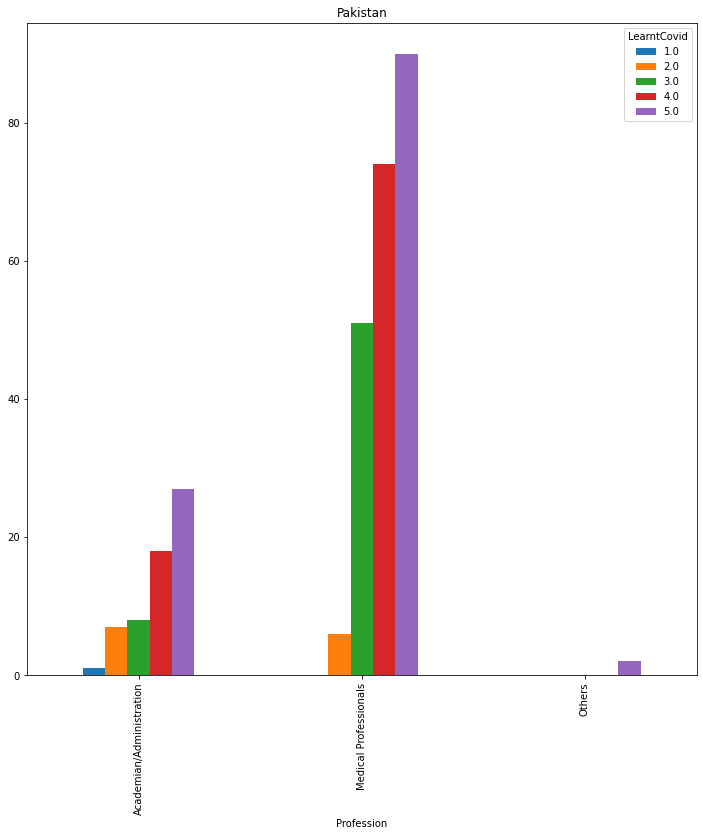

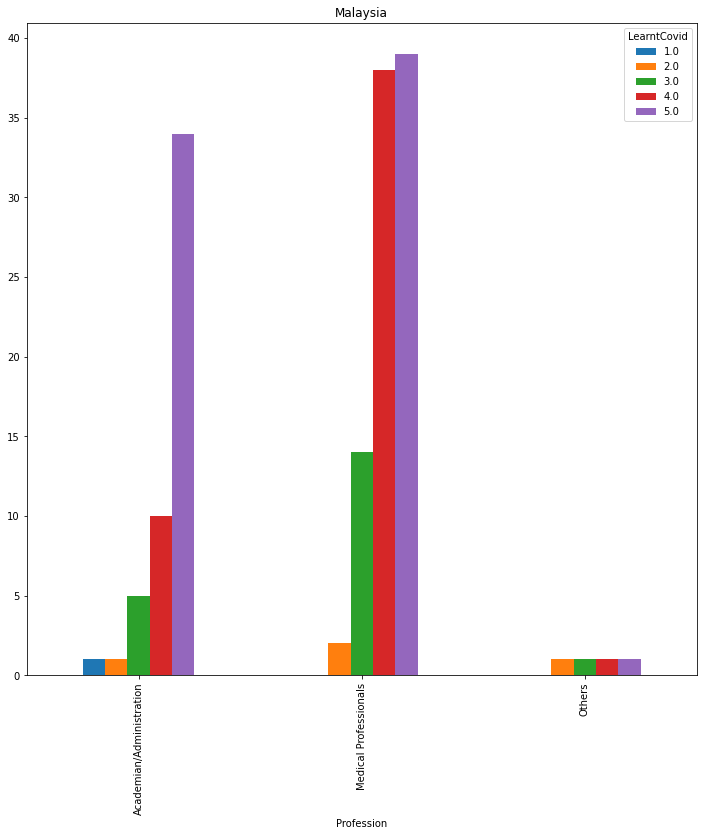

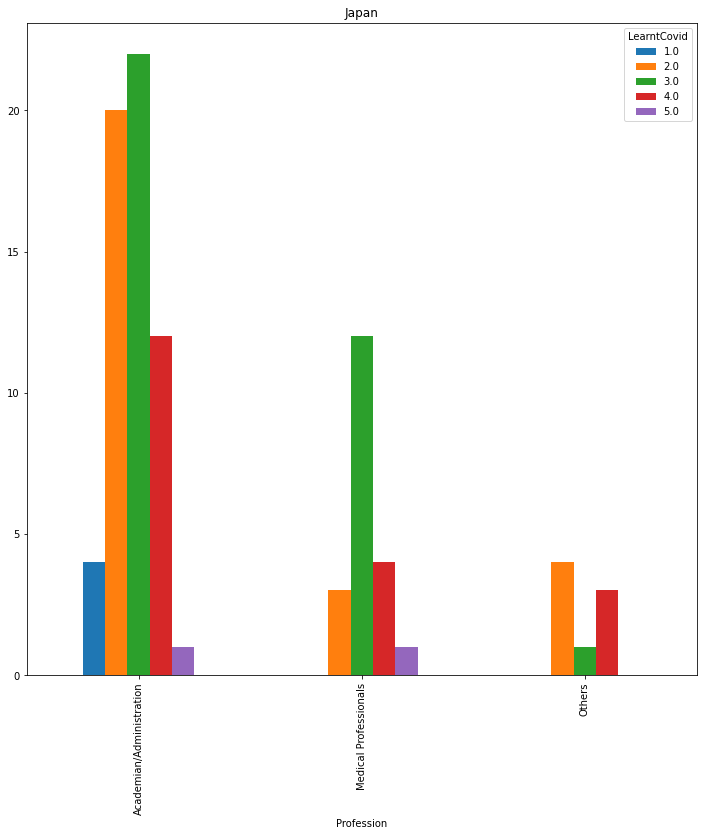

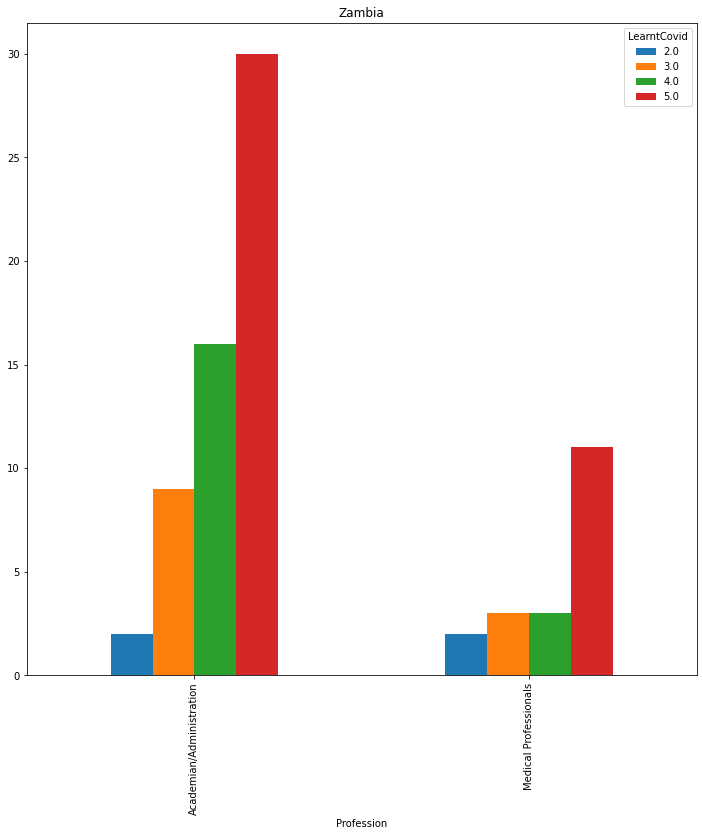

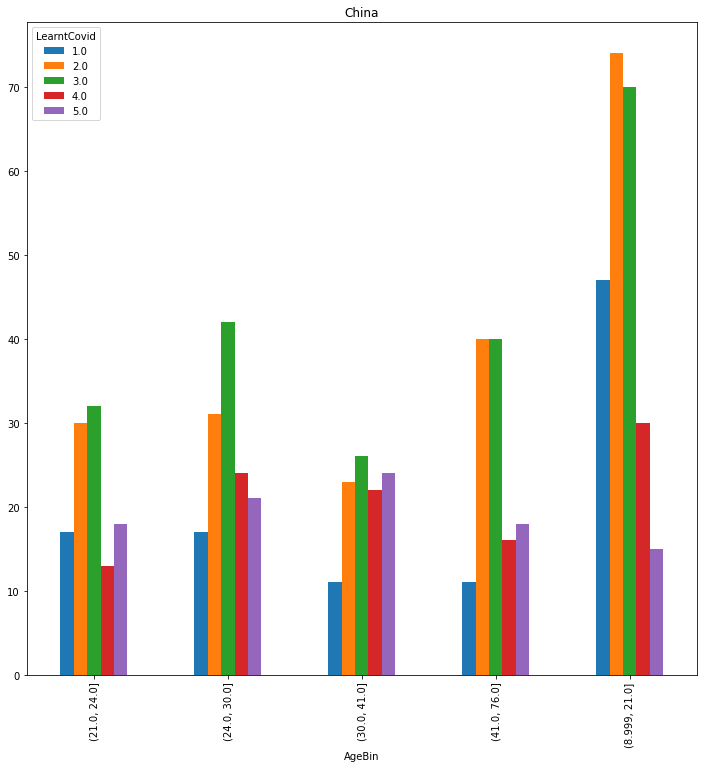

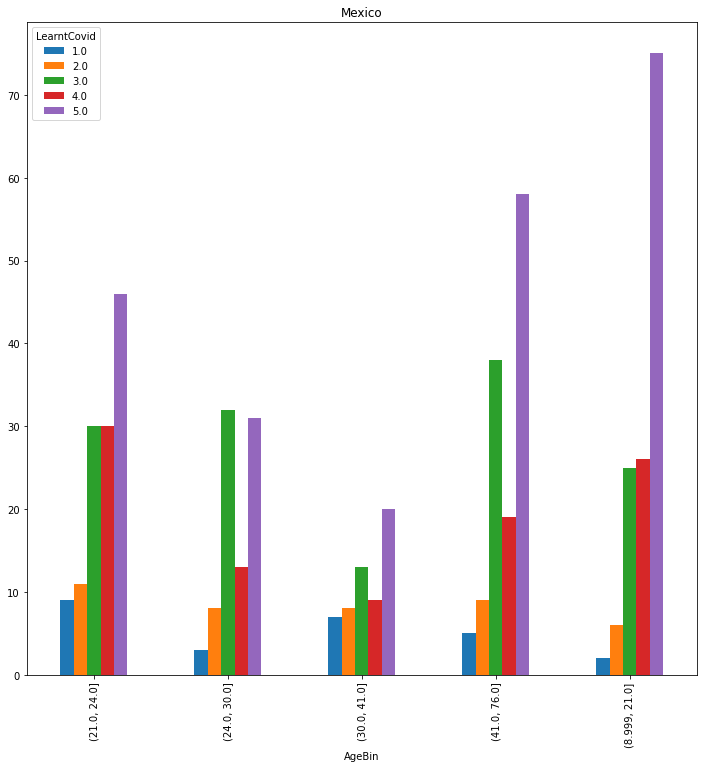

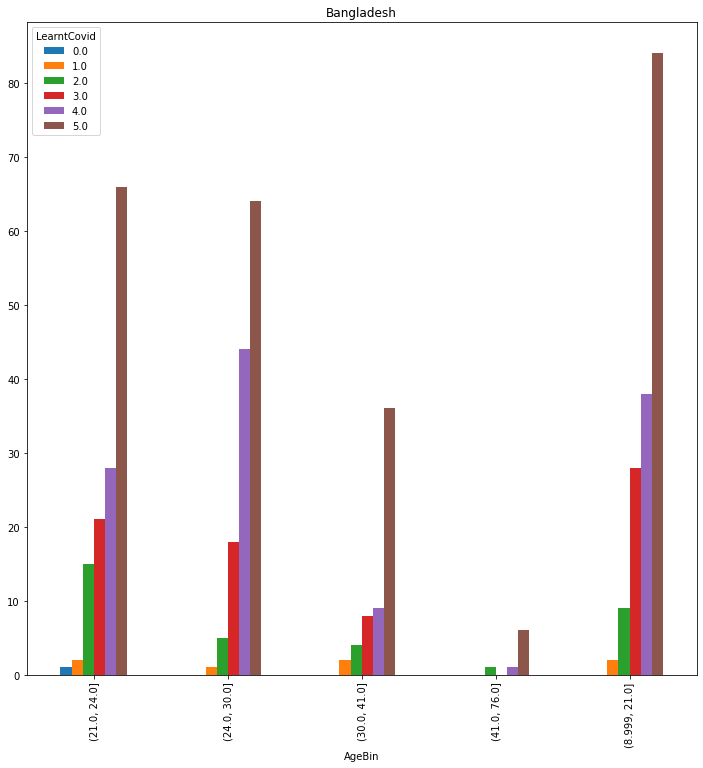

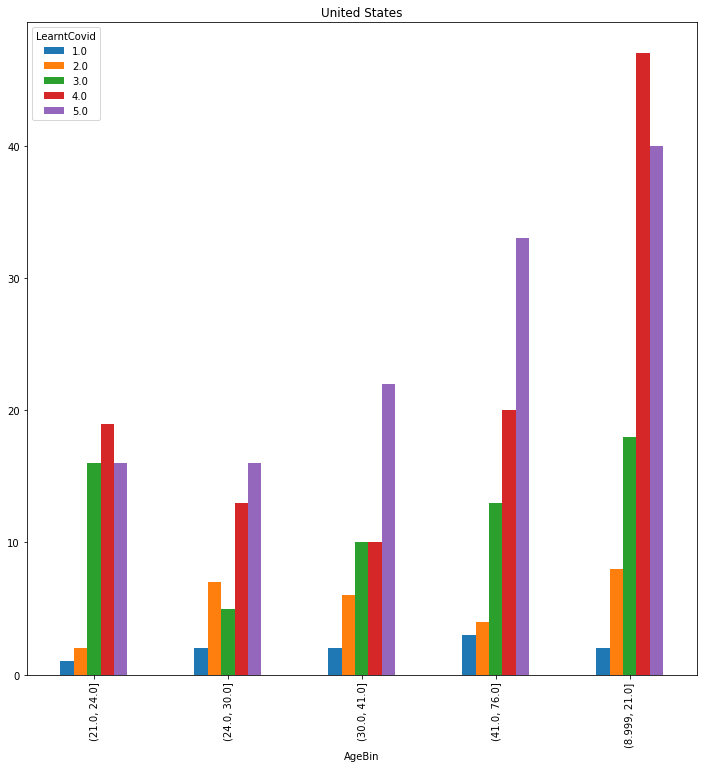

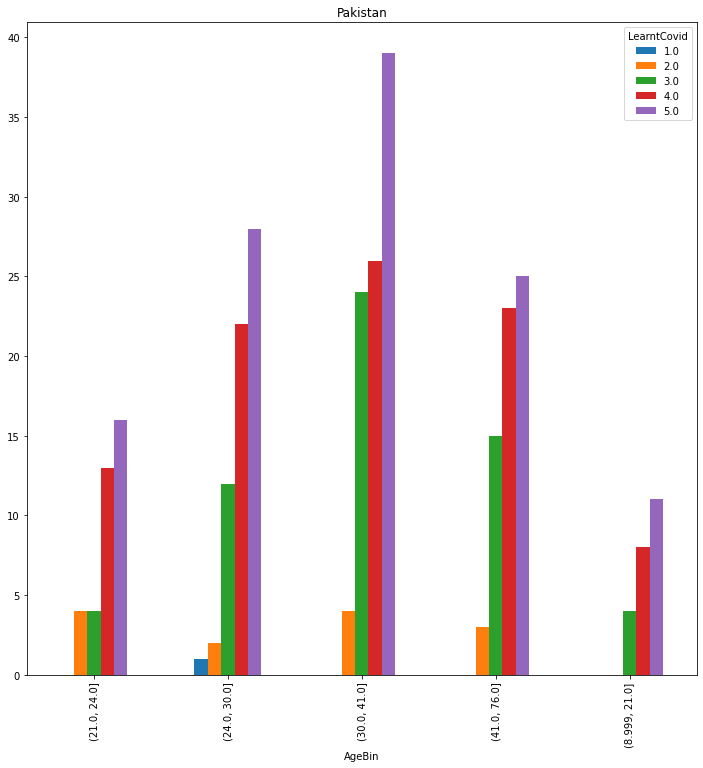

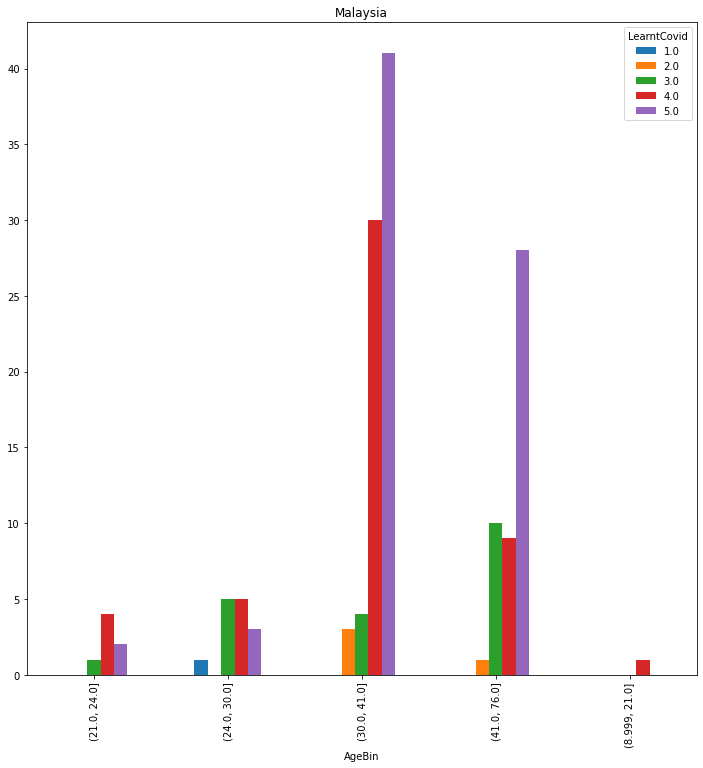

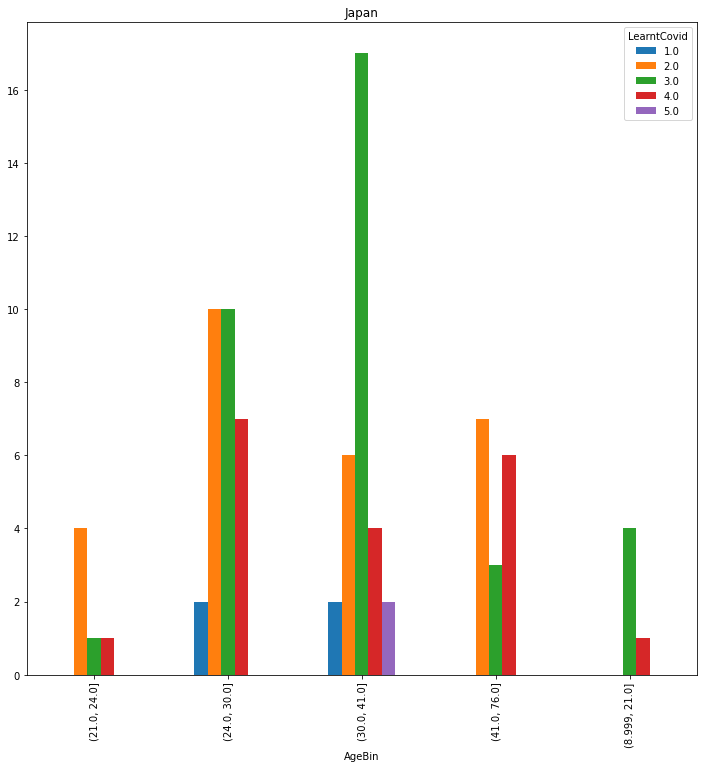

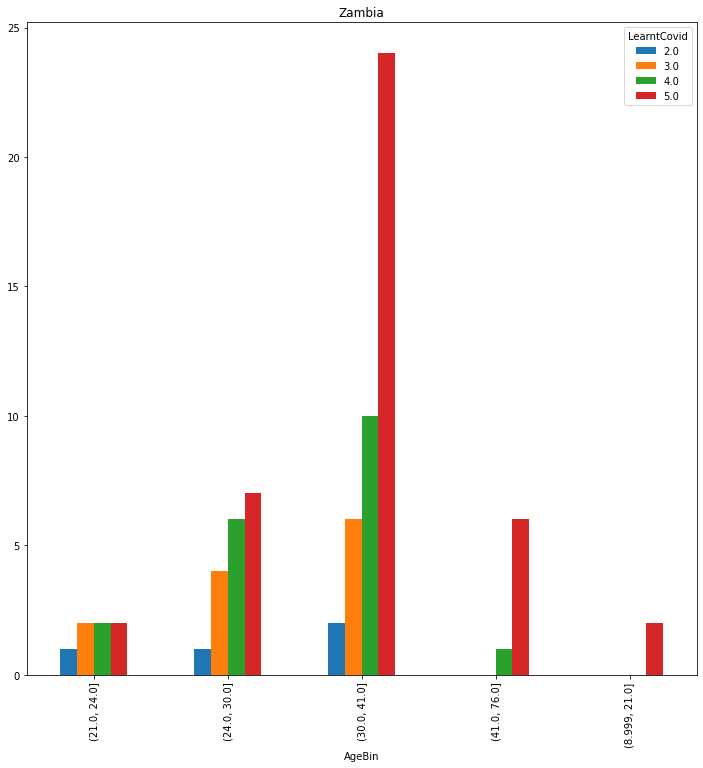

In [169]:
for c in criterion:
    for f in field:
        results = []
        for i, country in enumerate(countries):
            df_test = df[df['Country'] == country]
            if not (country == 'China' and c =='Access_Of_Information'):
                results.append(chi_squared_test(df_test,country,f,c))
        output = pd.DataFrame(results, columns = ['Country','Value', 'Critical'])
        output['Significant'] = output['Value'] > output['Critical']
        df_styled = output.style.background_gradient()
        dfi.export(df_styled,f"Graph/{c}/{f}/table.png")